In [104]:
#install.packages("ggupset")
#install.packages("ggcorrplot")
#if (!require(devtools)) install.packages("devtools")
#devtools::install_github("yanlinlin82/ggvenn")
#install.packages("GGally")
#install.packages("openxlsx")
#if (!requireNamespace("BiocManager", quietly = TRUE))
#  install.packages("BiocManager")
#BiocManager::install("GenomicDistributions")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'GenomicDistributions'”
Old packages: 'ape', 'BiocFileCache', 'BiocManager', 'biomaRt', 'blob', 'brew',
  'broom', 'clipr', 'commonmark', 'desc', 'doParallel', 'foreach', 'formatR',
  'gdata', 'GenomeInfoDb', 'GenomicFeatures', 'gert', 'gplots', 'httpuv',
  'httr', 'IRdisplay', 'IRkernel', 'iterators', 'kernlab', 'ks', 'lmtest',
  'MASS', 'Matrix', 'matrixStats', 'mclust', 'mgcv', 'nlme', 'openssl',
  'pbdZMQ', 'pkgbuild', 'plyr', 'pracma', 'processx', 'ps', 'RcppEigen',
  'RCurl', 'regioneR', 'repr', 'rprojroot', 'RSQLite', 'S4Vectors', 'sp',
  'speedglm', 'testthat', 'tidyr', 'uuid', 'waldo', 'xfun', 'XML', 'zoo'



In [55]:
library(dplyr)
library(stringr)
library(ggplot2)
library(ggupset)
library(UpSetR)
library(data.table)
library(ggcorrplot)
library(ggvenn)
library(GGally)
library(openxlsx)
library(GenomicDistributions)
library(tidyr)
library(fuzzyjoin)
library(rtracklayer)

### Read-in of data

#### Germinal annotated sets - short output TE typed

In [56]:
#load data
Mu1_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_1", .before = GeneID)
Mu2_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_2", .before = GeneID)
#we skip library 3 - Co125 background!
Mu3_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_3/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_3", .before = GeneID)
Mu4_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_4/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_4", .before = GeneID)
Mu5_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_5/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_5", .before = GeneID)
Mu6_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_6/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_6", .before = GeneID)
Mu7_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_7/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_7", .before = GeneID)
Mu8_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_8/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_8", .before = GeneID)
#F7
Mu_F7_1_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-1//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_1", .before = GeneID)

Mu_F7_2_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-2//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_2", .before = GeneID)

Mu_F7_3_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-3//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_3", .before = GeneID)

Mu_F7_4_germinal_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-4//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions_annotated.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_4", .before = GeneID)

In [57]:
#merge data
all_Mu_merged <- bind_rows(
  Mu1_germinal_annotated,
  Mu2_germinal_annotated,
  Mu3_germinal_annotated,
  Mu4_germinal_annotated,
  Mu5_germinal_annotated,
  Mu6_germinal_annotated,
  Mu7_germinal_annotated,
  Mu8_germinal_annotated,
  Mu_F7_1_germinal_annotated,
  Mu_F7_2_germinal_annotated,
  Mu_F7_3_germinal_annotated,
  Mu_F7_4_germinal_annotated)

B73_Mu_merged <- all_Mu_merged %>%
  filter(!str_detect(lib, 'F7'))

F7_Mu_merged <- all_Mu_merged %>%
  filter(str_detect(lib, 'F7'))

#### Germinal UN-annotated sets

In [3]:
#load data UNannotated
Mu1_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_1")
Mu2_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_2")
#we skip library 3 - Co125 background!
Mu3_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_3/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_3")
Mu4_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_4/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_4")
Mu5_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_5/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_5")
Mu6_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_6/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_6")
Mu7_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_7/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_7")
Mu8_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_8/MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_8")
#F7
Mu_F7_1_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-1//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_1")

Mu_F7_2_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-2//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_2")

Mu_F7_3_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-3//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_3")

Mu_F7_4_germinal_not_annotated <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-4//MuWU/results/insertions_table_final_te_typed/complete_germinal_identified_insertions.csv",
                                     header=TRUE,
                                     sep=",") %>% mutate(lib = "Museq_F7_4")

In [4]:
#merge data
all_Mu_not_annotated_merged <- bind_rows(
  Mu1_germinal_not_annotated,
  Mu2_germinal_not_annotated,
  Mu3_germinal_not_annotated,
  Mu4_germinal_not_annotated,
  Mu5_germinal_not_annotated,
  Mu6_germinal_not_annotated,
  Mu7_germinal_not_annotated,
  Mu8_germinal_not_annotated,
  Mu_F7_1_germinal_not_annotated,
  Mu_F7_2_germinal_not_annotated,
  Mu_F7_3_germinal_not_annotated,
  Mu_F7_4_germinal_not_annotated)

B73_Mu_not_annotated_merged <- all_Mu_not_annotated_merged %>%
  filter(!str_detect(lib, 'F7'))

F7_Mu_not_annotated_merged <- all_Mu_not_annotated_merged %>%
  filter(str_detect(lib, 'F7'))

### Overlap of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



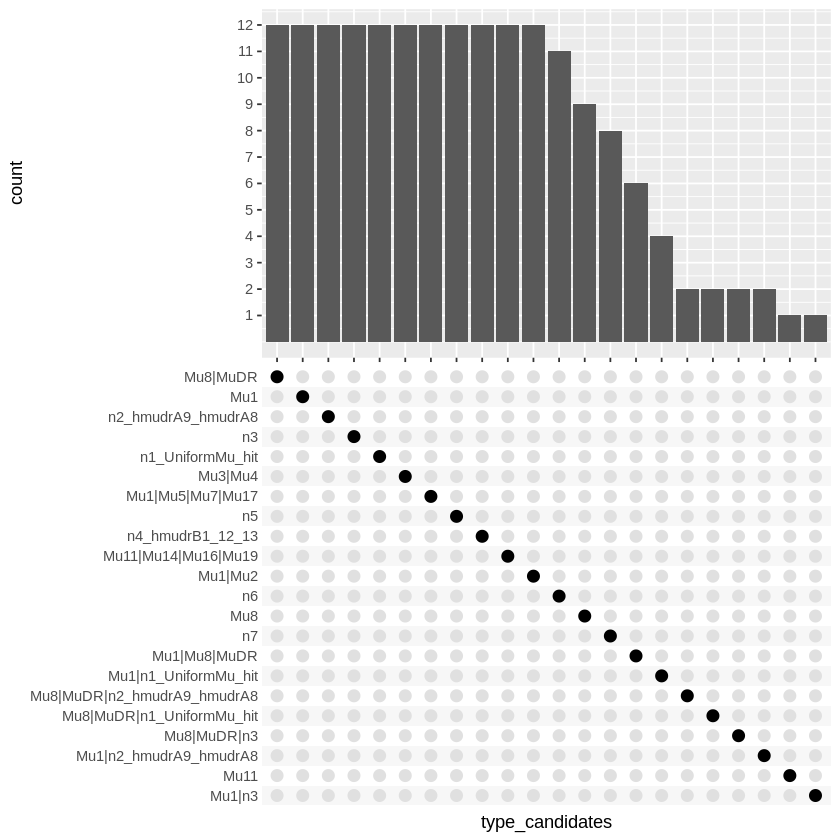

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



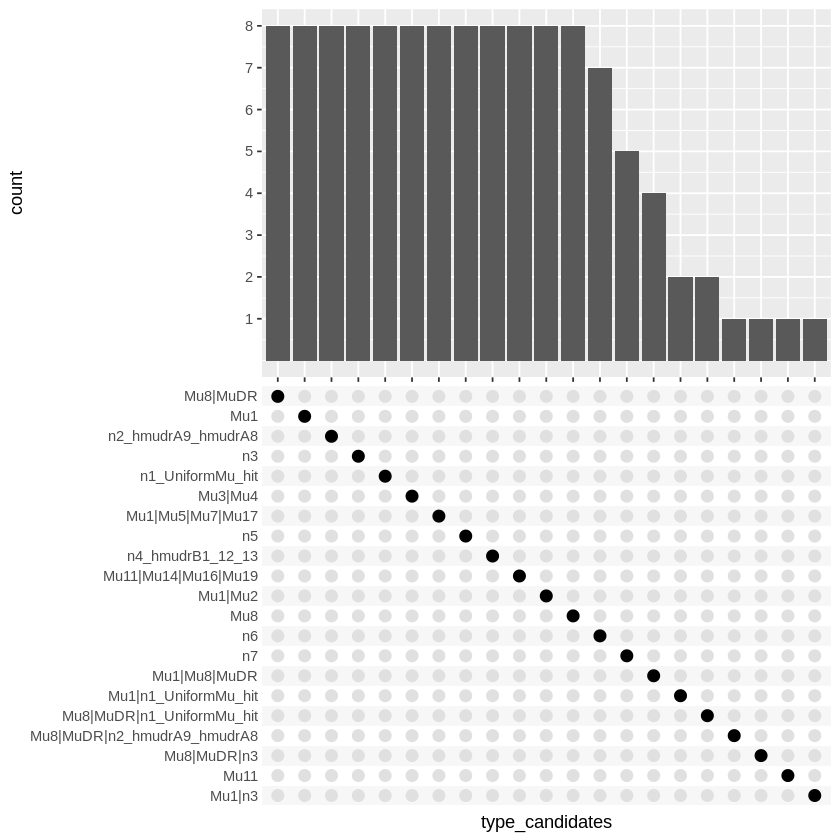

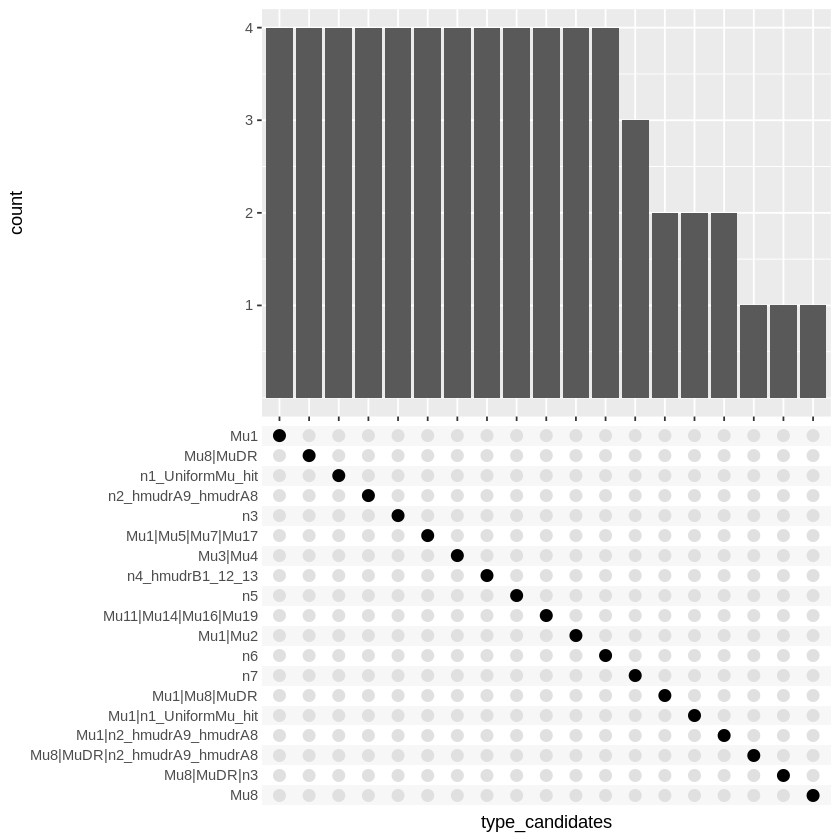

In [5]:
pd <- all_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  dplyr::slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


all_pd <- as.data.frame(pd)
#head(pd)

ggplot(pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 12), breaks = c(1,2,3,4,5,6,7,8,9,10,11,12)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")



####just B73
pd <- B73_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  dplyr::slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


B73_pd <- as.data.frame(pd)

ggplot(B73_pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 8), breaks = c(1,2,3,4,5,6,7,8)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")



####just F7
pd <- F7_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  dplyr::slice(1:15) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) %>%
  mutate(lib = as.list(lib))


F7_pd <- as.data.frame(pd)

ggplot(F7_pd, aes(x=type_candidates)) +
    geom_bar() +
    scale_y_continuous(limit = c(0, 4), breaks = c(1,2,3,4)) +
    scale_x_upset(n_intersections = Inf, order_by = "degree")


#code ideas - classic UpSetR
#  select(-lib) %>%

#Mu1 <- a %>% filter(lib == "Mu1") %>% pull(type_candidates)
#Mu2 <- a %>% filter(lib == "Mu2") %>% pull(type_candidates)
#Mu4 <- a %>% filter(lib == "Mu4") %>% pull(type_candidates)
#Mu5 <- a %>% filter(lib == "Mu5") %>% pull(type_candidates)
#Mu6 <- a %>% filter(lib == "Mu6") %>% pull(type_candidates)
#Mu7 <- a %>% filter(lib == "Mu7") %>% pull(type_candidates)
#Mu8 <- a %>% filter(lib == "Mu8") %>% pull(type_candidates)

#c <- list(Mu1 = Mu1, Mu2 = Mu2, Mu4 = Mu4, Mu5 = Mu5, Mu6 = Mu6, Mu7 = Mu7, Mu8 = Mu8)
#c
#upset(c, nsets = 20)

In [ ]:
#### need this for both library types next to each other

In [6]:
all_pd <- all_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(lib, desc(count)) %>%
  dplyr::slice(1:15) %>%
#  select(lib, type_candidates) %>%
#  dplyr::slice(1:15) %>%
  ungroup() %>%
  group_by(type_candidates) %>%
  summarize(n = n()) #%>%
#  arrange(desc(n))
#  group_by(lib, type_candidates) %>%
#  summarise(count = n()) %>%
#  arrange(lib, desc(count)) #%>%
#  dplyr::slice(1:15) #%>%
#  ungroup() %>%

head(all_pd, n=20)

#F7_pd %>%
#  group_by(type_candidates) %>%
#  summarize(n = n()) %>%
#  arrange(desc(n)) %>%
#  mutate(type_candidates = as.character(type_candidates)) %>%
#    ggplot(., aes(x=type_candidates, y=n)) +
#    geom_col() +
#    coord_flip()

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


type_candidates,n
<chr>,<int>
Mu1,12
Mu1|Mu2,12
Mu1|Mu5|Mu7|Mu17,12
Mu1|Mu8|MuDR,6
Mu1|n1_UniformMu_hit,4
Mu1|n2_hmudrA9_hmudrA8,2
Mu1|n3,1
Mu11,1
Mu11|Mu14|Mu16|Mu19,12


[[1]]
[1] "Mu1"

[[2]]
[1] "Mu8|MuDR"

[[3]]
[1] "n1_UniformMu_hit"

[[4]]
[1] "n2_hmudrA9_hmudrA8"

[[5]]
[1] "n3"

[[6]]
[1] "Mu1|Mu5|Mu7|Mu17"

[[1]]
[1] "Mu1"

[[2]]
[1] "Mu8|MuDR"

[[3]]
[1] "n2_hmudrA9_hmudrA8"

[[4]]
[1] "n1_UniformMu_hit"

[[5]]
[1] "n3"

[[6]]
[1] "Mu3|Mu4"

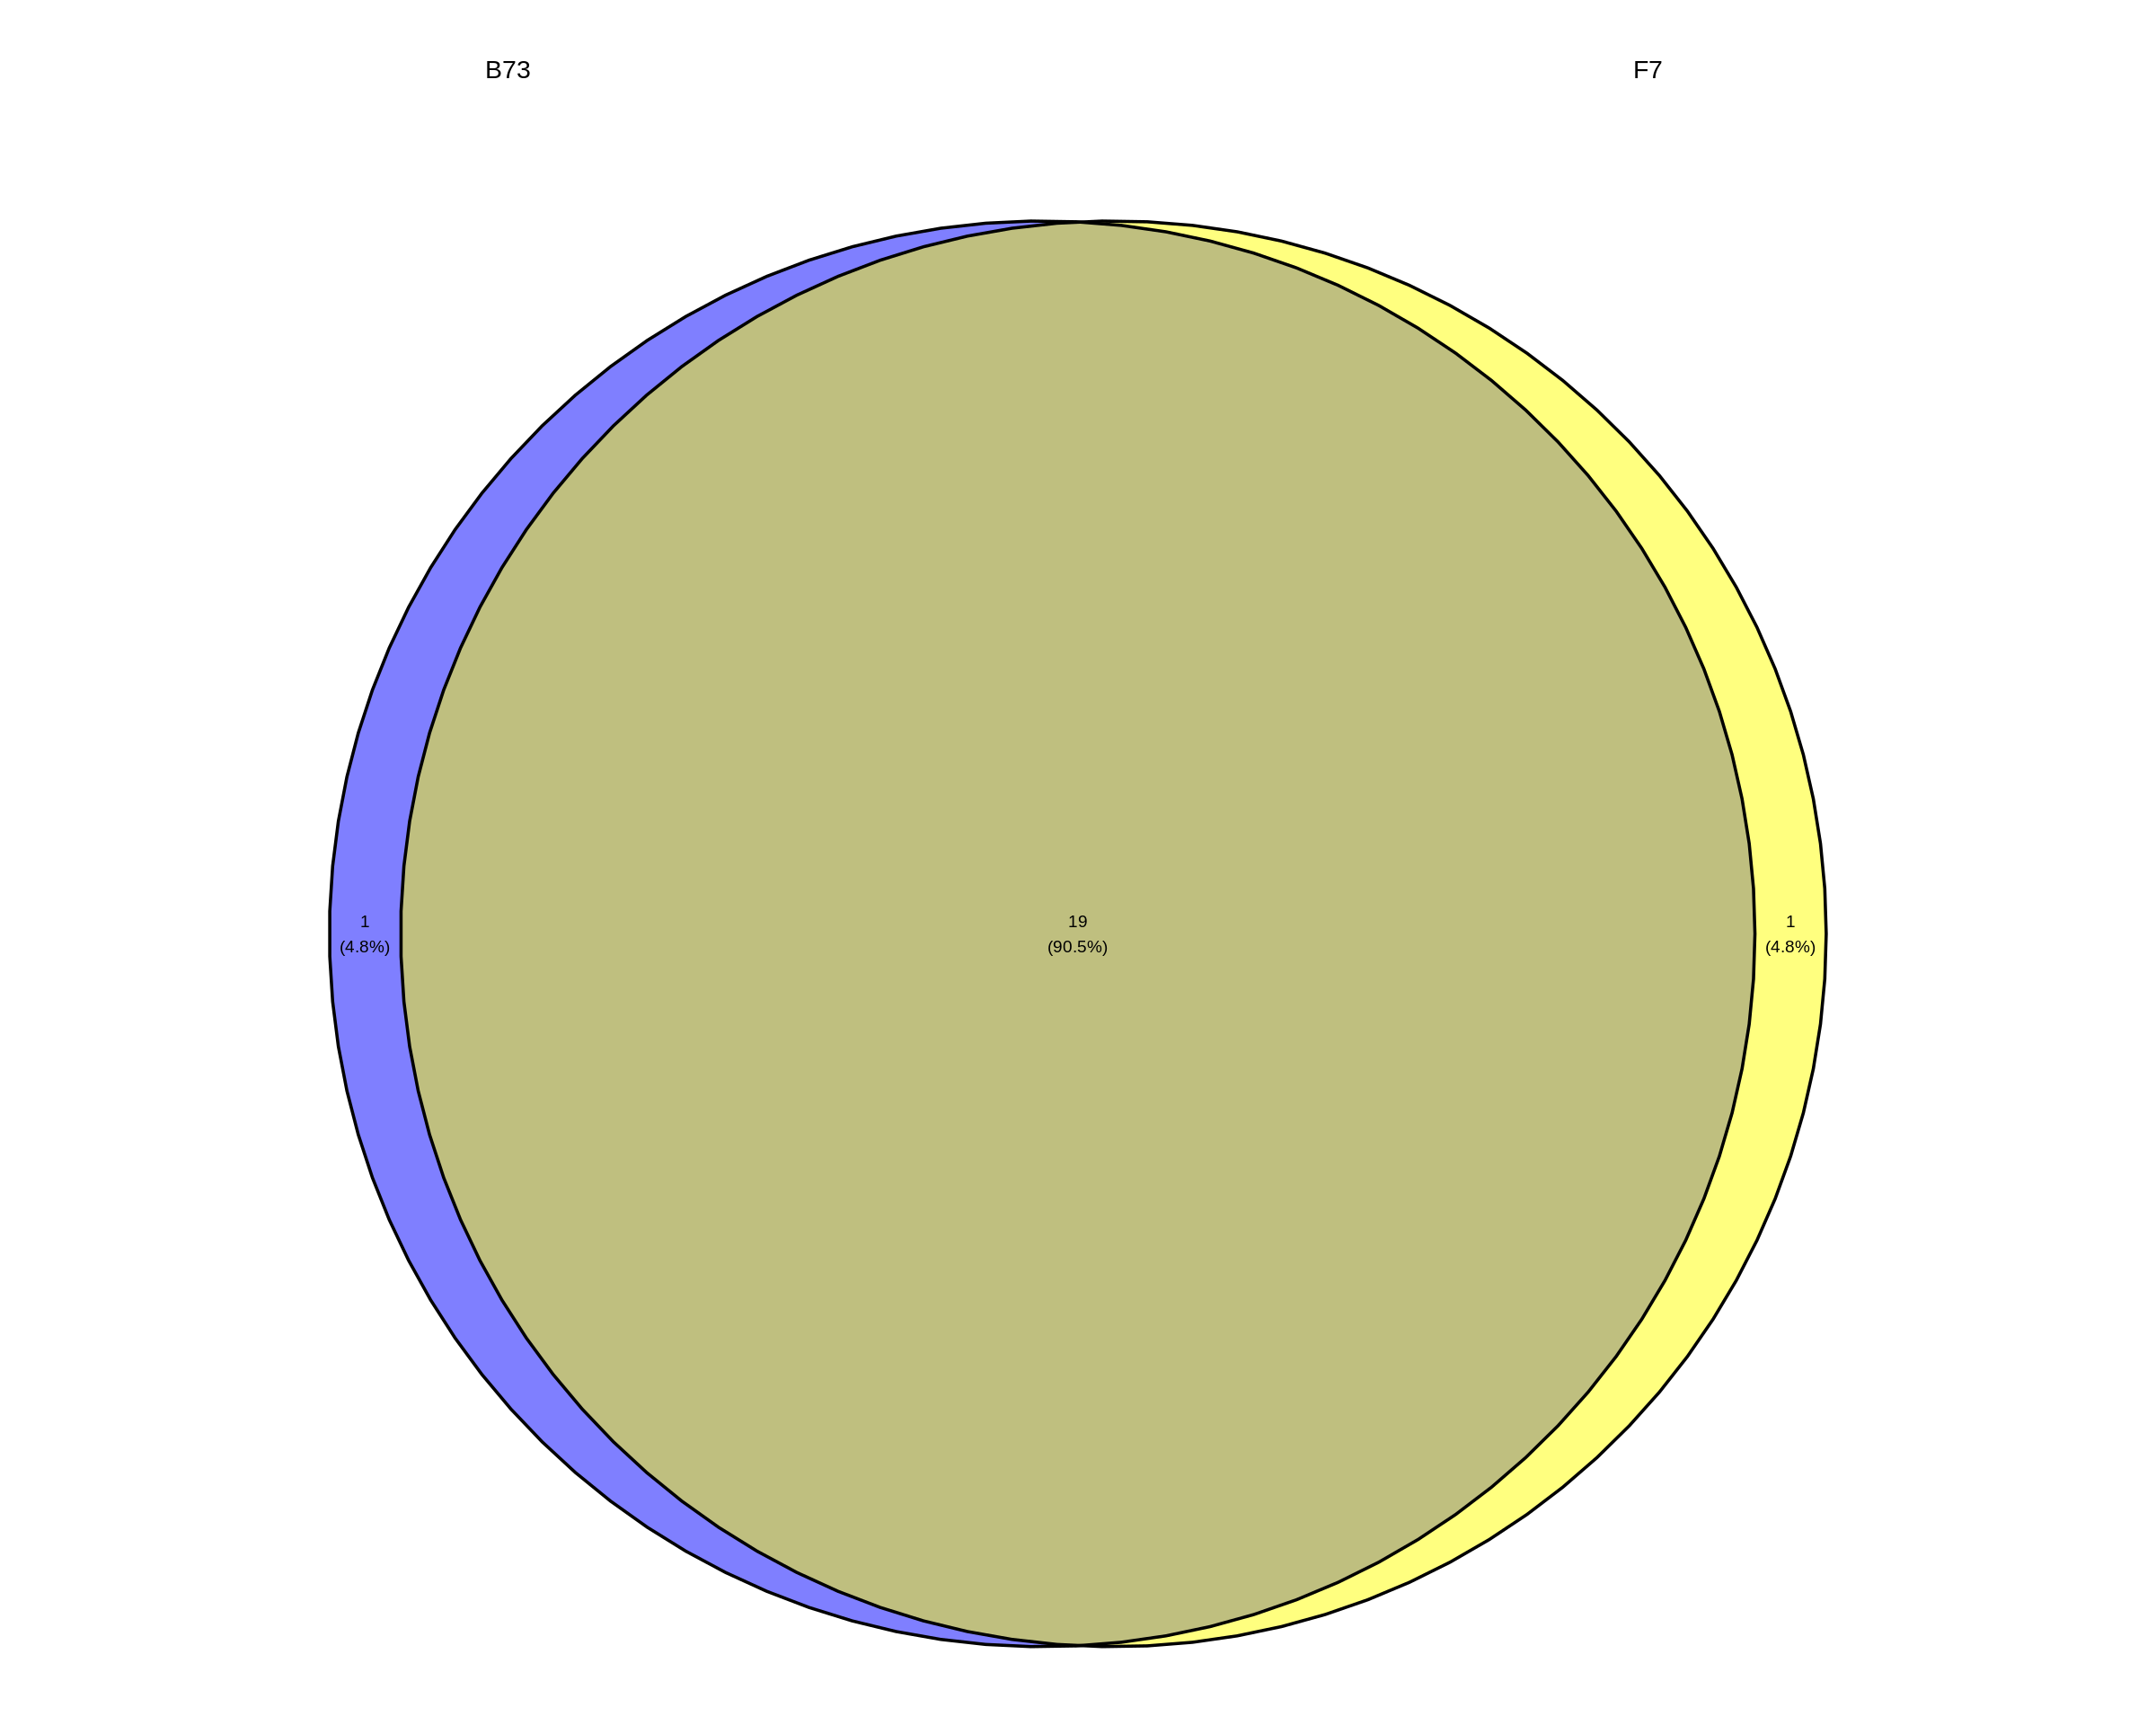

In [298]:
B73_pd <- B73_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  dplyr::slice(1:20) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) 

F7_pd <- F7_Mu_not_annotated_merged %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  dplyr::slice(1:20) %>%
  ungroup() %>%
  mutate(type_candidates = as.list(type_candidates)) 

head(B73_pd$type_candidates)
head(F7_pd$type_candidates)

ggvenn(list(B73=B73_pd$type_candidates, F7=F7_pd$type_candidates), auto_scale=TRUE)

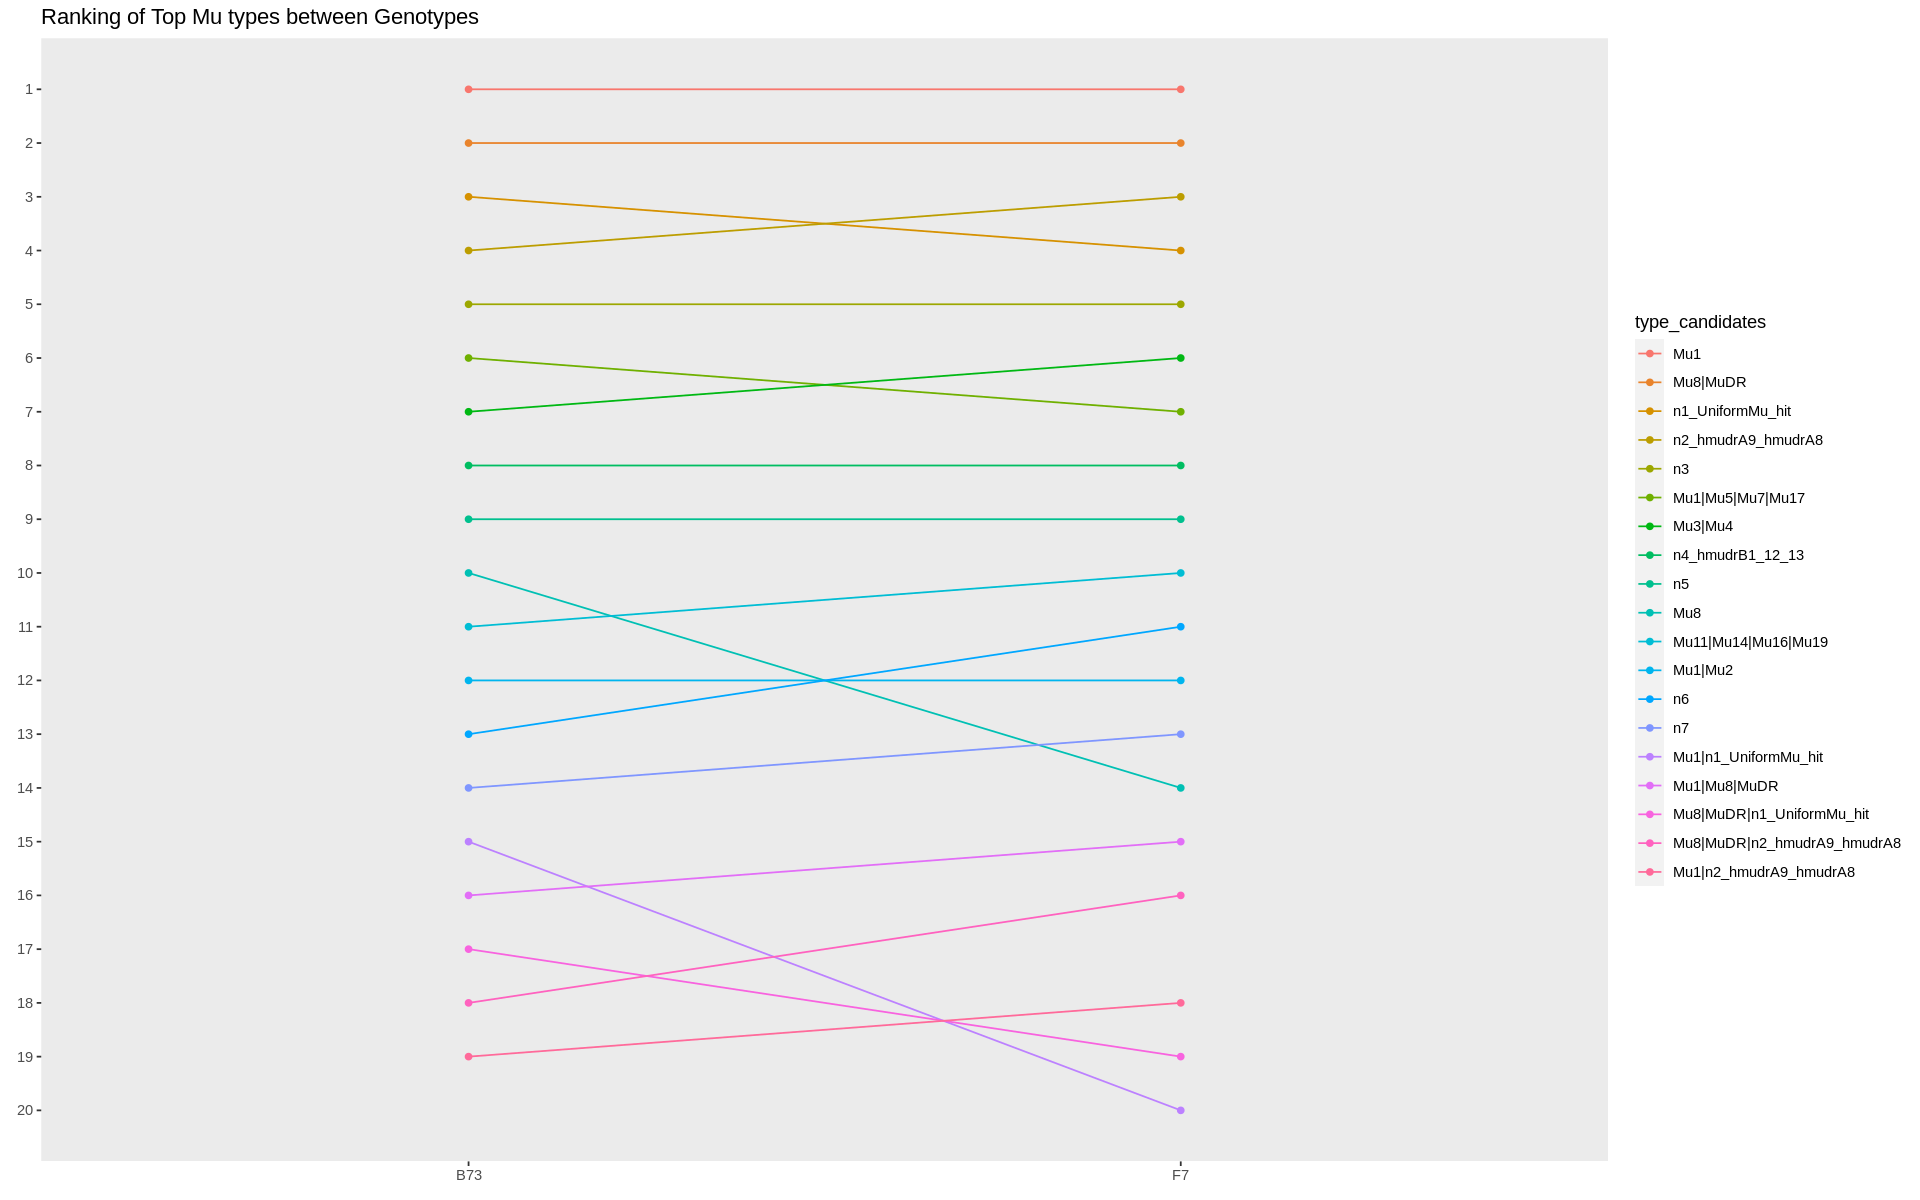

In [289]:
B73_pd <- B73_pd %>%
  mutate(rank = 1:n())

F7_pd <- F7_pd %>%
  mutate(rank = 1:n())

m <- left_join(B73_pd, F7_pd, by = "type_candidates") %>%
  select(-count.x, -count.y)

#transform to chr -> factor 
m$type_candidates <- as.character(m$type_candidates)
m$type_candidates <- as.factor(m$type_candidates)
#order factor so that legend is ordered based on B73
m$type_candidates <- factor(m$type_candidates, levels = B73_pd$type_candidates)
#rename groups
m <- m %>%
  dplyr::rename(B73 = rank.x, F7 = rank.y)


# Build plot
GGally::ggparcoord(m,
                   columns = 2:3, groupColumn = 1,  
                   scale="globalminmax", 
                   showPoints = TRUE, 
                   title = "Ranking of Top Mu types between Genotypes"
) + 
    # Reversed y axis with custom breaks to recreate 1:10 rankings
    scale_y_reverse(breaks = 1:20) +
    # Prettifies typography etc.
#    theme_void() + 
    # Removes gridlines
    theme(
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank()
    ) + 
    # Removes axis labels
    labs(
        y = element_blank(), 
        x = element_blank()
    )

### Count distribution of top N Mu species between libraries

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


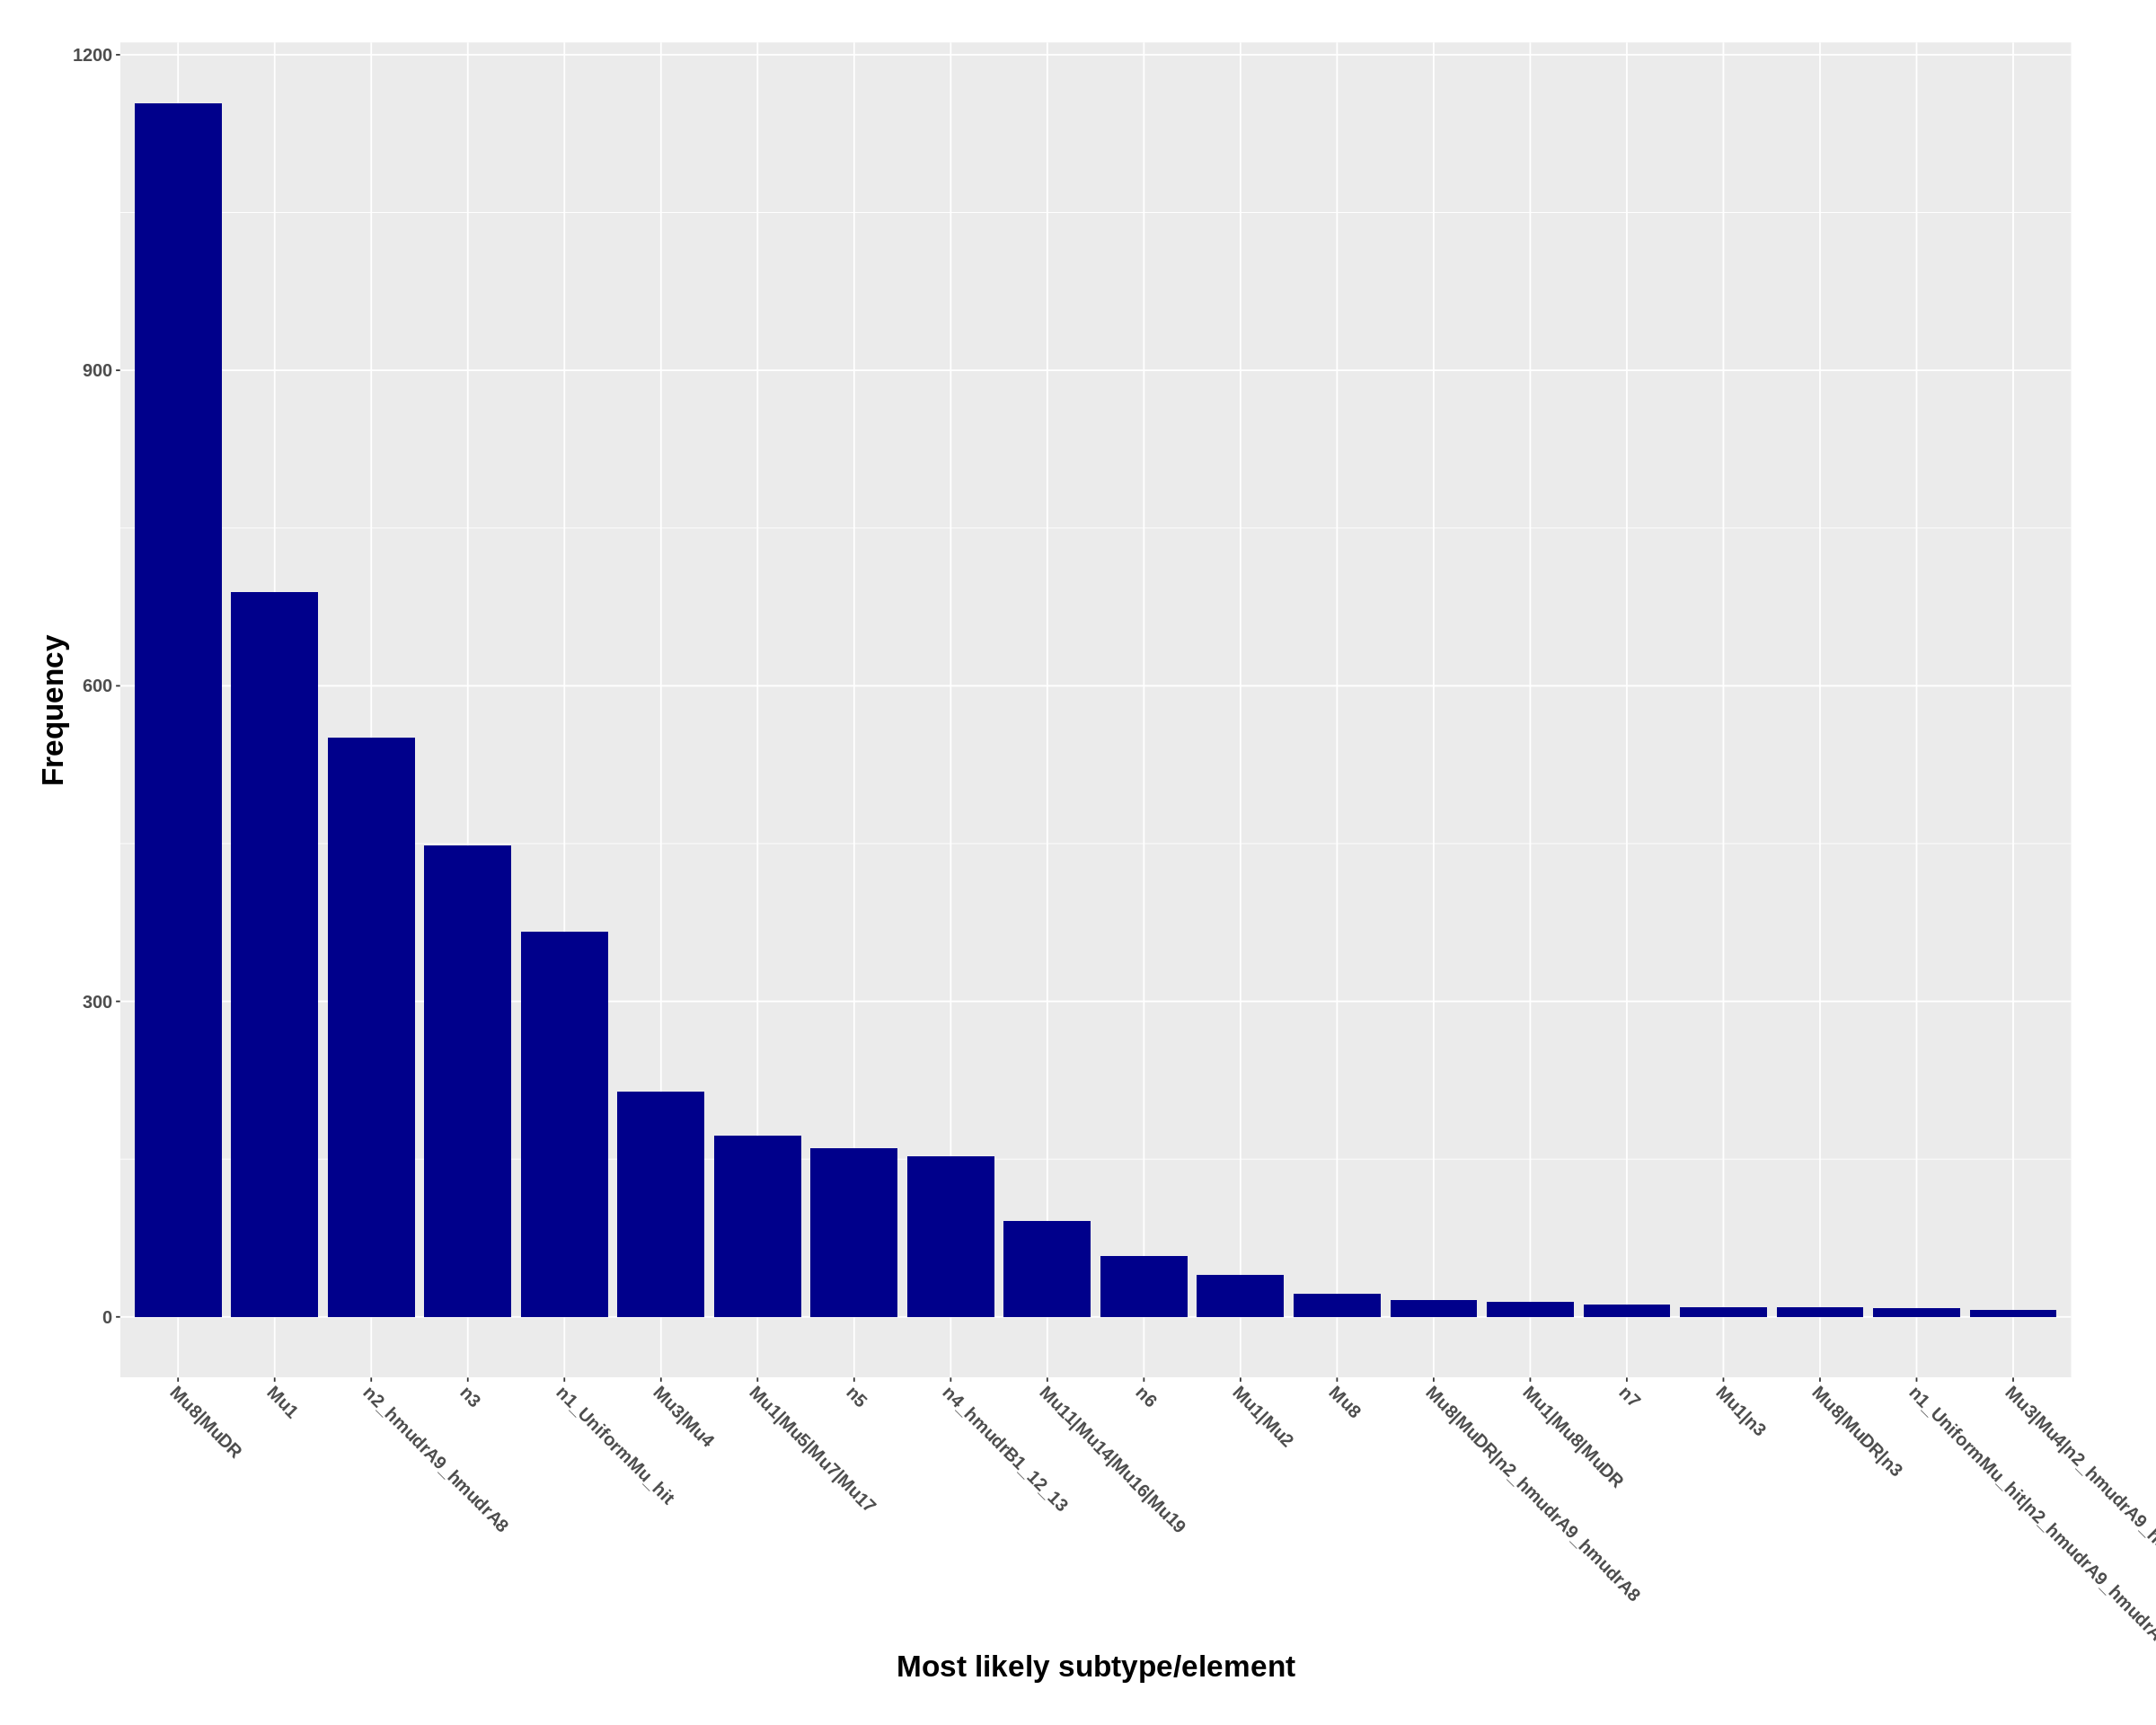

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


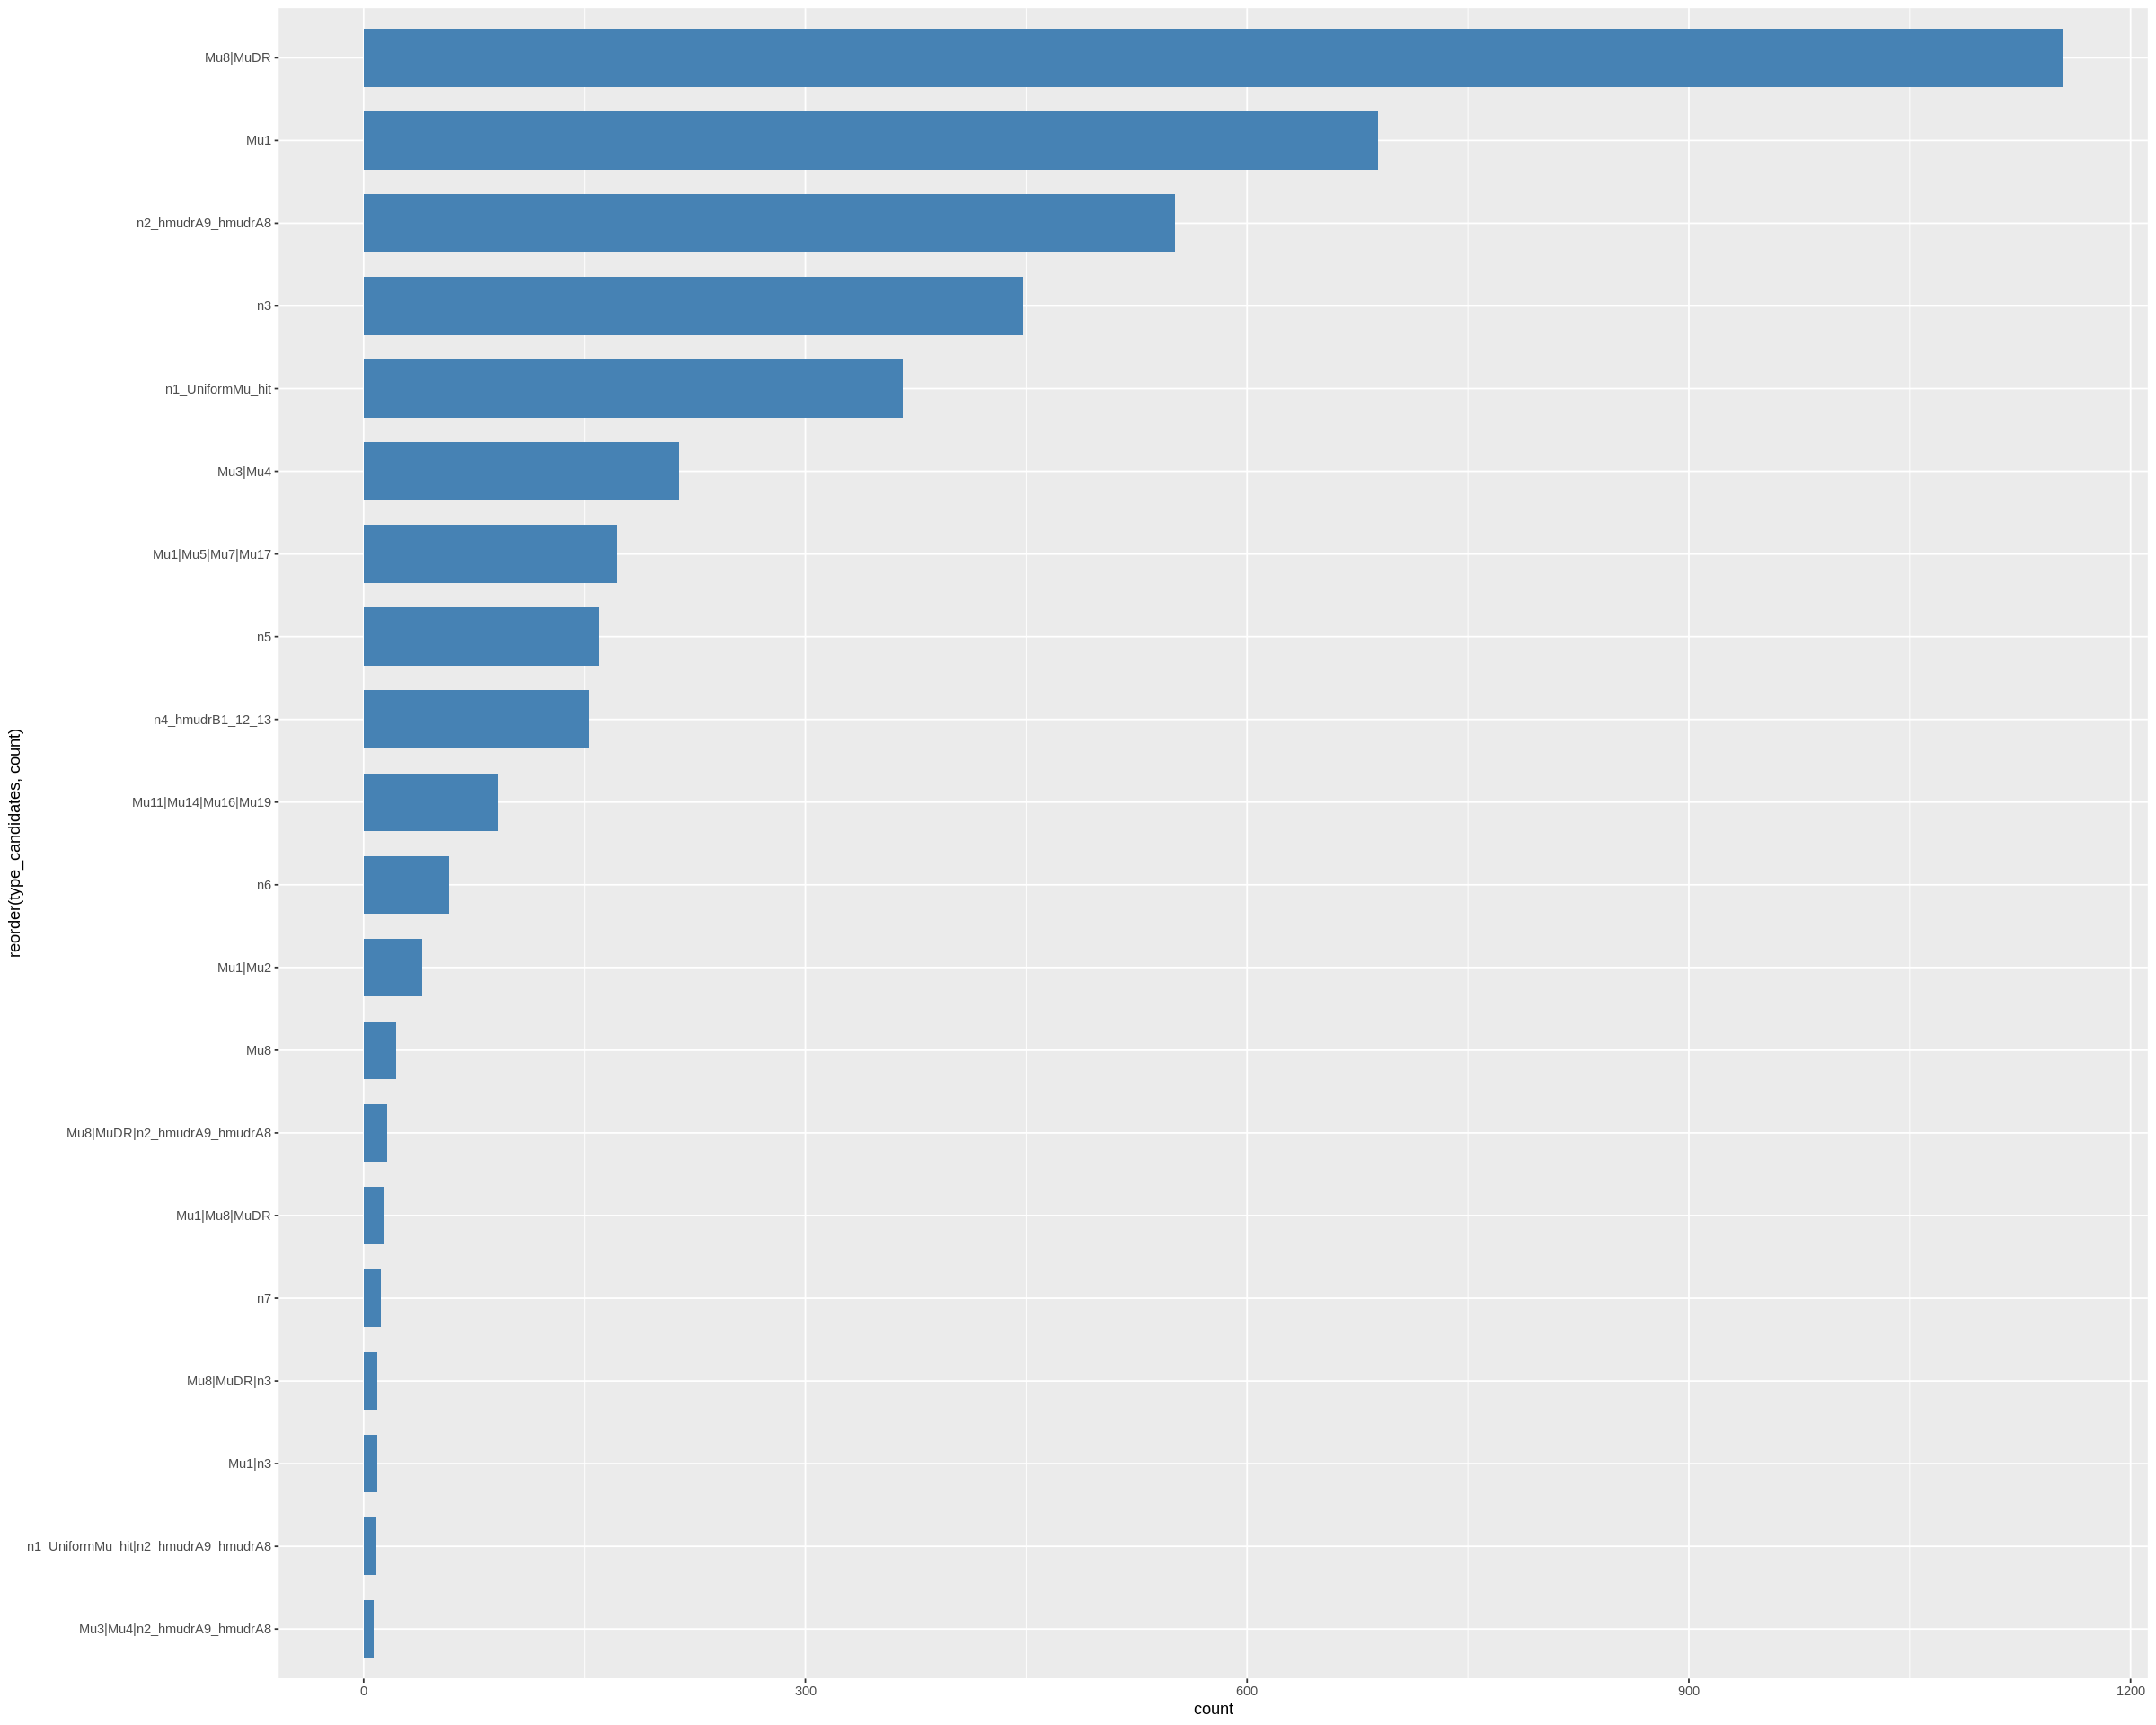

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


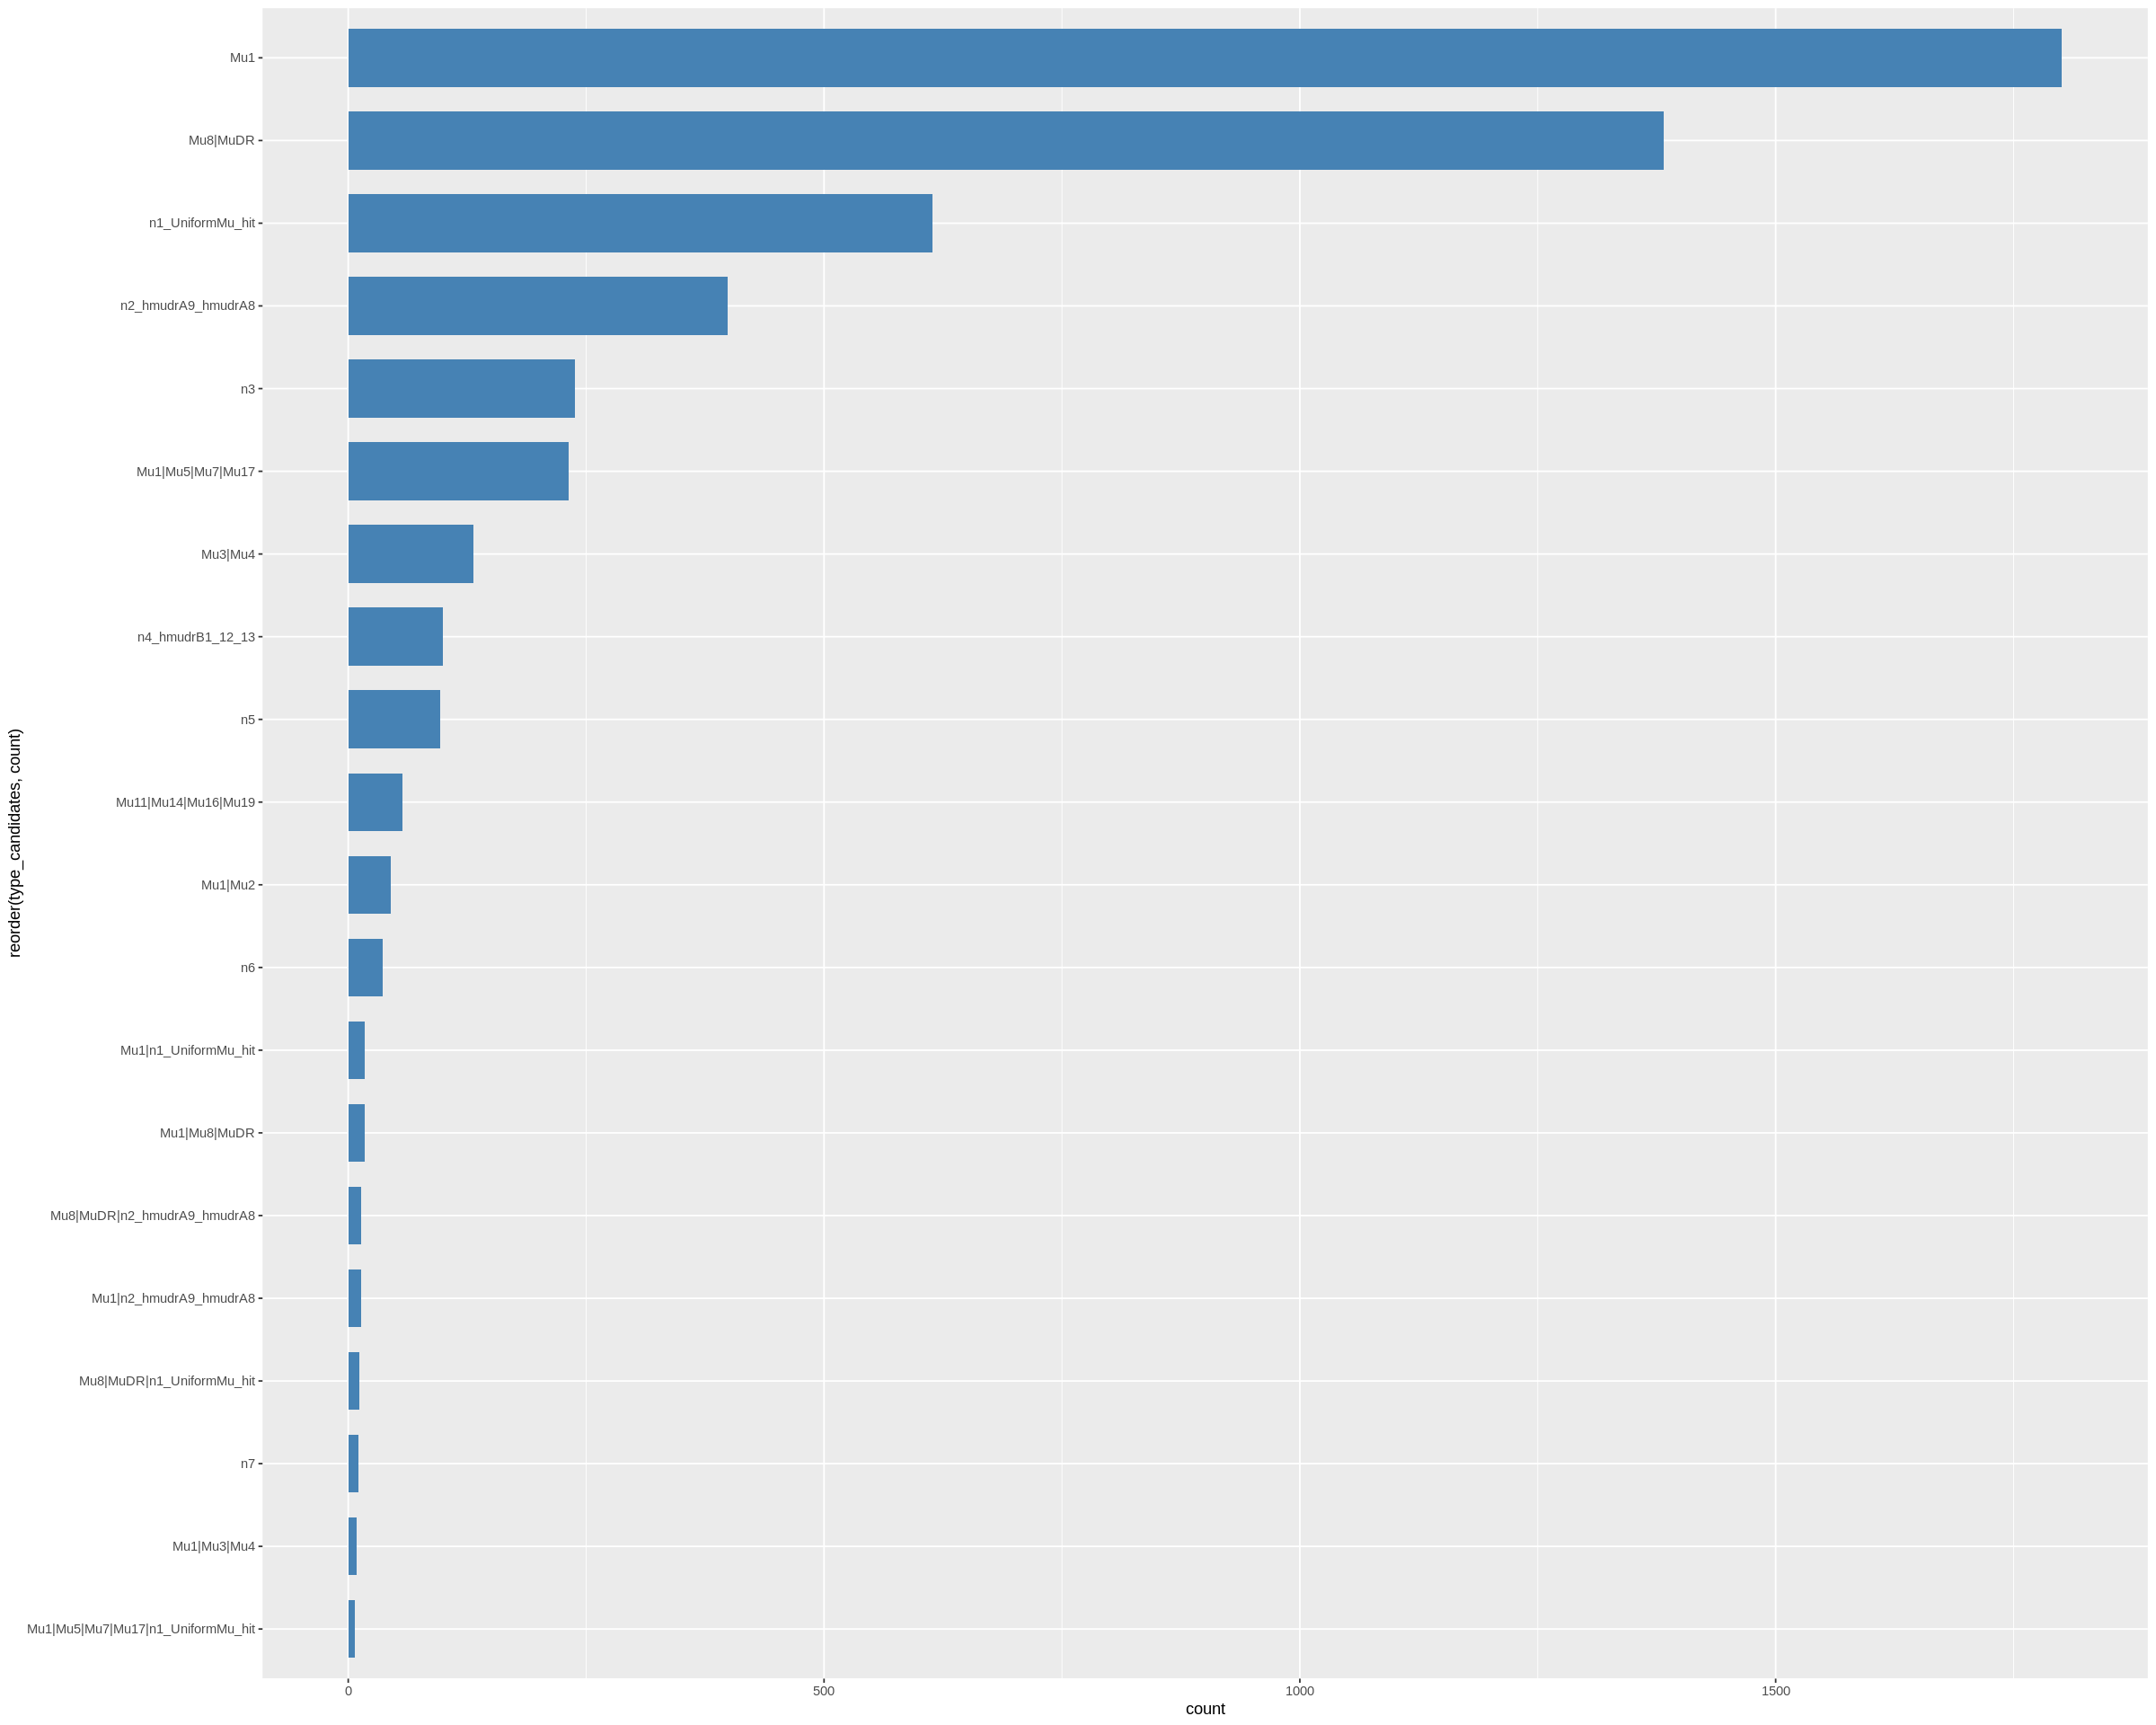

`summarise()` has grouped output by 'lib'. You can override using the `.groups` argument.


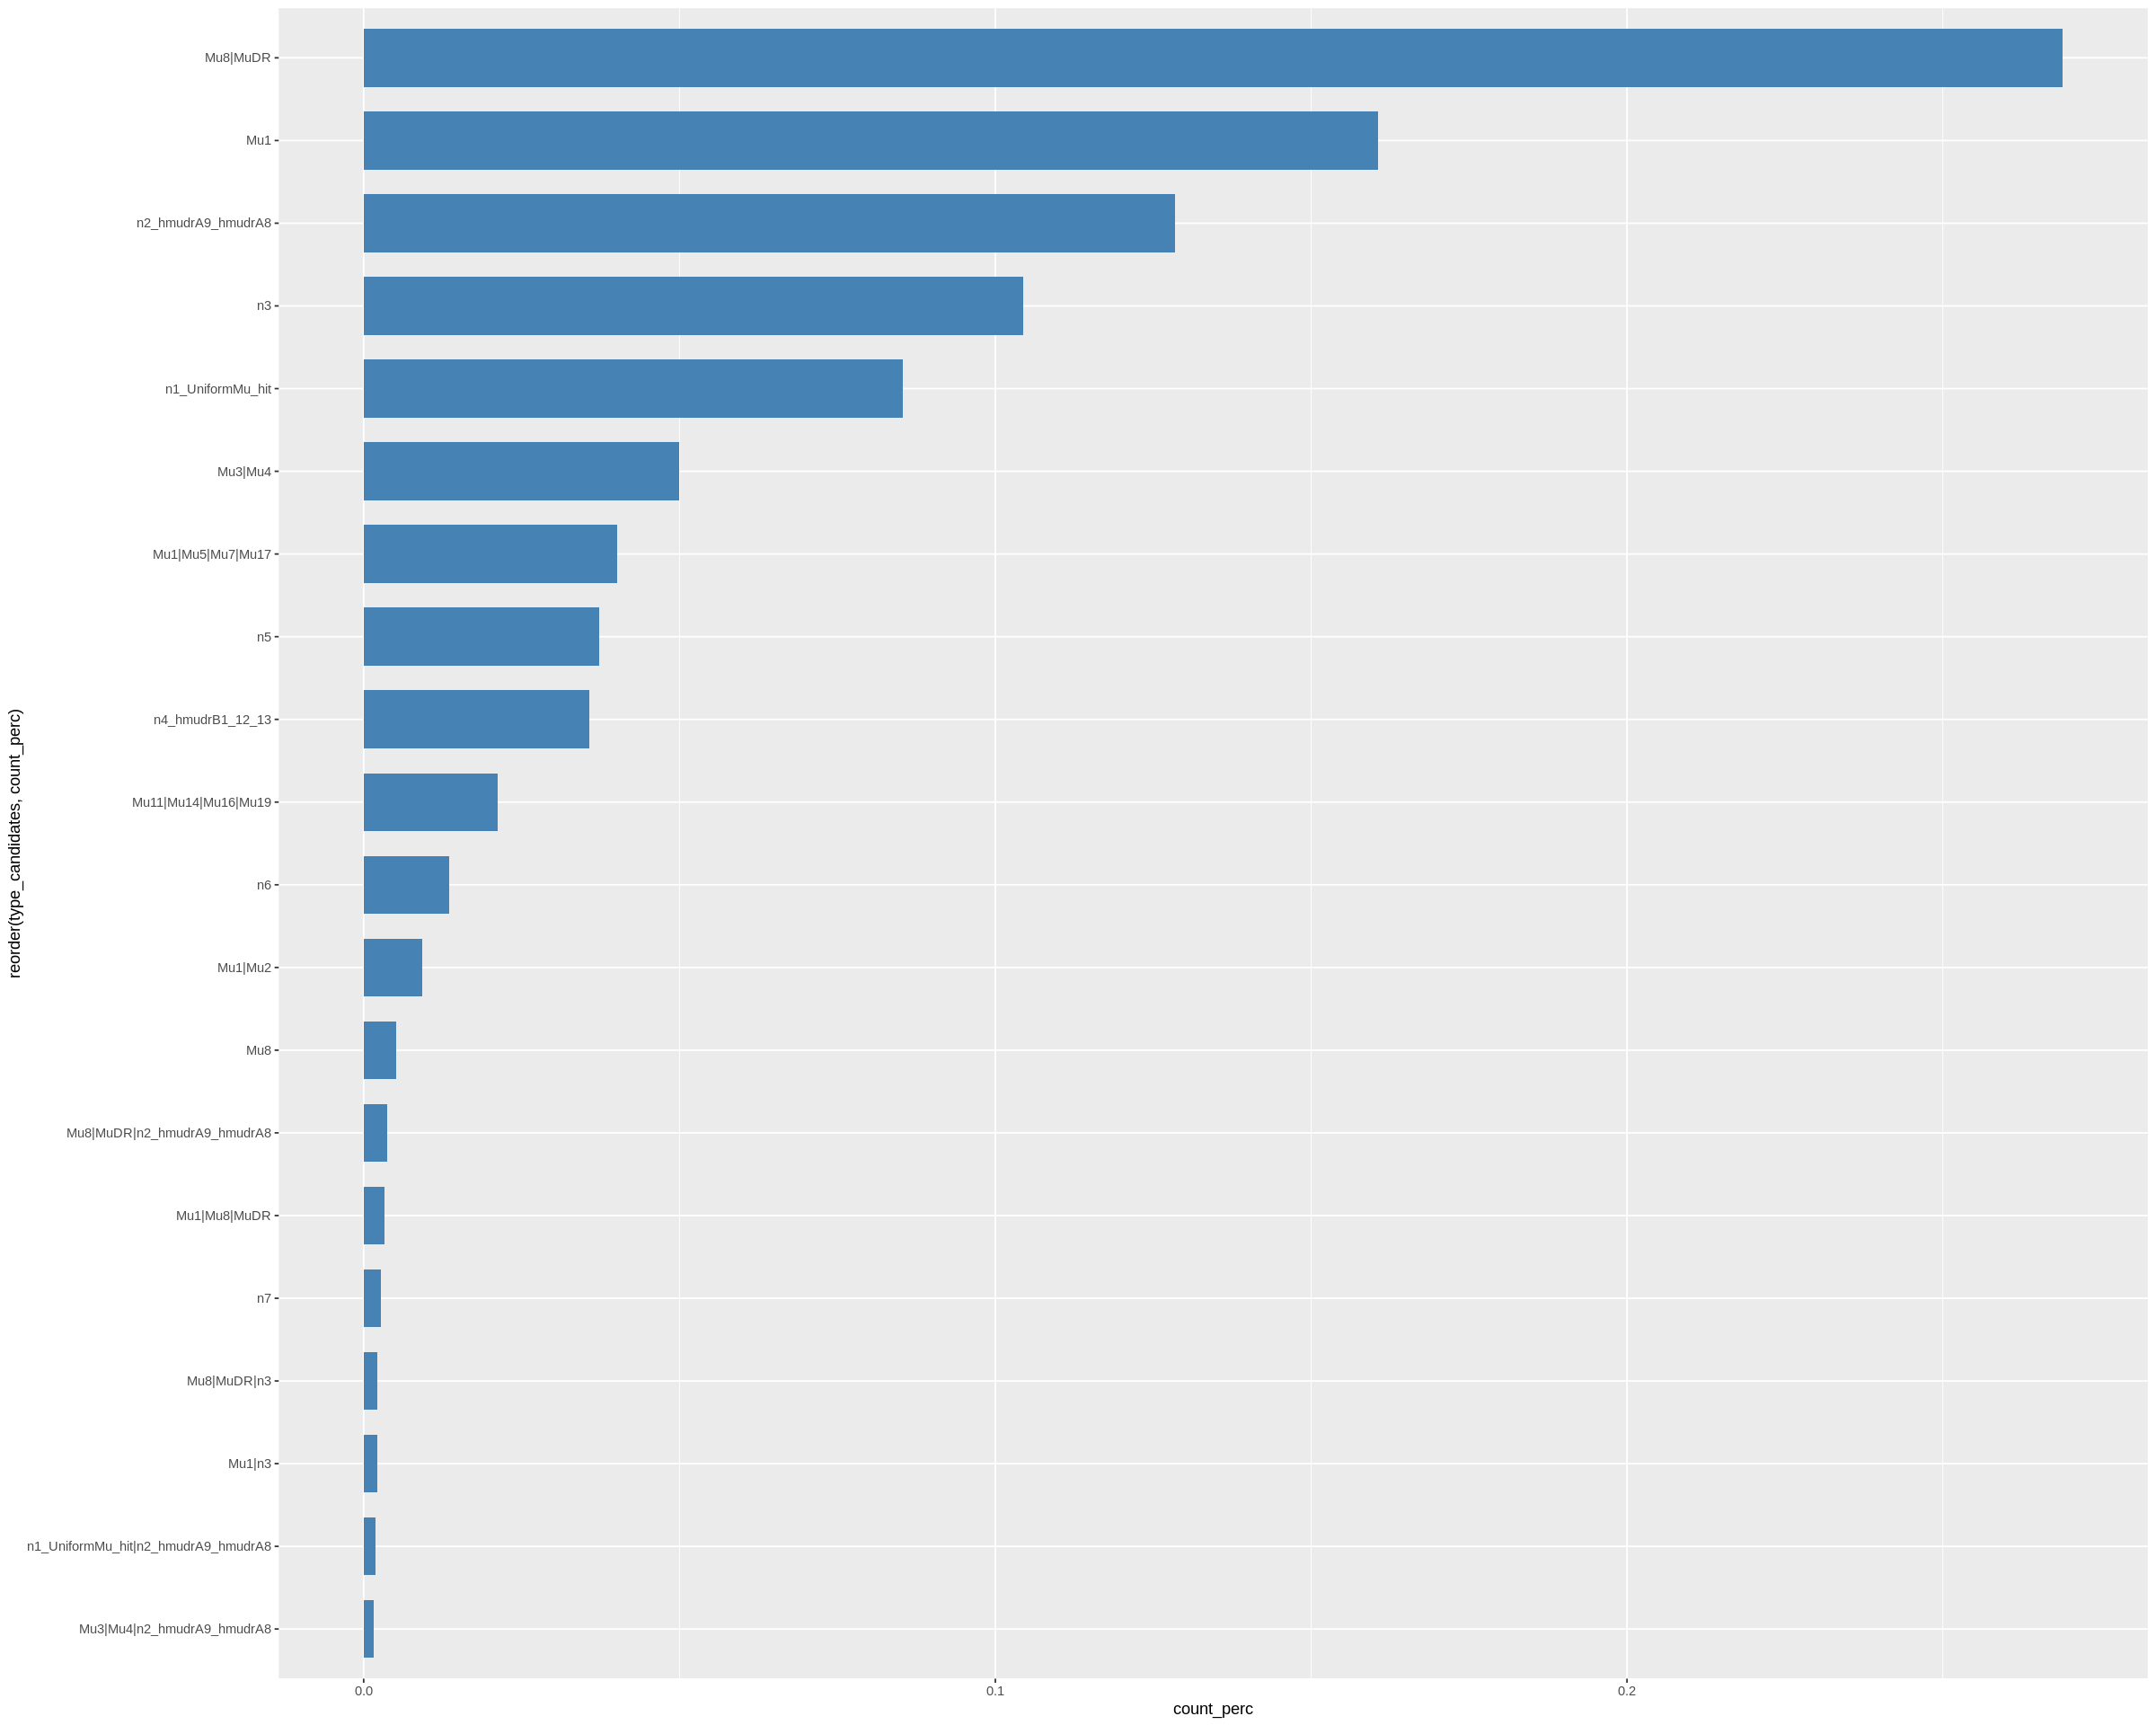

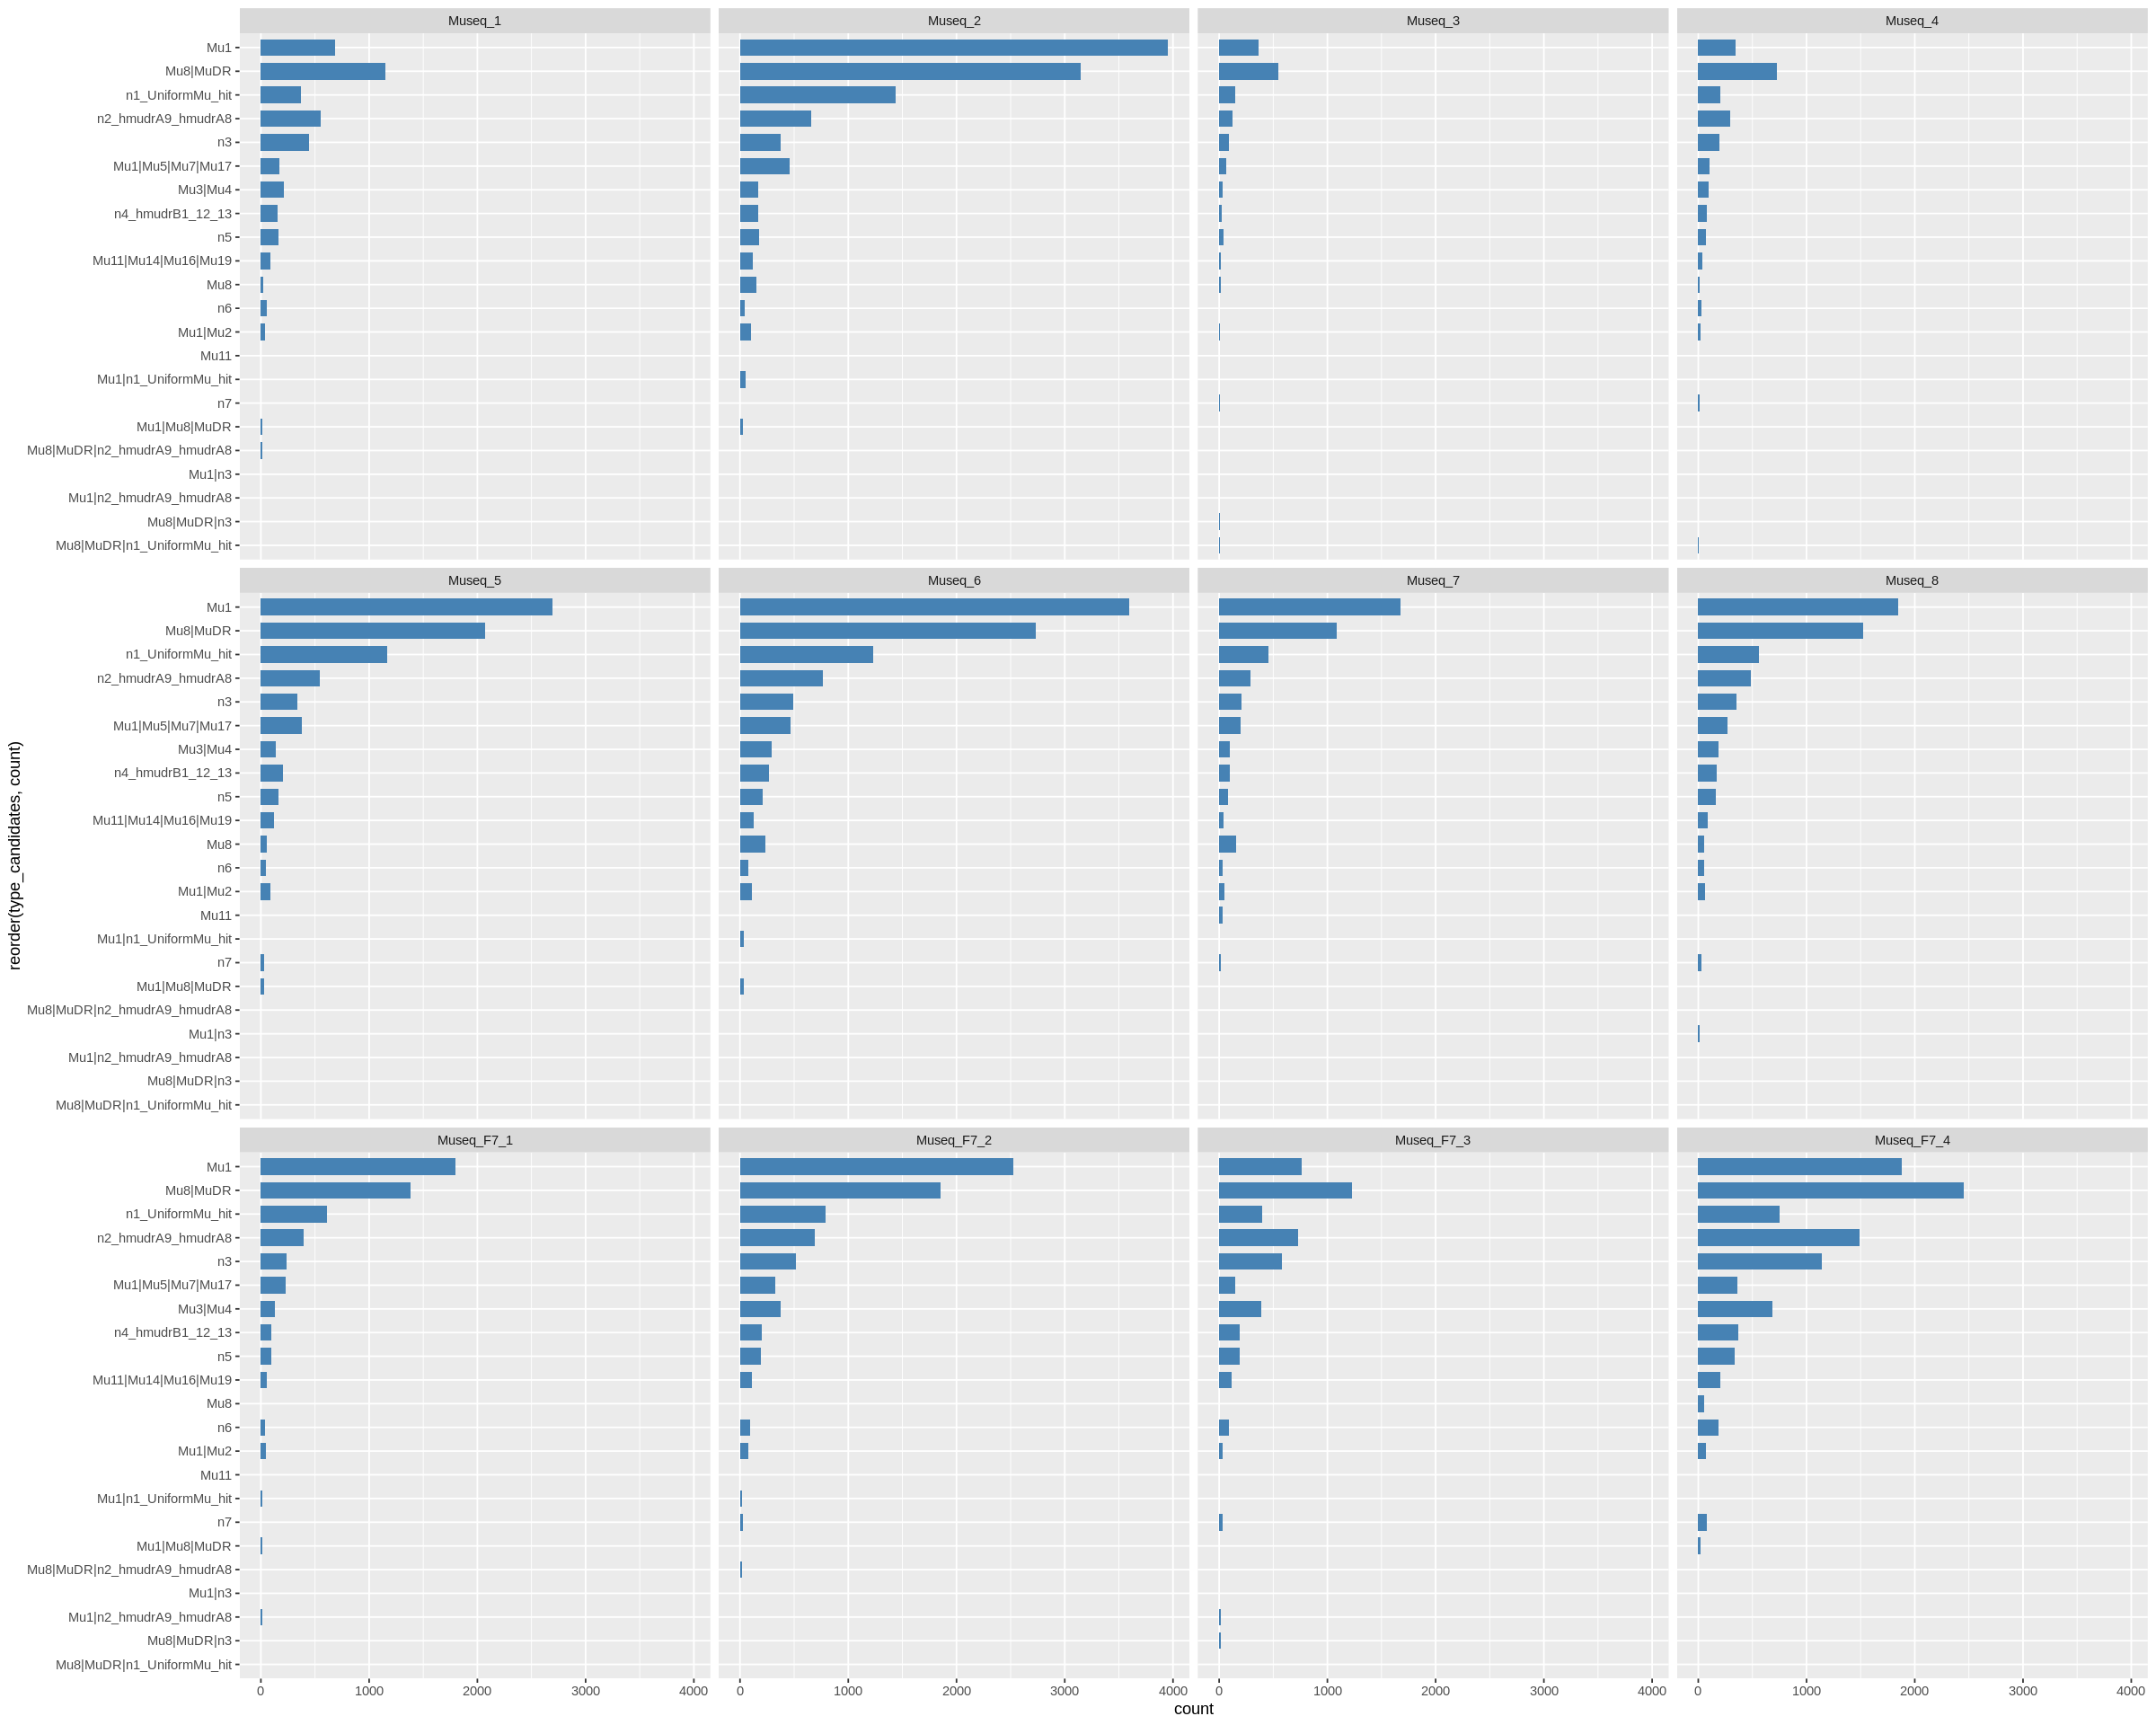

In [7]:
options(repr.plot.width=20, repr.plot.height=16)


all_Mu_not_annotated_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(x= reorder(type_candidates, -count), y=count)) +
    geom_col(fill = "darkblue") +
    xlab("Most likely subtype/element") +
    ylab("Frequency") +
#    title("ddd") +
    theme(axis.text.y=element_text(size=12, face="bold"),
          axis.text.x=element_text(size=12, face="bold", angle = 315, hjust = 0),
          axis.title=element_text(size=20,face="bold"),
          plot.margin = unit(c(1,2,1,1), "cm"))


all_Mu_not_annotated_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()

all_Mu_not_annotated_merged %>%
  filter(lib == "Museq_F7_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=20) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip()

#or percentage
all_Mu_not_annotated_merged %>%
  filter(lib == "Museq_1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  mutate(count_perc = count/sum(.$count)) %>%
  head(n=20) %>%
    ggplot(., aes(x = reorder(type_candidates, count_perc), y= count_perc)) +
      geom_bar(stat = "identity", width=0.7, fill="steelblue") +
      coord_flip()


all_Mu_not_annotated_merged %>%
#  filter(lib != "Museq_3") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(lib, type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  dplyr::slice(1:15) %>% 
  ggplot(., aes(x = reorder(type_candidates, count), y= count)) +
    geom_bar(stat = "identity", width=0.7, fill="steelblue") +
    coord_flip() + 
    facet_wrap(~lib)

### Candidates determination for TE typing validation

In [254]:
all_Mu_merged %>%
#  filter(lib == "Mu1") %>%
  filter(StartReads >= 5) %>%
  filter(EndReads >= 5) %>%
  filter(perc_best_type_of_types >= 0.3) %>%
  group_by(type_candidates) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  slice(1:15) %>%
  pull(type_candidates)

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'slice': Rle of type 'list' is not supported


In [265]:
Mu_F7_4_germinal_not_annotated %>%
  arrange(Chr, InsertionStart) %>%
  head()

,Chr,InsertionStart,InsertionEnd,Sample,StartReads,EndReads,TotalReads,Mu1_L,Mu1_R,Mu2_L,⋯,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name,perc_uncategorized,perc_best_type_of_types,all_candidates,type_candidates,lib
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,1,34332,34340,Col_09,7,4,11,0,1,0,⋯,5,TIED,TIED,TIED,TIED,0.1818182,0.1818182,Mu8|MuDR|n2_hmudrA9_hmudrA8|n4_hmudrB1_12_13|uncategorized,Mu8|MuDR|n2_hmudrA9_hmudrA8|n4_hmudrB1_12_13,Museq_F7_4
2,1,34332,34340,Row_08,7,9,16,1,1,0,⋯,4,WINNER,TIED,uncategorized,TIED,0.3125000,0.1250000,Mu1|n4_hmudrB1_12_13|n7|uncategorized,Mu1|n4_hmudrB1_12_13|n7,Museq_F7_4
3,1,34640,34648,Col_16,20,20,40,1,4,0,⋯,3,WINNER,TIED,uncategorized,TIED,0.2750000,0.2250000,Mu8|MuDR|uncategorized,Mu8|MuDR,Museq_F7_4
4,1,34640,34648,Row_05,15,26,41,1,3,0,⋯,3,TIED,TIED,TIED,TIED,0.1951220,0.1951220,Mu8|MuDR|uncategorized,Mu8|MuDR,Museq_F7_4
5,1,34706,34714,Col_11,10,20,30,0,4,0,⋯,2,WINNER,WINNER,n2_hmudrA9_hmudrA8,n2_hmudrA9_hmudrA8,0.1000000,0.1666667,n2_hmudrA9_hmudrA8,n2_hmudrA9_hmudrA8,Museq_F7_4
6,1,34706,34714,Row_05,9,11,20,0,1,0,⋯,2,WINNER,WINNER,n6,n6,0.1000000,0.3500000,n6,n6,Museq_F7_4


In [14]:
# functioning the candidate determination

best_candidate_determination_not_annotated <- function(mu_species, read_support_threshold, max_output_rows) {

  best_candidates <- all_Mu_not_annotated_merged %>%
    #exclude B73 lib 3 - Col background
    filter(lib != "Museq_3") %>%
    filter(StartReads >= read_support_threshold) %>%
    filter(EndReads >= read_support_threshold) %>%
    filter(perc_best_type_of_types >= 0.2) %>%
    filter(type_candidates == mu_species) %>%
#    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates)  %>%
    group_by(lib, Chr, InsertionStart, type_candidates)  %>%
    tally() %>%
    arrange(desc(n)) %>%
    filter(n >= 2)
  nrow(best_candidates)
  
  final_best_candidates <- all_Mu_not_annotated_merged %>%
#    dplyr::right_join(., best_candidates, by = c("lib", "Chr", "GeneStart", "InsertionStart", "GeneID", "type_candidates")) %>%
    dplyr::right_join(., best_candidates, by = c("lib", "Chr", "InsertionStart", "type_candidates")) %>%
#    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates) %>%
    group_by(lib, Chr, InsertionStart, type_candidates) %>%
    #merge sample information so we have each intersection on every line
    mutate(Samples = paste0(Sample, collapse = "|")) %>%
    #also retain stock information
#    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates, Samples, stock) %>%
    group_by(lib, Chr, InsertionStart, type_candidates, Samples) %>%
    #compute total reads & percentage of best type association
    summarise(TotalReads = sum(TotalReads), perc_best_type_of_types = sum(perc_best_type_of_types)/2) %>%
    mutate(frac_proof_reads = TotalReads*perc_best_type_of_types) %>%
    arrange(desc(perc_best_type_of_types))
  
  #if more than 20 insertion candidates pass threshold, reduce total number to 20
  if (max_output_rows != "all" & nrow(final_best_candidates) > max_output_rows) {
    final_best_candidates <- head(final_best_candidates, n=max_output_rows)
  }
      
  return(final_best_candidates)

}    

In [5]:
# functioning the candidate determination

best_candidate_determination <- function(mu_species, read_support_threshold, max_output_rows) {

  best_candidates <- all_Mu_merged %>%
    #exclude B73 lib 3 - Col background
    filter(lib != "Museq_3") %>%
    filter(StartReads >= read_support_threshold) %>%
    filter(EndReads >= read_support_threshold) %>%
    filter(perc_best_type_of_types >= 0.2) %>%
    filter(type_candidates == mu_species) %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates)  %>%
    tally() %>%
    arrange(desc(n)) %>%
    filter(n >= 2)
  nrow(best_candidates)
  
  final_best_candidates <- all_Mu_merged %>%
    dplyr::right_join(., best_candidates, by = c("lib", "Chr", "GeneStart", "InsertionStart", "GeneID", "type_candidates")) %>%
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates) %>%
    #merge sample information so we have each intersection on every line
    mutate(Samples = paste0(Sample, collapse = "|")) %>%
    #also retain stock information
    group_by(lib, Chr, GeneStart, InsertionStart, GeneID, type_candidates, Samples, stock) %>%
    #compute total reads & percentage of best type association
    summarise(TotalReads = sum(TotalReads), perc_best_type_of_types = sum(perc_best_type_of_types)/2) %>%
    mutate(frac_proof_reads = TotalReads*perc_best_type_of_types) %>%
    arrange(desc(perc_best_type_of_types))
  
  #if more than 20 insertion candidates pass threshold, reduce total number to 20
  if (max_output_rows != "all" & nrow(final_best_candidates) > max_output_rows) {
    final_best_candidates <- head(final_best_candidates, n=max_output_rows)
  }
      
  return(final_best_candidates)

}    

In [6]:
Mu1_candidates <- best_candidate_determination(mu_species = "Mu1", read_support_threshold = 5, max_output_rows = 20)
Mu8_MuDR_candidates <- best_candidate_determination(mu_species = "Mu8|MuDR", read_support_threshold = 5, max_output_rows = 20)
n1_UniformMu_hit_candidates <- best_candidate_determination(mu_species = "n1_UniformMu_hit", read_support_threshold = 5, max_output_rows = 20)
n2_hmudrA9_hmudrA8_candidates <- best_candidate_determination(mu_species = "n2_hmudrA9_hmudrA8", read_support_threshold = 5, max_output_rows = 20)
n3_candidates <- best_candidate_determination(mu_species = "n3", read_support_threshold = 5, max_output_rows = 20)
Mu1_Mu5_Mu7_Mu17_candidates <- best_candidate_determination(mu_species = "Mu1|Mu5|Mu7|Mu17", read_support_threshold = 5, max_output_rows = 20)
Mu3_Mu4_candidates <- best_candidate_determination(mu_species = "Mu3|Mu4", read_support_threshold = 5, max_output_rows = 20)
n4_hmudrB1_12_13_candidates <- best_candidate_determination(mu_species = "n4_hmudrB1_12_13", read_support_threshold = 5, max_output_rows = 20)
n5_candidates <- best_candidate_determination(mu_species = "n5", read_support_threshold = 5, max_output_rows = 20)
Mu8_candidates <- best_candidate_determination(mu_species = "Mu8", read_support_threshold = 5, max_output_rows = 20)
Mu11_Mu14_Mu16_Mu19_candidates <- best_candidate_determination(mu_species = "Mu11|Mu14|Mu16|Mu19", read_support_threshold = 5, max_output_rows = 20)
Mu1_Mu2_candidates <- best_candidate_determination(mu_species = "Mu1|Mu2", read_support_threshold = 5, max_output_rows = 20)
n6_candidates <- best_candidate_determination(mu_species = "n6", read_support_threshold = 5, max_output_rows = 20)
#read support set to 2 since no good cases where both ROW+COL pool support
n7_candidates <- best_candidate_determination(mu_species = "n7", read_support_threshold = 2, max_output_rows = 20)

`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'GeneStart', 'InsertionStart', 'GeneID', 'type_candidates',
'Samples'. You can override using the `.groups` ar

In [7]:
head(n1_UniformMu_hit_candidates)

lib,Chr,GeneStart,InsertionStart,GeneID,type_candidates,Samples,stock,TotalReads,perc_best_type_of_types,frac_proof_reads
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
Museq_F7_1,7,165564564,165566849,Zm00001eb323810,n1_UniformMu_hit,Row_10|Col_04,F-0220,25,0.4839744,12.09936
Museq_6,9,146058696,146068069,Zm00001eb397760,n1_UniformMu_hit,Row_09|Col_02,B-844,40,0.4833333,19.33333
Museq_8,6,135677837,135681166,Zm00001eb282370,n1_UniformMu_hit,Row_02|Col_12,D-0113,27,0.4505495,12.16484
Museq_6,4,74442039,74445090,Zm00001eb178320,n1_UniformMu_hit,Row_08|Col_19,B-837,36,0.4444444,16.00000
Museq_6,7,181480635,181484116,Zm00001eb330270,n1_UniformMu_hit,Row_01|Col_10,B-660,37,0.4394410,16.25932
Museq_6,7,181482999,181484116,Zm00001eb330280,n1_UniformMu_hit,Row_01|Col_10,B-660,37,0.4394410,16.25932


In [286]:
#list for excel sheet
candidate_list <- list(
  "Mu1_candidates" = Mu1_candidates,
  "Mu8_MuDR_candidates" = Mu8_MuDR_candidates,
  "n1_UniformMu_hit_candidates" = n1_UniformMu_hit_candidates,
  "n2_hmudrA9_hmudrA8_candidates" = n2_hmudrA9_hmudrA8_candidates,
  "n3_candidates" = n3_candidates,
  "Mu1_Mu5_Mu7_Mu17_candidates" = Mu1_Mu5_Mu7_Mu17_candidates,
  "Mu3_Mu4_candidates" = Mu3_Mu4_candidates,
  "n4_hmudrB1_12_13_candidates" = n4_hmudrB1_12_13_candidates,
  "n5_candidates" = n5_candidates,
  "Mu8_candidates" = Mu8_candidates,
  "Mu11_Mu14_Mu16_Mu19_candidates" = Mu11_Mu14_Mu16_Mu19_candidates,
  "Mu1_Mu2_candidates" = Mu1_Mu2_candidates,
  "n6_candidates" = n6_candidates,
  "n7_candidates"= n7_candidates
)

#writing to excel sheet
write.xlsx(x = candidate_list, file = "TE_typing_validation_candidates.xlsx", overwrite = TRUE)

Warning message in cor(., method = "pearson"):
“the standard deviation is zero”


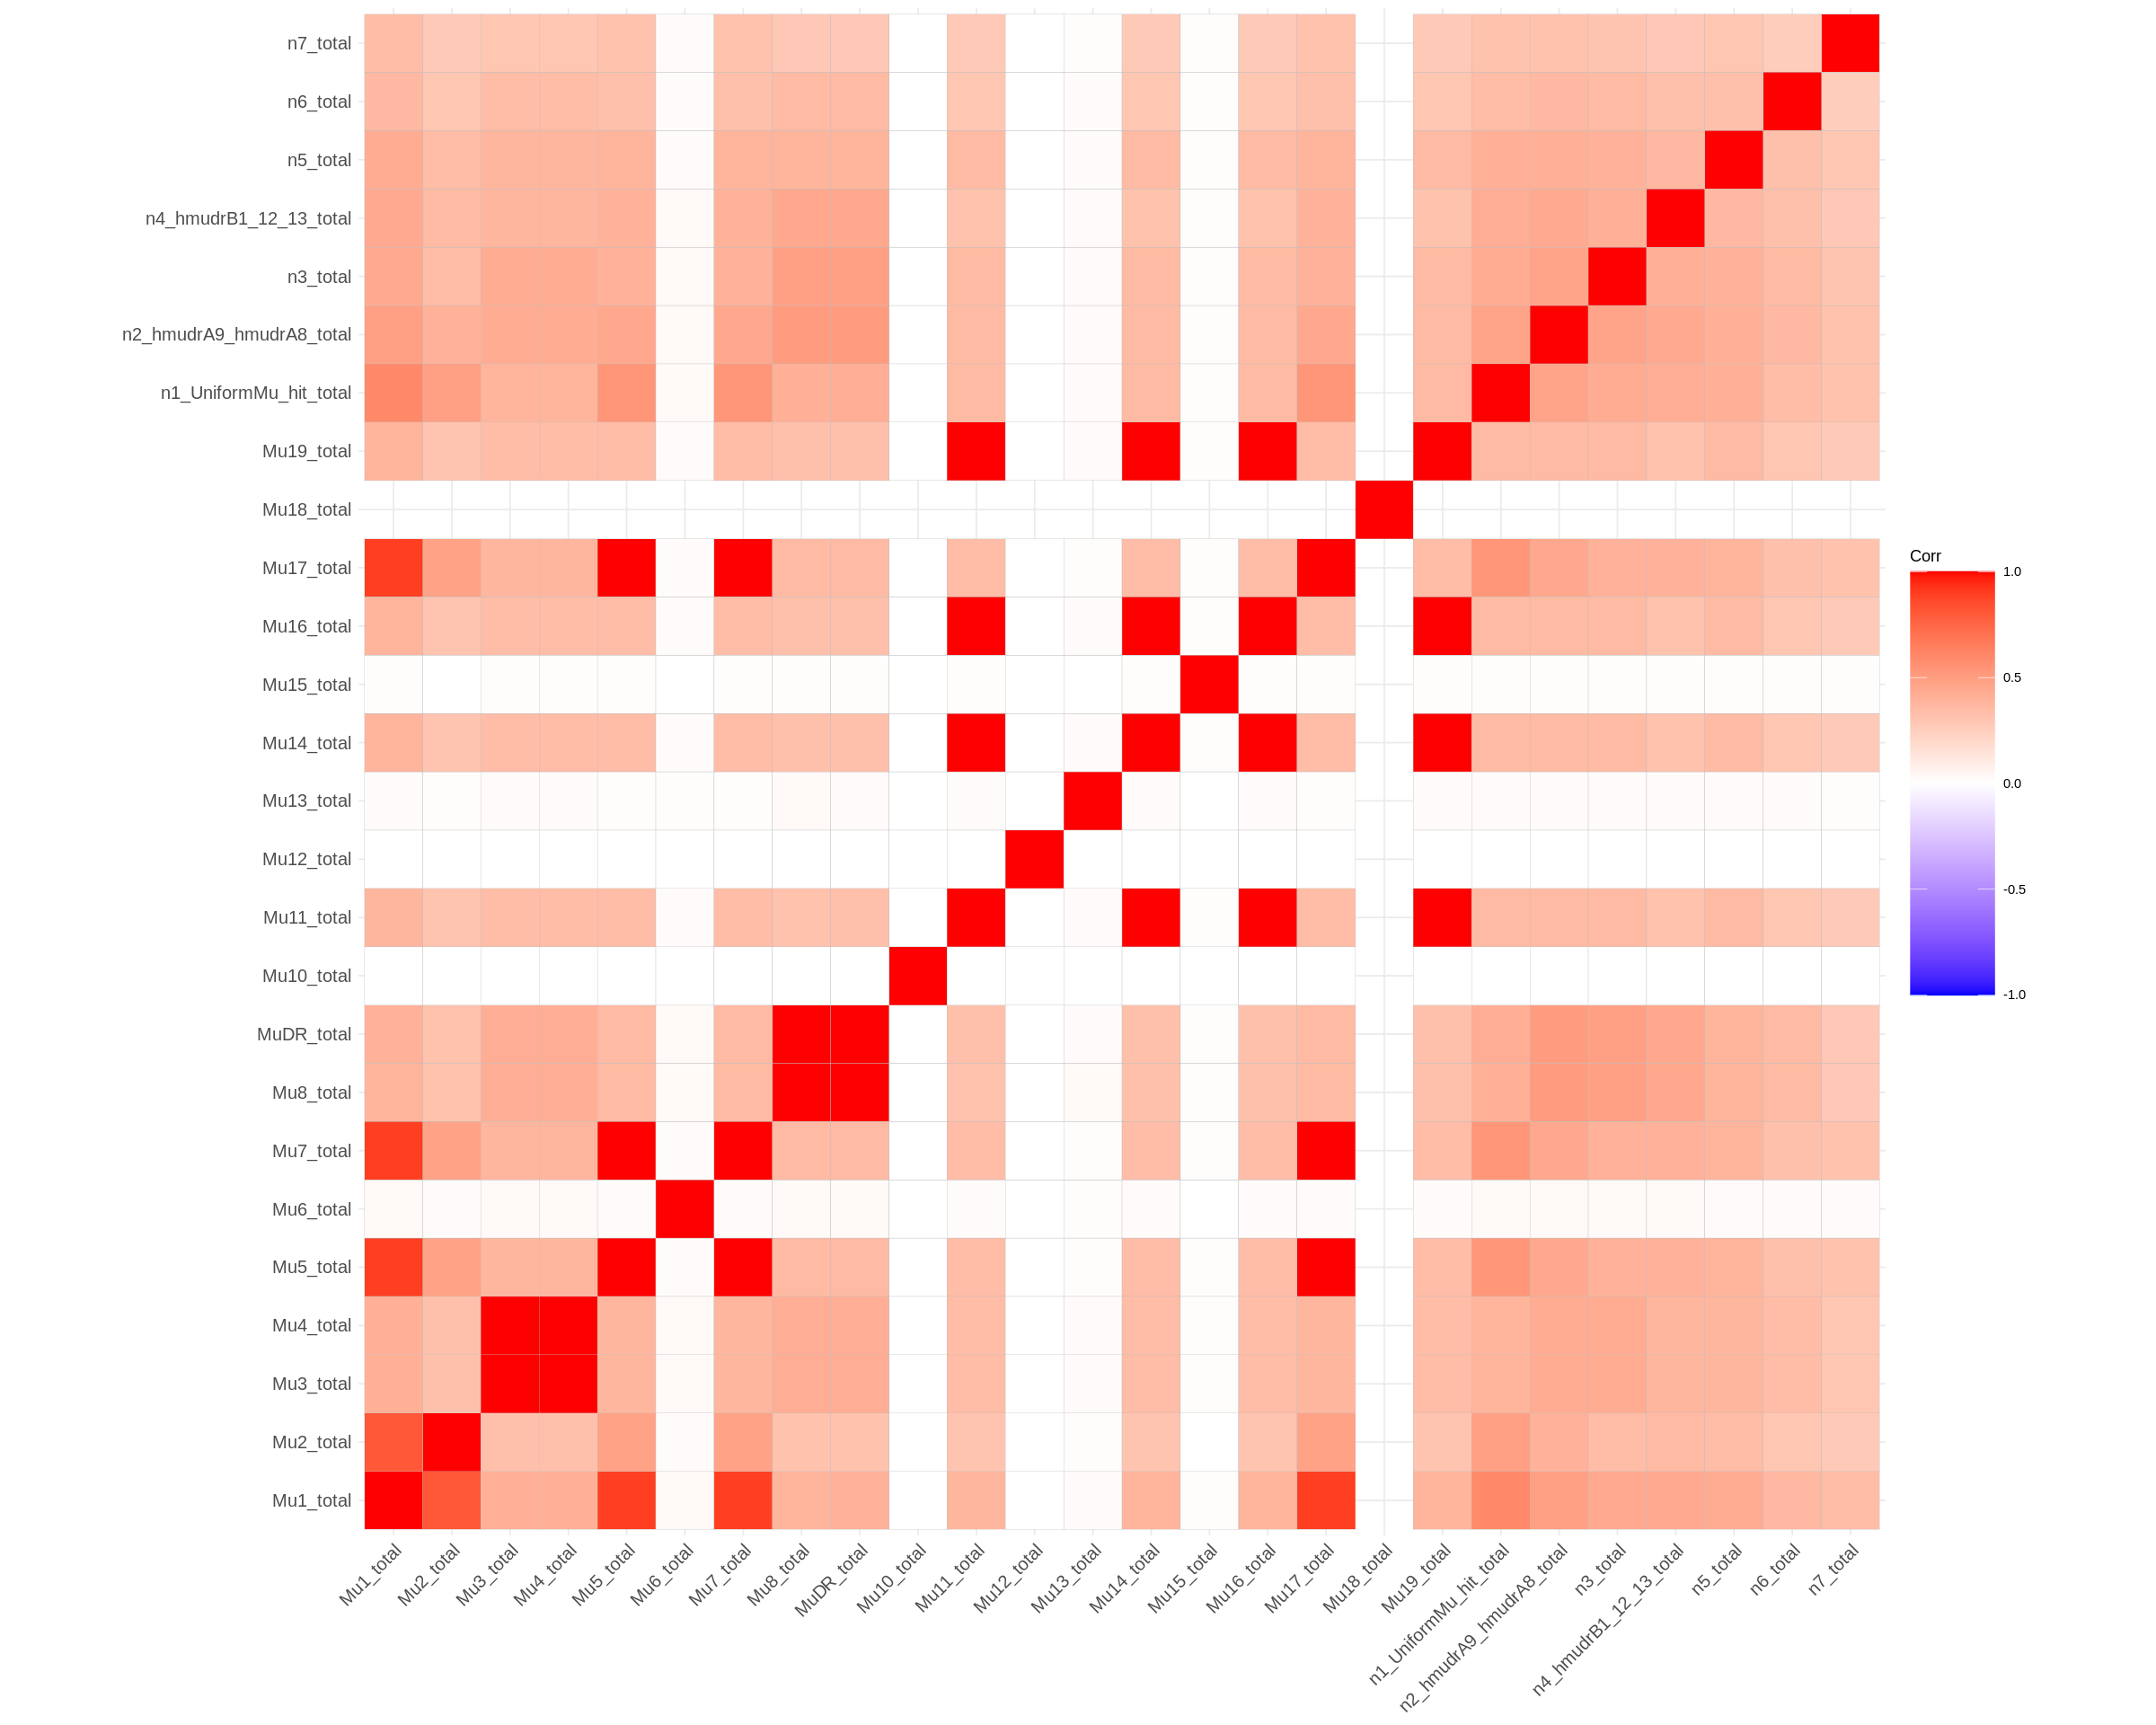

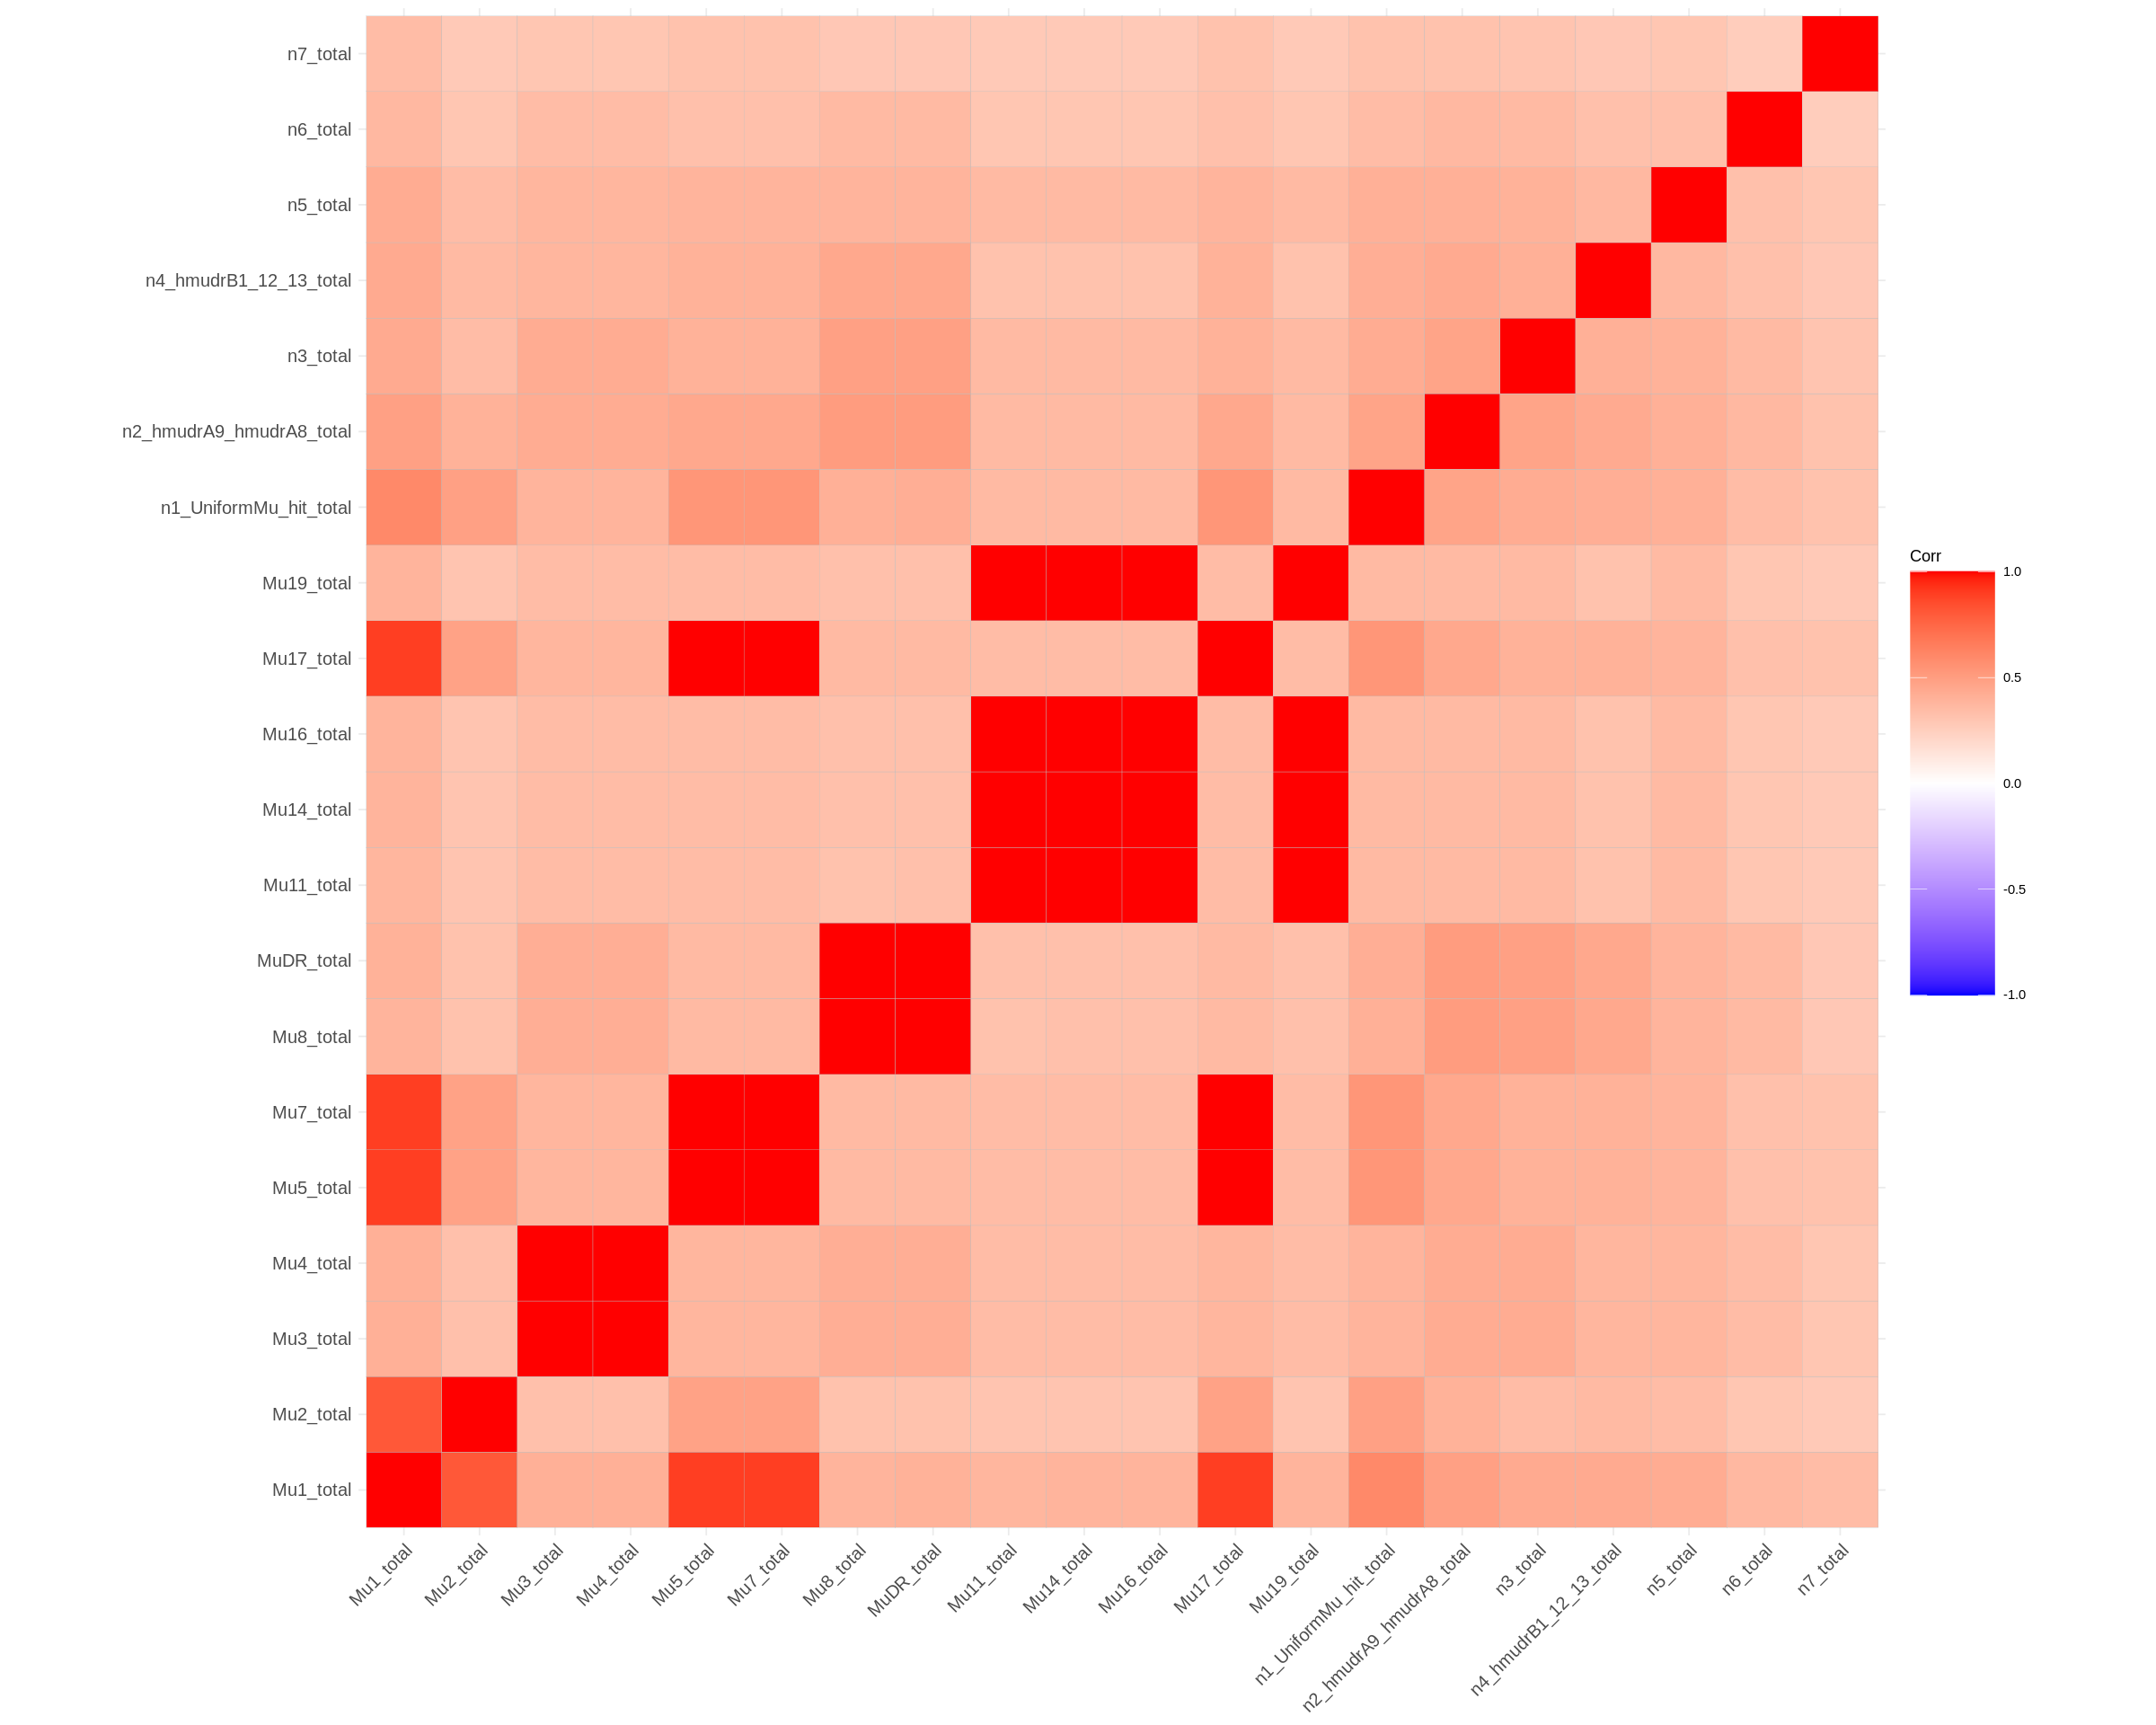

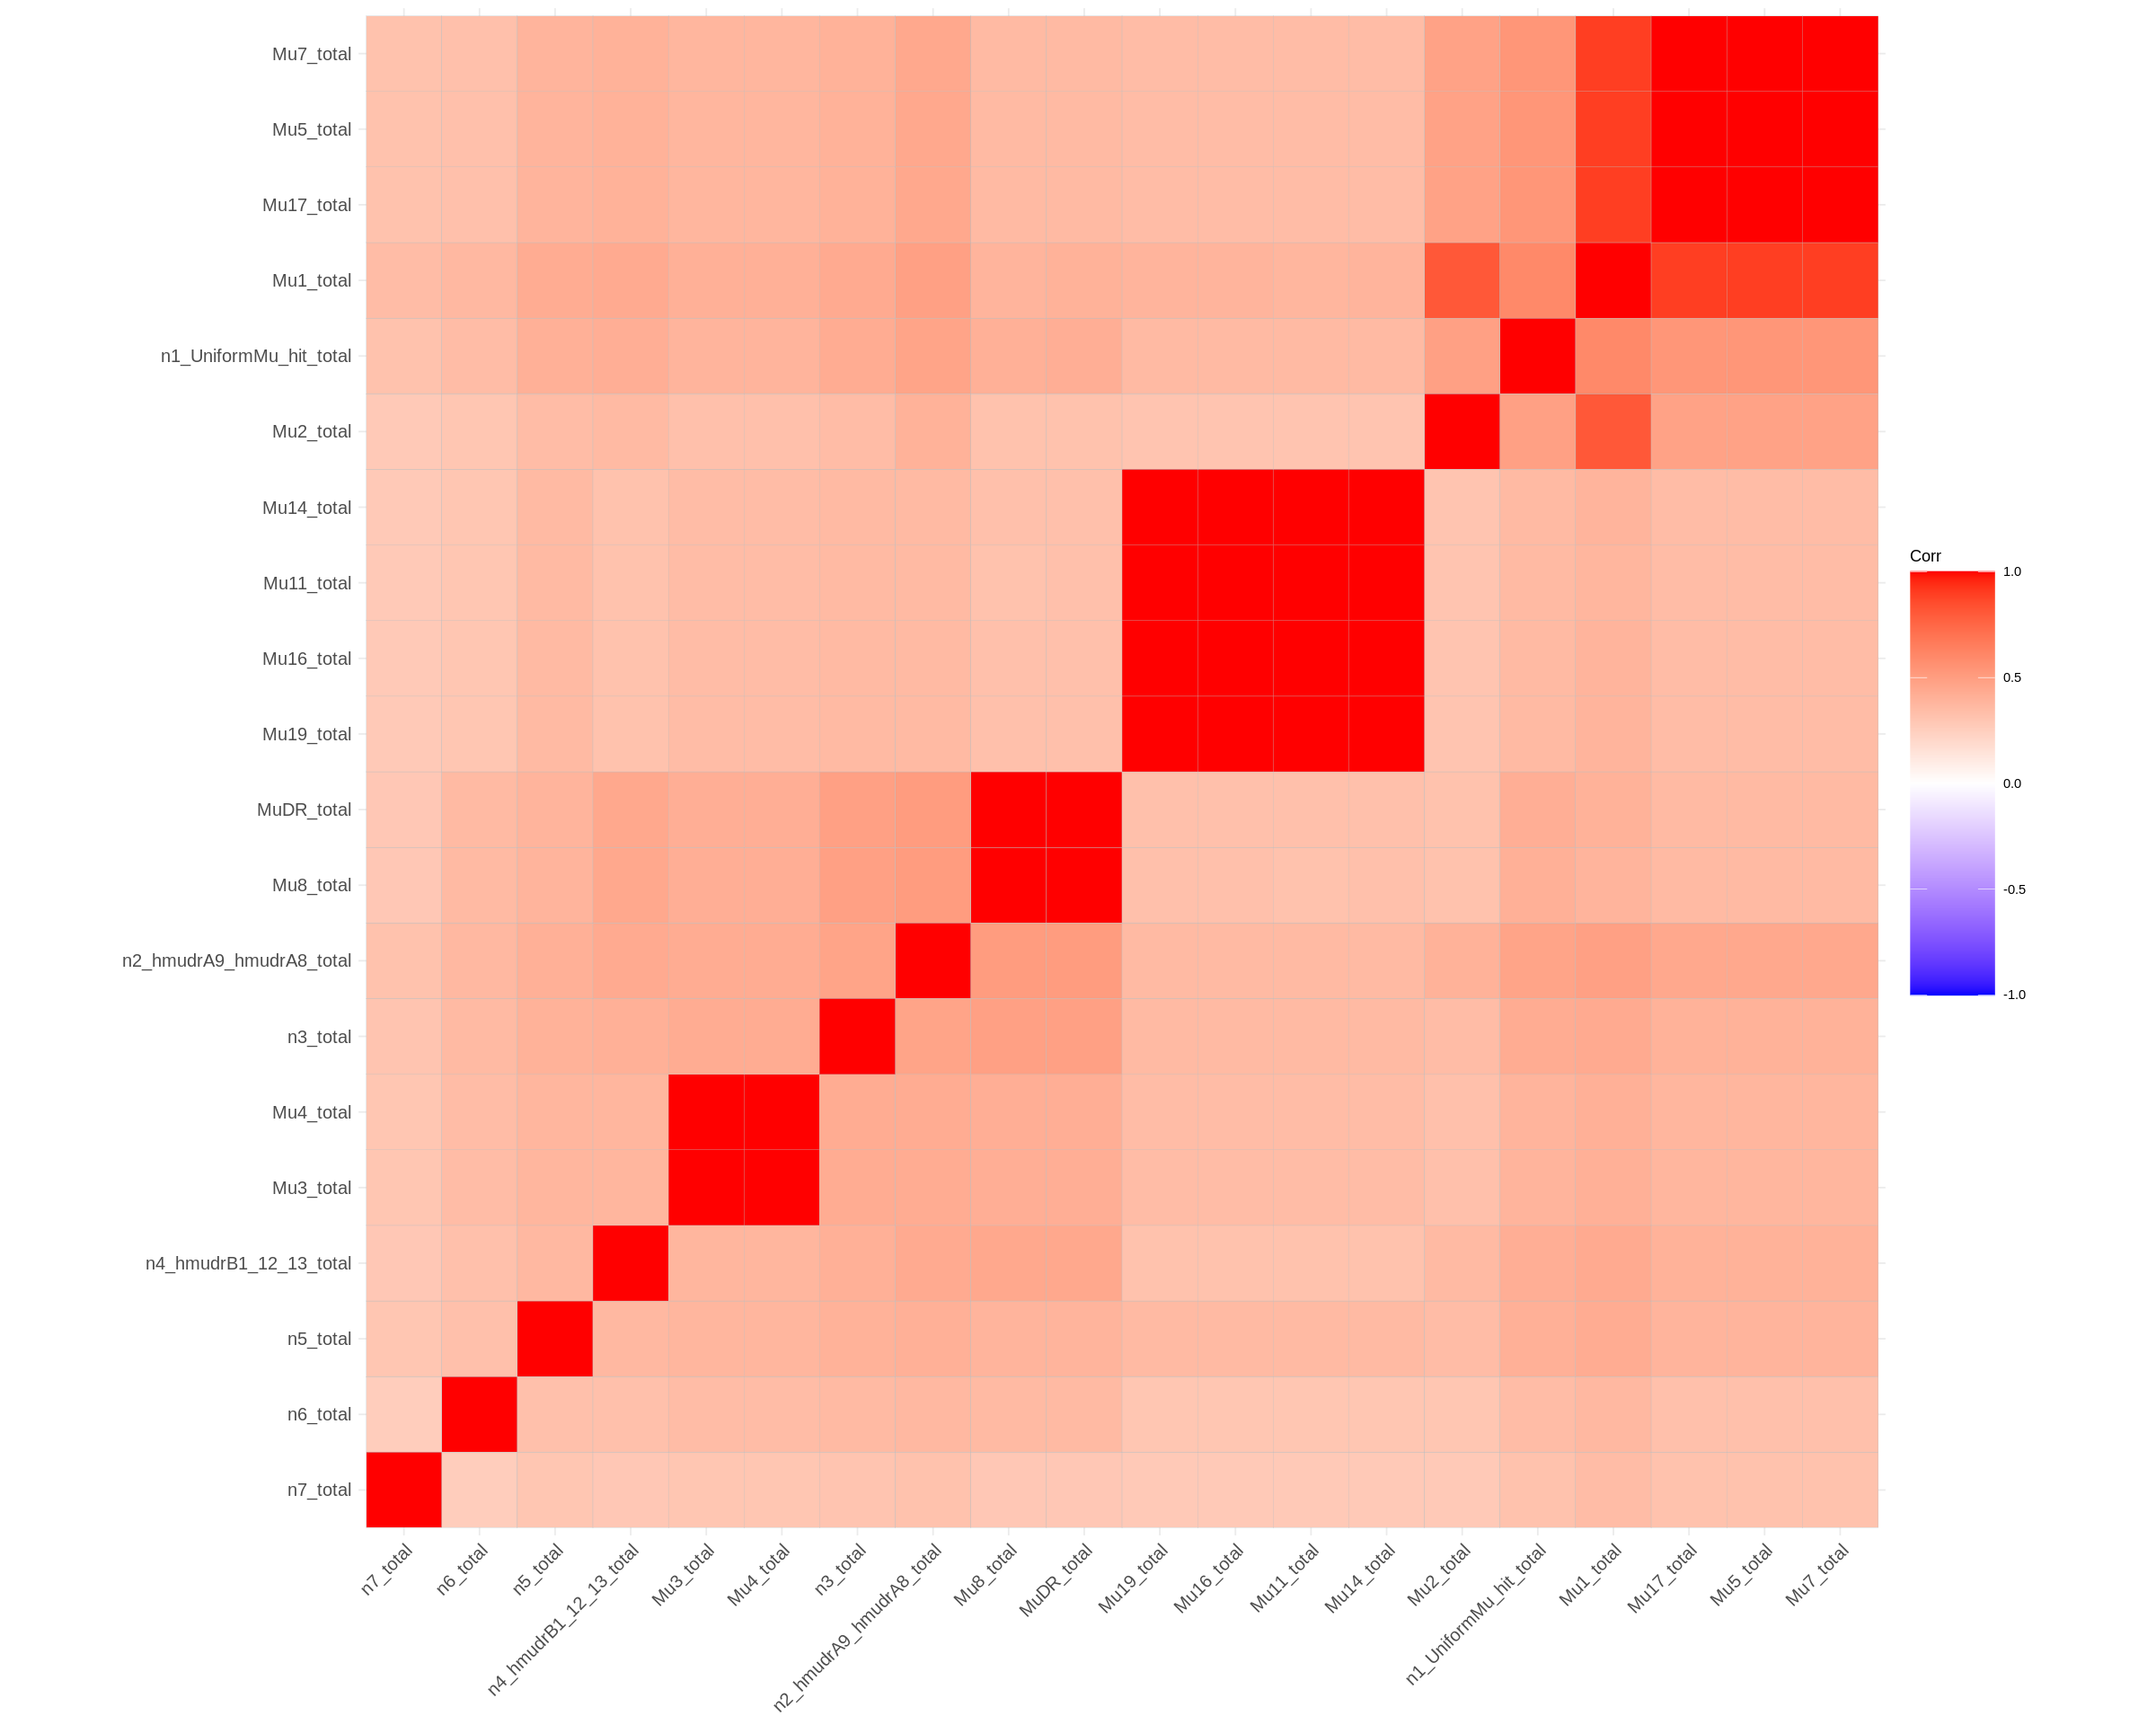

In [10]:
#why not correlation?
B73_Mu_not_annotated_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
           Mu10_total,
           Mu11_total,
           Mu12_total,
           Mu13_total,
           Mu14_total,
           Mu15_total,
           Mu16_total,
           Mu17_total,
           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))


B73_Mu_not_annotated_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
#           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
#           Mu10_total,
           Mu11_total,
#           Mu12_total,
#           Mu13_total,
           Mu14_total,
#           Mu15_total,
           Mu16_total,
           Mu17_total,
#           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot(hc.order = FALSE) +
        theme(legend.key.size = unit(2, 'cm'))


B73_Mu_not_annotated_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_total,
           Mu2_total,
           Mu3_total,
           Mu4_total,
           Mu5_total,
#           Mu6_total,
           Mu7_total,
           Mu8_total,
           MuDR_total,
#           Mu10_total,
           Mu11_total,
#           Mu12_total,
#           Mu13_total,
           Mu14_total,
#           Mu15_total,
           Mu16_total,
           Mu17_total,
#           Mu18_total,
           Mu19_total,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total) %>%
    cor(method = "pearson") %>% 
      ggcorrplot(hc.order = TRUE, hc.method = "complete") +
        theme(legend.key.size = unit(2, 'cm'))

Warning message in cor(., method = "pearson", ):
“the standard deviation is zero”


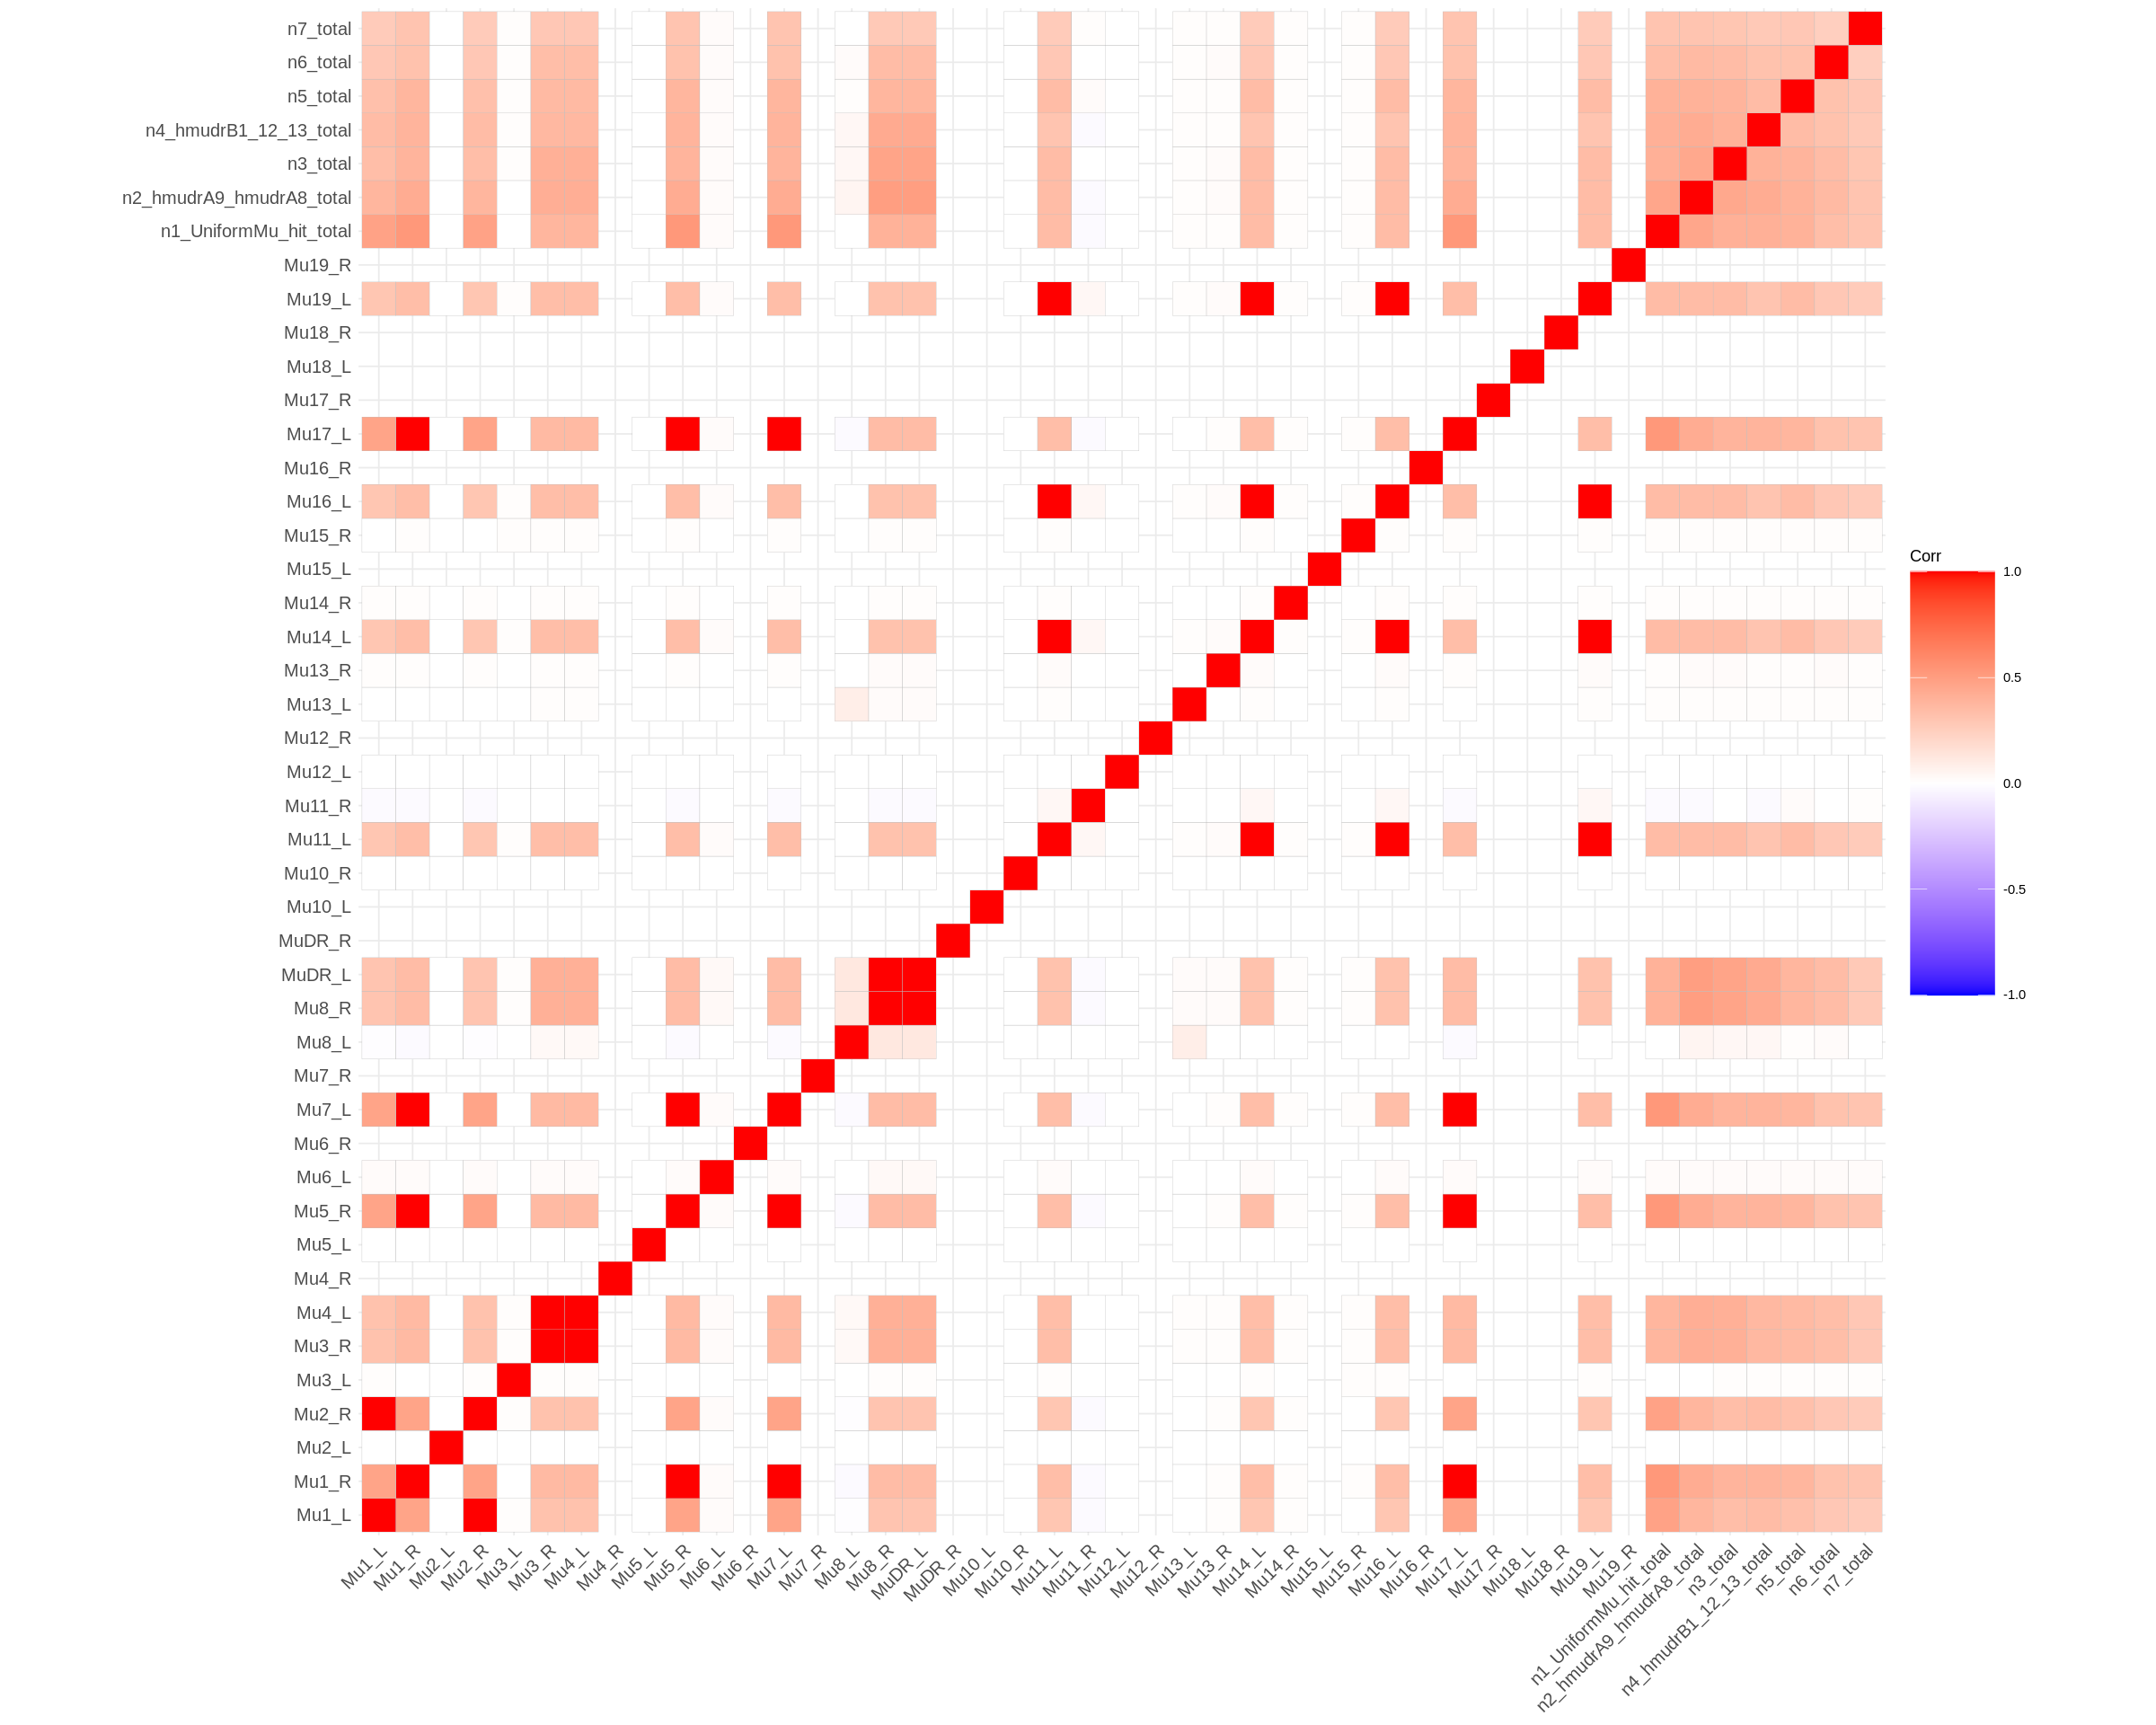

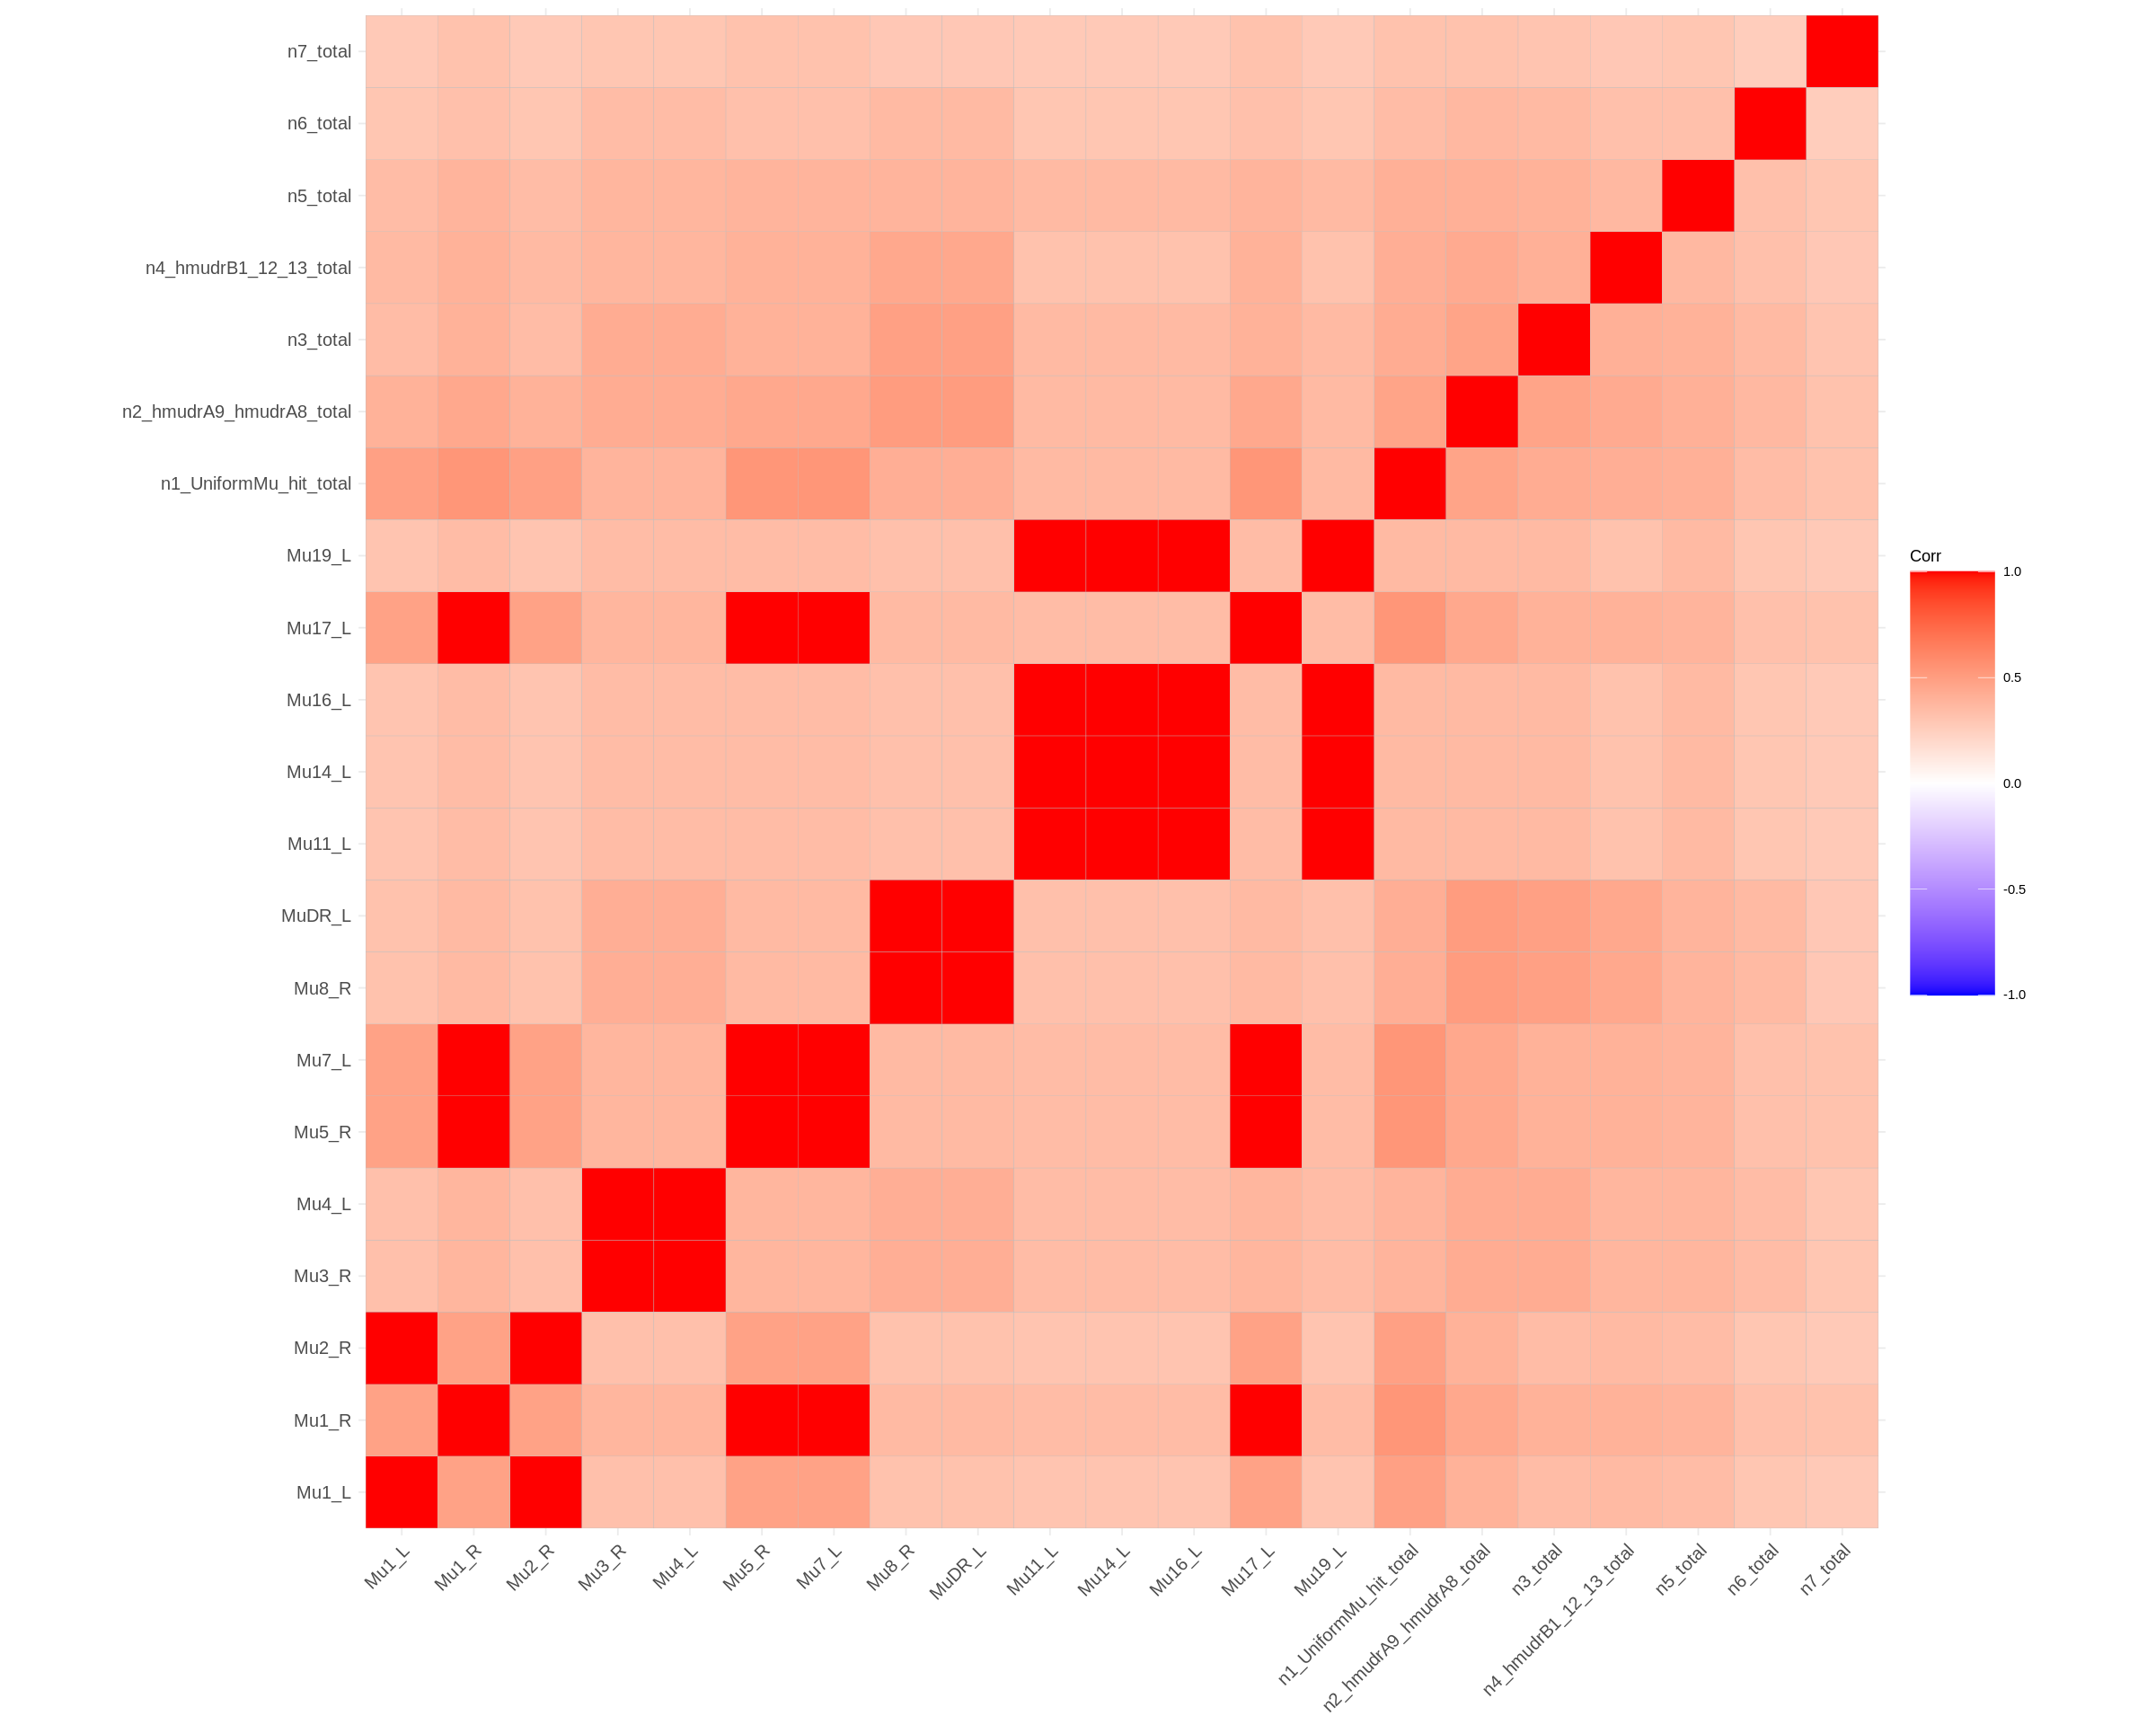

In [12]:
B73_Mu_not_annotated_merged %>%
    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_L, Mu1_R,
           Mu2_L, Mu2_R,
           Mu3_L, Mu3_R,
           Mu4_L, Mu4_R,
           Mu5_L, Mu5_R,
           Mu6_L, Mu6_R,
           Mu7_L, Mu7_R,
           Mu8_L, Mu8_R,
           MuDR_L, MuDR_R,
           Mu10_L, Mu10_R,
           Mu11_L, Mu11_R,
           Mu12_L, Mu12_R,
           Mu13_L, Mu13_R,
           Mu14_L, Mu14_R,
           Mu15_L, Mu15_R,
           Mu16_L, Mu16_R,
           Mu17_L, Mu17_R,
           Mu18_L, Mu18_R,
           Mu19_L, Mu19_R,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total
          ) %>%
    cor(method = "pearson", ) %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))

B73_Mu_not_annotated_merged %>%
#    filter(lib != "Museq_3") %>%
    filter(StartReads >= 5) %>%
    filter(EndReads >= 5) %>%
    select(Mu1_L, Mu1_R,
           Mu2_R,
           Mu3_R,
           Mu4_L,
           Mu5_R,
           Mu7_L,
           Mu8_R,
           MuDR_L,
           Mu11_L,
           Mu14_L,
           Mu16_L,
           Mu17_L,
           Mu19_L,
           n1_UniformMu_hit_total, 
           n2_hmudrA9_hmudrA8_total,
           n3_total,
           n4_hmudrB1_12_13_total,
           n5_total,
           n6_total,
           n7_total
          ) %>%
    cor(method = "pearson", ) %>% 
      ggcorrplot() +
        theme(legend.key.size = unit(2, 'cm'))

#### Distribution of type specific Mu species in the maize genomes

In [13]:
#should download manually before - getting timeout problems when letting this be done inside "getChromSizesFromFasta()"
#fastaSource = "http://ftp.ensemblgenomes.org/pub/plants/release-51/fasta/zea_mays/dna/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.dna.toplevel.fa.gz"
#gtfSource = "http://ftp.ensemblgenomes.org/pub/plants/release-51/gtf/zea_mays/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.51.gtf.gz"

fastaSource = "/data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.dna.toplevel.fa"
gtfSource = "/data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf"

##Get chromosome sizes
#Let’s first have a look, how to extract chromosome sizes:
zea_mays_ChromSizes = getChromSizesFromFasta(source=fastaSource)
zea_mays_ChromSizes <- zea_mays_ChromSizes[1:10]


##Transcription start sites (TSS)
#Now, let’s see, how to extract transcription start sites:
zea_mays_TSSs = getTssFromGTF(source=gtfSource, convertEnsemblUCSC=FALSE)
head(zea_mays_TSSs)

##Gene models
#What about gene models for partition plots?
features = c("gene", "exon", "three_prime_utr", "five_prime_utr")
zea_mays_GeneModels = getGeneModelsFromGTF(source=gtfSource, features=features, convertEnsemblUCSC=FALSE)

#You can now pass the CEelegansGeneModels object to genomePartitionList function, which created list of genomic partitions that are then passed to calcPartitions function as partitionList argument.
partitionList = genomePartitionList(zea_mays_GeneModels$gene,
                                    zea_mays_GeneModels$exon,
                                    zea_mays_GeneModels$three_prime_utr, 
                                    zea_mays_GeneModels$five_prime_utr)

Got local file: /data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.dna.toplevel.fa

Got local file: /data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf



GRanges object with 6 ranges and 13 metadata columns:
      seqnames              ranges strand |   source     type     score
         <Rle>           <IRanges>  <Rle> | <factor> <factor> <numeric>
  [1]        1 121469876-121469877      - |  ensembl     gene        NA
  [2]        1 278982201-278982202      + |  ensembl     gene        NA
  [3]        1 262069826-262069827      - |  ensembl     gene        NA
  [4]        1 275838514-275838515      - |  ensembl     gene        NA
  [5]        1 269155555-269155556      + |  ensembl     gene        NA
  [6]        1   13037018-13037019      + |  ensembl     gene        NA
          phase         gene_id gene_source   gene_biotype transcript_id
      <integer>     <character> <character>    <character>   <character>
  [1]      <NA> Zm00001eb026490     ensembl protein_coding          <NA>
  [2]      <NA> Zm00001eb056070     ensembl protein_coding          <NA>
  [3]      <NA> Zm00001eb051700     ensembl protein_coding          <NA>
  [4]

Got local file: /data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf

Extracting features: gene, exon, three_prime_utr, five_prime_utr



In [16]:
#get complete sets of candidates

Mu1_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu1", read_support_threshold = 2, max_output_rows = "all")
Mu8_MuDR_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu8|MuDR", read_support_threshold = 2, max_output_rows = "all")
n1_UniformMu_hit_candidates <- best_candidate_determination_not_annotated(mu_species = "n1_UniformMu_hit", read_support_threshold = 2, max_output_rows = "all")
n2_hmudrA9_hmudrA8_candidates <- best_candidate_determination_not_annotated(mu_species = "n2_hmudrA9_hmudrA8", read_support_threshold = 2, max_output_rows = "all")
n3_candidates <- best_candidate_determination_not_annotated(mu_species = "n3", read_support_threshold = 2, max_output_rows = "all")
Mu1_Mu5_Mu7_Mu17_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu1|Mu5|Mu7|Mu17", read_support_threshold = 2, max_output_rows = "all")
Mu3_Mu4_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu3|Mu4", read_support_threshold = 2, max_output_rows = "all")
n4_hmudrB1_12_13_candidates <- best_candidate_determination_not_annotated(mu_species = "n4_hmudrB1_12_13", read_support_threshold = 2, max_output_rows = "all")
n5_candidates <- best_candidate_determination_not_annotated(mu_species = "n5", read_support_threshold = 2, max_output_rows = "all")
Mu8_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu8", read_support_threshold = 2, max_output_rows = "all")
Mu11_Mu14_Mu16_Mu19_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu11|Mu14|Mu16|Mu19", read_support_threshold = 2, max_output_rows = "all")
Mu1_Mu2_candidates <- best_candidate_determination_not_annotated(mu_species = "Mu1|Mu2", read_support_threshold = 2, max_output_rows = "all")
n6_candidates <- best_candidate_determination_not_annotated(mu_species = "n6", read_support_threshold = 2, max_output_rows = "all")
#read support set to 2 since no good cases where both ROW+COL pool support
n7_candidates <- best_candidate_determination_not_annotated(mu_species = "n7", read_support_threshold = 2, max_output_rows = "all")

`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionStart', 'type_candidates'. You can override using the `.groups` argument.
`summarise()` has grouped output by 'lib', 'Chr', 'InsertionSt

In [17]:
Mu1_candidates_gr <- GRanges(seqnames = Mu1_candidates$Chr, ranges = IRanges(start = Mu1_candidates$InsertionStart, end = Mu1_candidates$InsertionStart+8))
Mu8_MuDR_candidates_gr <- GRanges(seqnames = Mu8_MuDR_candidates$Chr, ranges = IRanges(start = Mu8_MuDR_candidates$InsertionStart, end = Mu8_MuDR_candidates$InsertionStart+8)) 
n1_UniformMu_hit_candidates_gr <- GRanges(seqnames = n1_UniformMu_hit_candidates$Chr, ranges = IRanges(start = n1_UniformMu_hit_candidates$InsertionStart, end = n1_UniformMu_hit_candidates$InsertionStart+8)) 
n2_hmudrA9_hmudrA8_candidates_gr <- GRanges(seqnames = n2_hmudrA9_hmudrA8_candidates$Chr, ranges = IRanges(start = n2_hmudrA9_hmudrA8_candidates$InsertionStart, end = n2_hmudrA9_hmudrA8_candidates$InsertionStart+8)) 
n3_candidates_gr <- GRanges(seqnames = n3_candidates$Chr, ranges = IRanges(start = n3_candidates$InsertionStart, end = n3_candidates$InsertionStart+8)) 
Mu1_Mu5_Mu7_Mu17_candidates_gr <- GRanges(seqnames = Mu1_Mu5_Mu7_Mu17_candidates$Chr, ranges = IRanges(start = Mu1_Mu5_Mu7_Mu17_candidates$InsertionStart, end = Mu1_Mu5_Mu7_Mu17_candidates$InsertionStart+8)) 
Mu3_Mu4_candidates_gr <- GRanges(seqnames = Mu3_Mu4_candidates$Chr, ranges = IRanges(start = Mu3_Mu4_candidates$InsertionStart, end = Mu3_Mu4_candidates$InsertionStart+8)) 
n4_hmudrB1_12_13_candidates_gr <- GRanges(seqnames = n4_hmudrB1_12_13_candidates$Chr, ranges = IRanges(start = n4_hmudrB1_12_13_candidates$InsertionStart, end = n4_hmudrB1_12_13_candidates$InsertionStart+8)) 
n5_candidates_gr <- GRanges(seqnames = n5_candidates$Chr, ranges = IRanges(start = n5_candidates$InsertionStart, end = n5_candidates$InsertionStart+8)) 
Mu8_candidates_gr <- GRanges(seqnames = Mu8_candidates$Chr, ranges = IRanges(start = Mu8_candidates$InsertionStart, end = Mu8_candidates$InsertionStart+8)) 
Mu11_Mu14_Mu16_Mu19_candidates_gr <- GRanges(seqnames = Mu11_Mu14_Mu16_Mu19_candidates$Chr, ranges = IRanges(start = Mu11_Mu14_Mu16_Mu19_candidates$InsertionStart, end = Mu11_Mu14_Mu16_Mu19_candidates$InsertionStart+8)) 
Mu1_Mu2_candidates_gr <- GRanges(seqnames = Mu1_Mu2_candidates$Chr, ranges = IRanges(start = Mu1_Mu2_candidates$InsertionStart, end = Mu1_Mu2_candidates$InsertionStart+8)) 
n6_candidates_gr <- GRanges(seqnames = n6_candidates$Chr, ranges = IRanges(start = n6_candidates$InsertionStart, end = n6_candidates$InsertionStart+8)) 
n7_candidates_gr <- GRanges(seqnames = n7_candidates$Chr, ranges = IRanges(start = n7_candidates$InsertionStart, end = n7_candidates$InsertionStart+8)) 

[1] 218207.6

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Warning message:
“Removed 11 rows containing missing values (geom_bar).”


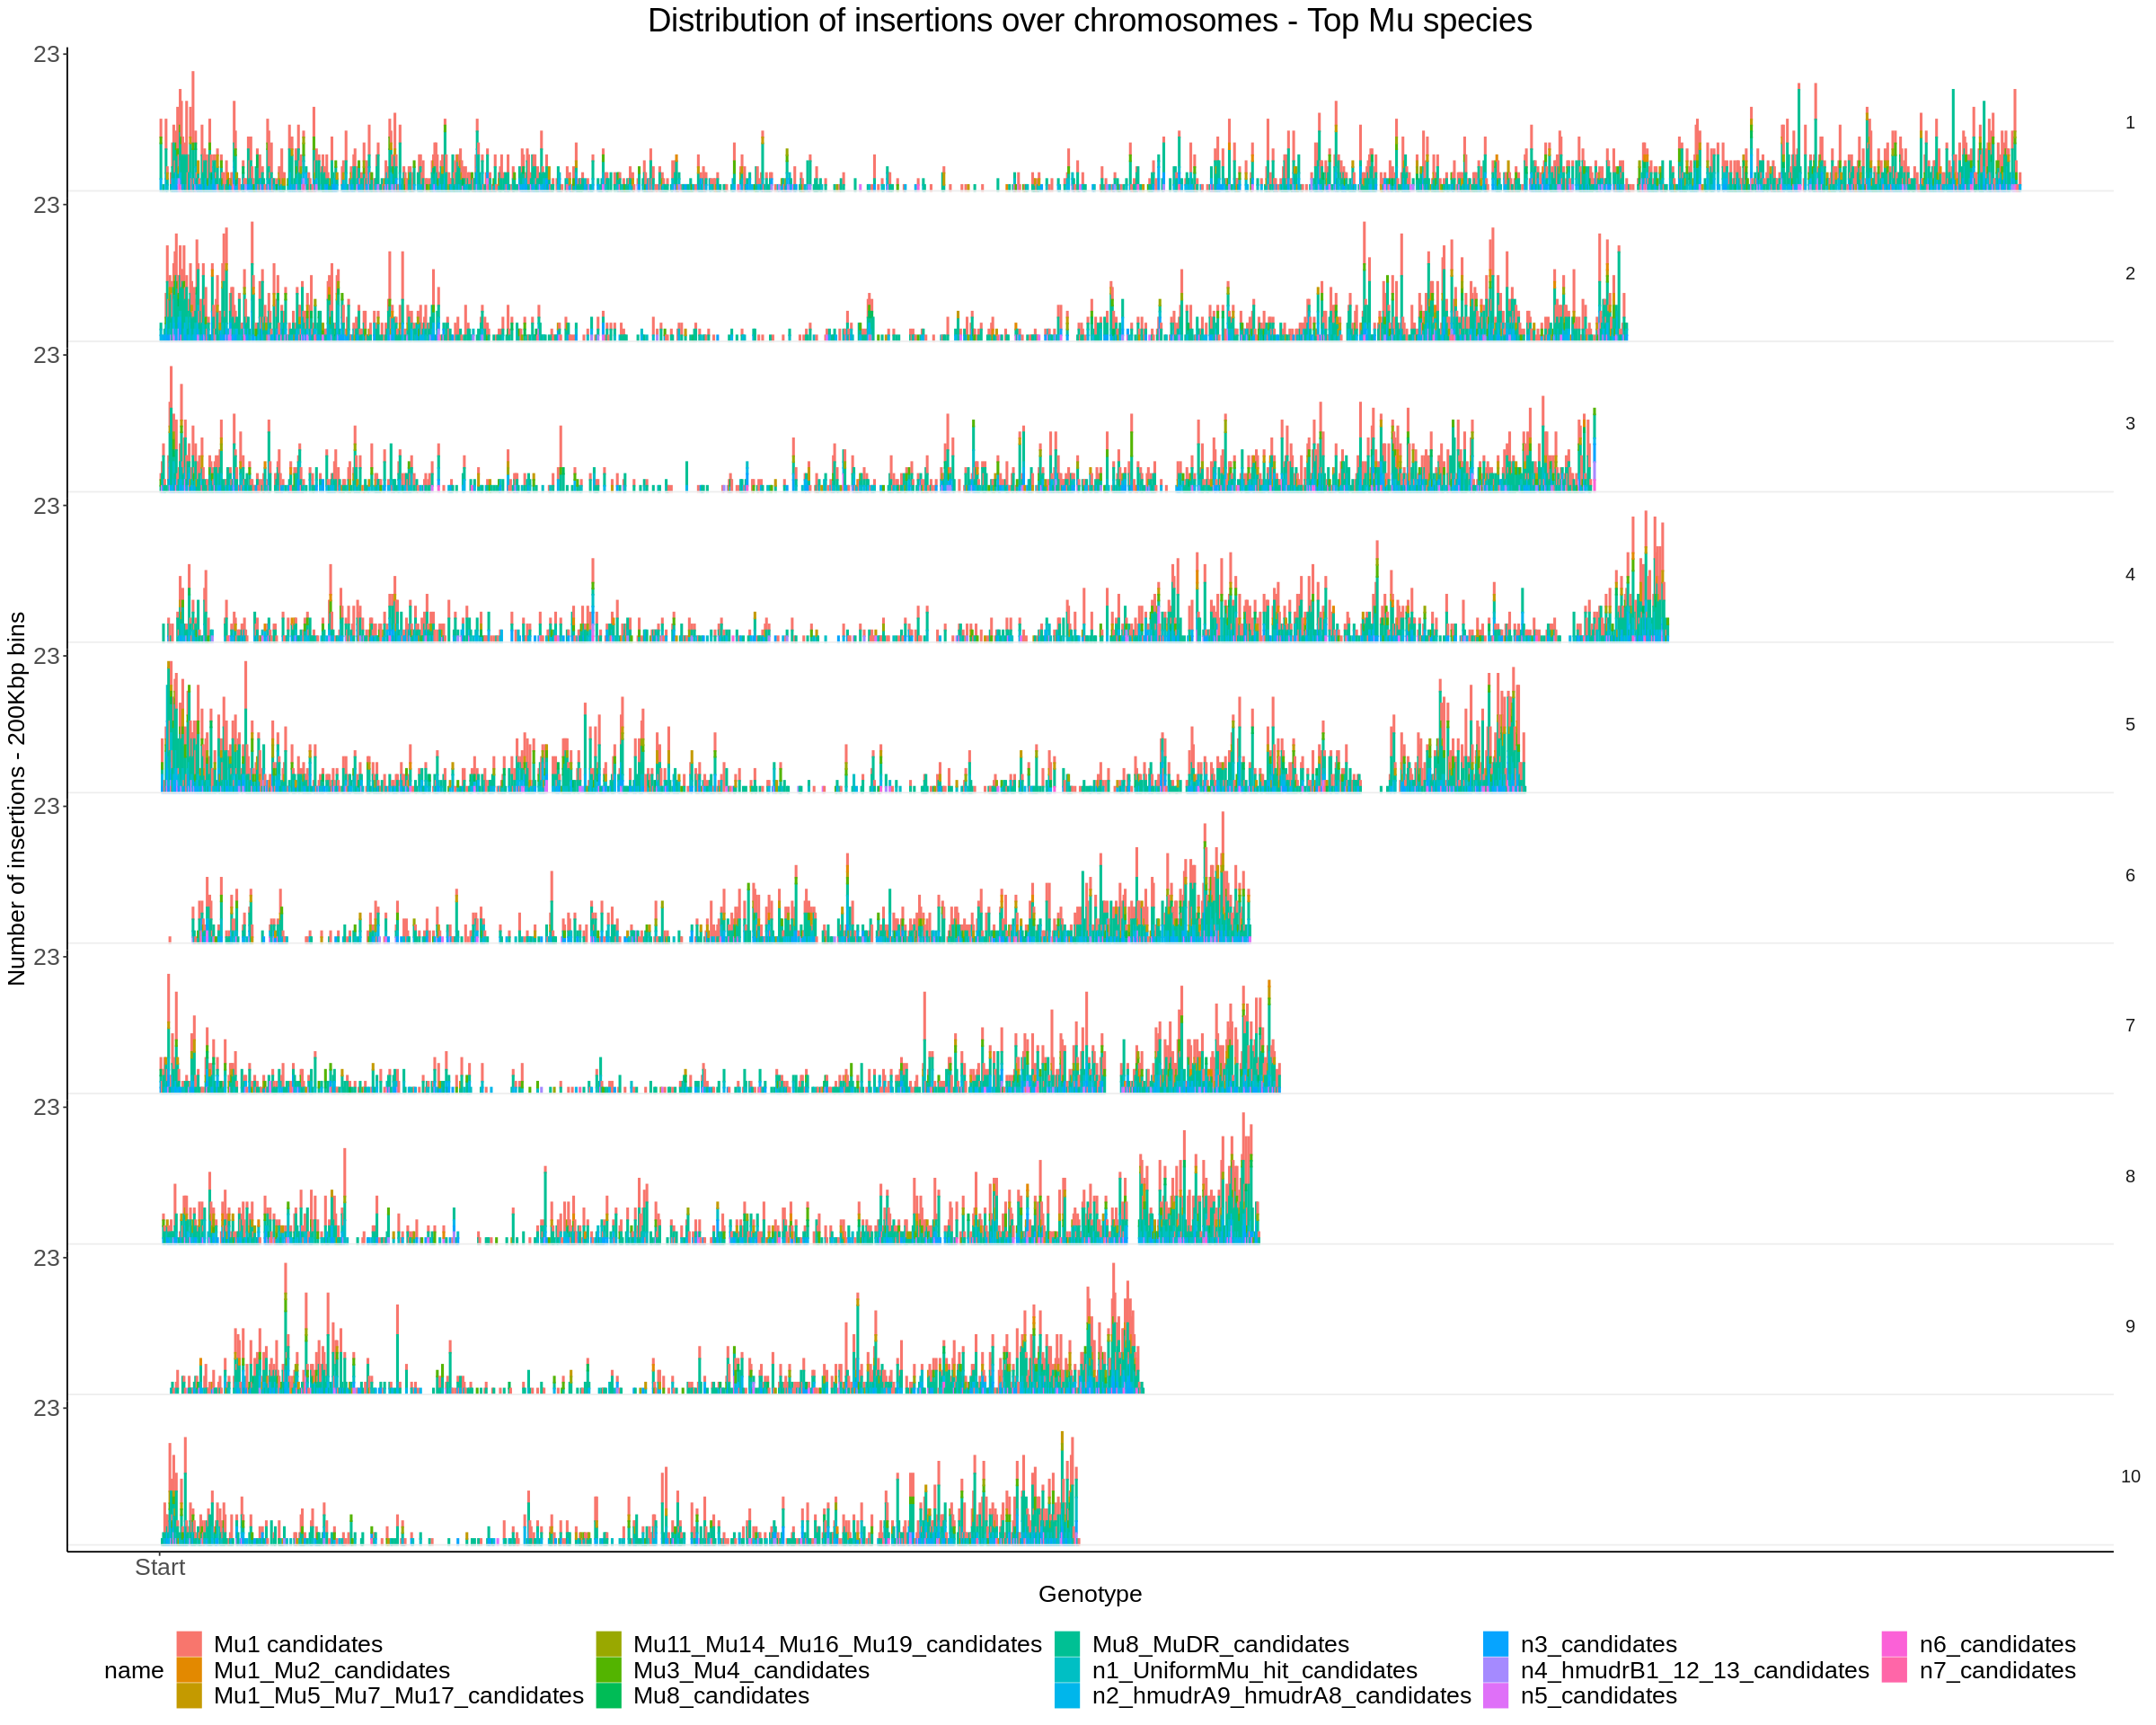

In [18]:
bins  = getGenomeBins(zea_mays_ChromSizes, binCount = 10000)

#we can remove all additional contiqs with this handy command
#?keepStandardChromosomes
bins = keepStandardChromosomes(bins, pruning.mode="coarse")


2182075994/10000

queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr, n1_UniformMu_hit_candidates_gr, n2_hmudrA9_hmudrA8_candidates_gr,
                        n3_candidates_gr, Mu1_Mu5_Mu7_Mu17_candidates_gr, Mu3_Mu4_candidates_gr, n4_hmudrB1_12_13_candidates_gr,
                        n5_candidates_gr, Mu8_candidates_gr, Mu11_Mu14_Mu16_Mu19_candidates_gr, Mu1_Mu2_candidates_gr, 
                        n6_candidates_gr, n7_candidates_gr)

names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates", "n1_UniformMu_hit_candidates", "n2_hmudrA9_hmudrA8_candidates", 
                      "n3_candidates", "Mu1_Mu5_Mu7_Mu17_candidates", "Mu3_Mu4_candidates", "n4_hmudrB1_12_13_candidates",
                      "n5_candidates", "Mu8_candidates", "Mu11_Mu14_Mu16_Mu19_candidates", "Mu1_Mu2_candidates", 
                      "n6_candidates", "n7_candidates")

#queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr)
#names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates")

x = calcChromBins(queryList, bins)
plotChromBins(x) +
  labs(x = "Genotype", 
       y = "Number of insertions - 200Kbp bins", 
       title = "Distribution of insertions over chromosomes - Top Mu species") +
  theme(plot.title = element_text(size=22), 
        legend.title = element_text(size=16),
        legend.text = element_text(size=16),
        axis.text.x = element_text(size=16),
        axis.text.y = element_text(size=16),
        text = element_text(size=16)
       )

##### Known species - big bins

[1] 2182076

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Warning message:
“Removed 42 rows containing missing values (geom_bar).”


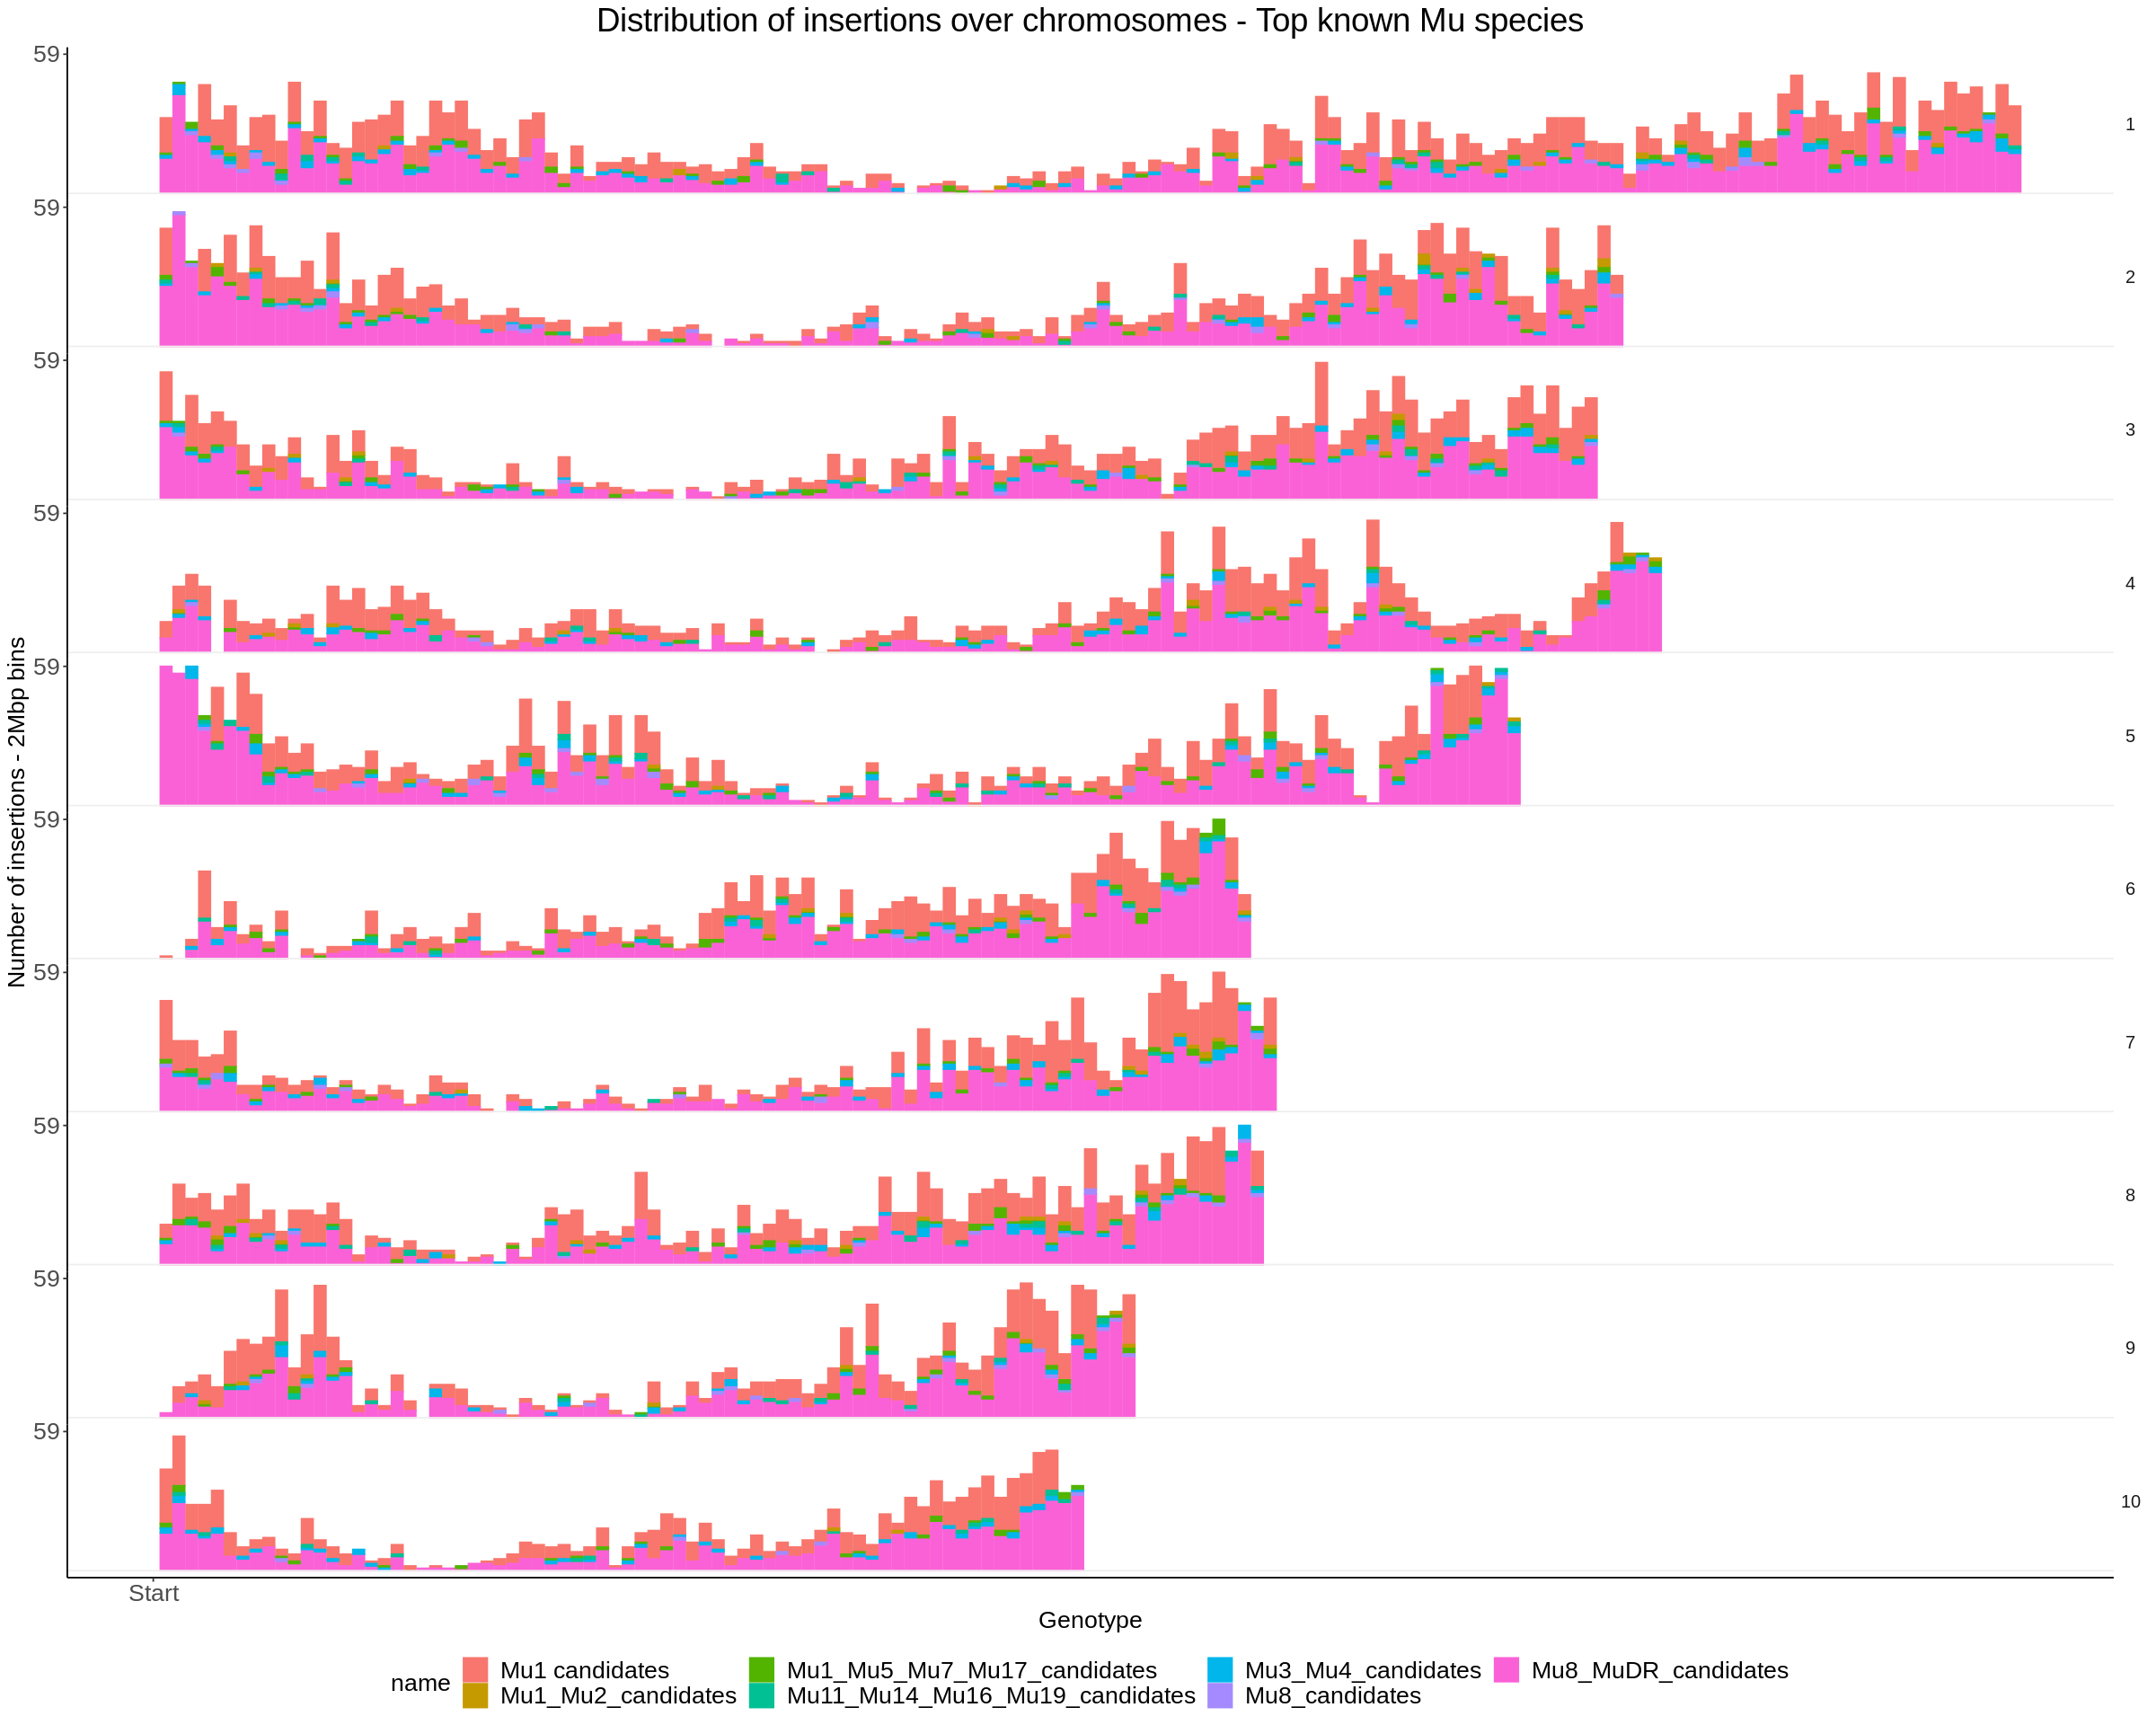

In [19]:
bins  = getGenomeBins(zea_mays_ChromSizes, binCount = 1000)

#we can remove all additional contiqs with this handy command
#?keepStandardChromosomes
bins = keepStandardChromosomes(bins, pruning.mode="coarse")


2182075994/1000

queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr, Mu1_Mu5_Mu7_Mu17_candidates_gr, Mu3_Mu4_candidates_gr,
                        Mu8_candidates_gr, Mu11_Mu14_Mu16_Mu19_candidates_gr, Mu1_Mu2_candidates_gr)

names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates", "Mu1_Mu5_Mu7_Mu17_candidates", "Mu3_Mu4_candidates",
                      "Mu8_candidates", "Mu11_Mu14_Mu16_Mu19_candidates", "Mu1_Mu2_candidates")

#queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr)
#names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates")

x = calcChromBins(queryList, bins)
plotChromBins(x) +
  labs(x = "Genotype", 
       y = "Number of insertions - 2Mbp bins", 
       title = "Distribution of insertions over chromosomes - Top known Mu species") +
  theme(plot.title = element_text(size=22), 
        legend.title = element_text(size=16),
        legend.text = element_text(size=16),
        axis.text.x = element_text(size=16),
        axis.text.y = element_text(size=16),
        text = element_text(size=16)
       )

##### Put. novel species - big bins

[1] 2182076

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Finding overlaps...

Setting regionIDs...

Combining...

Warning message:
“Removed 60 rows containing missing values (geom_bar).”


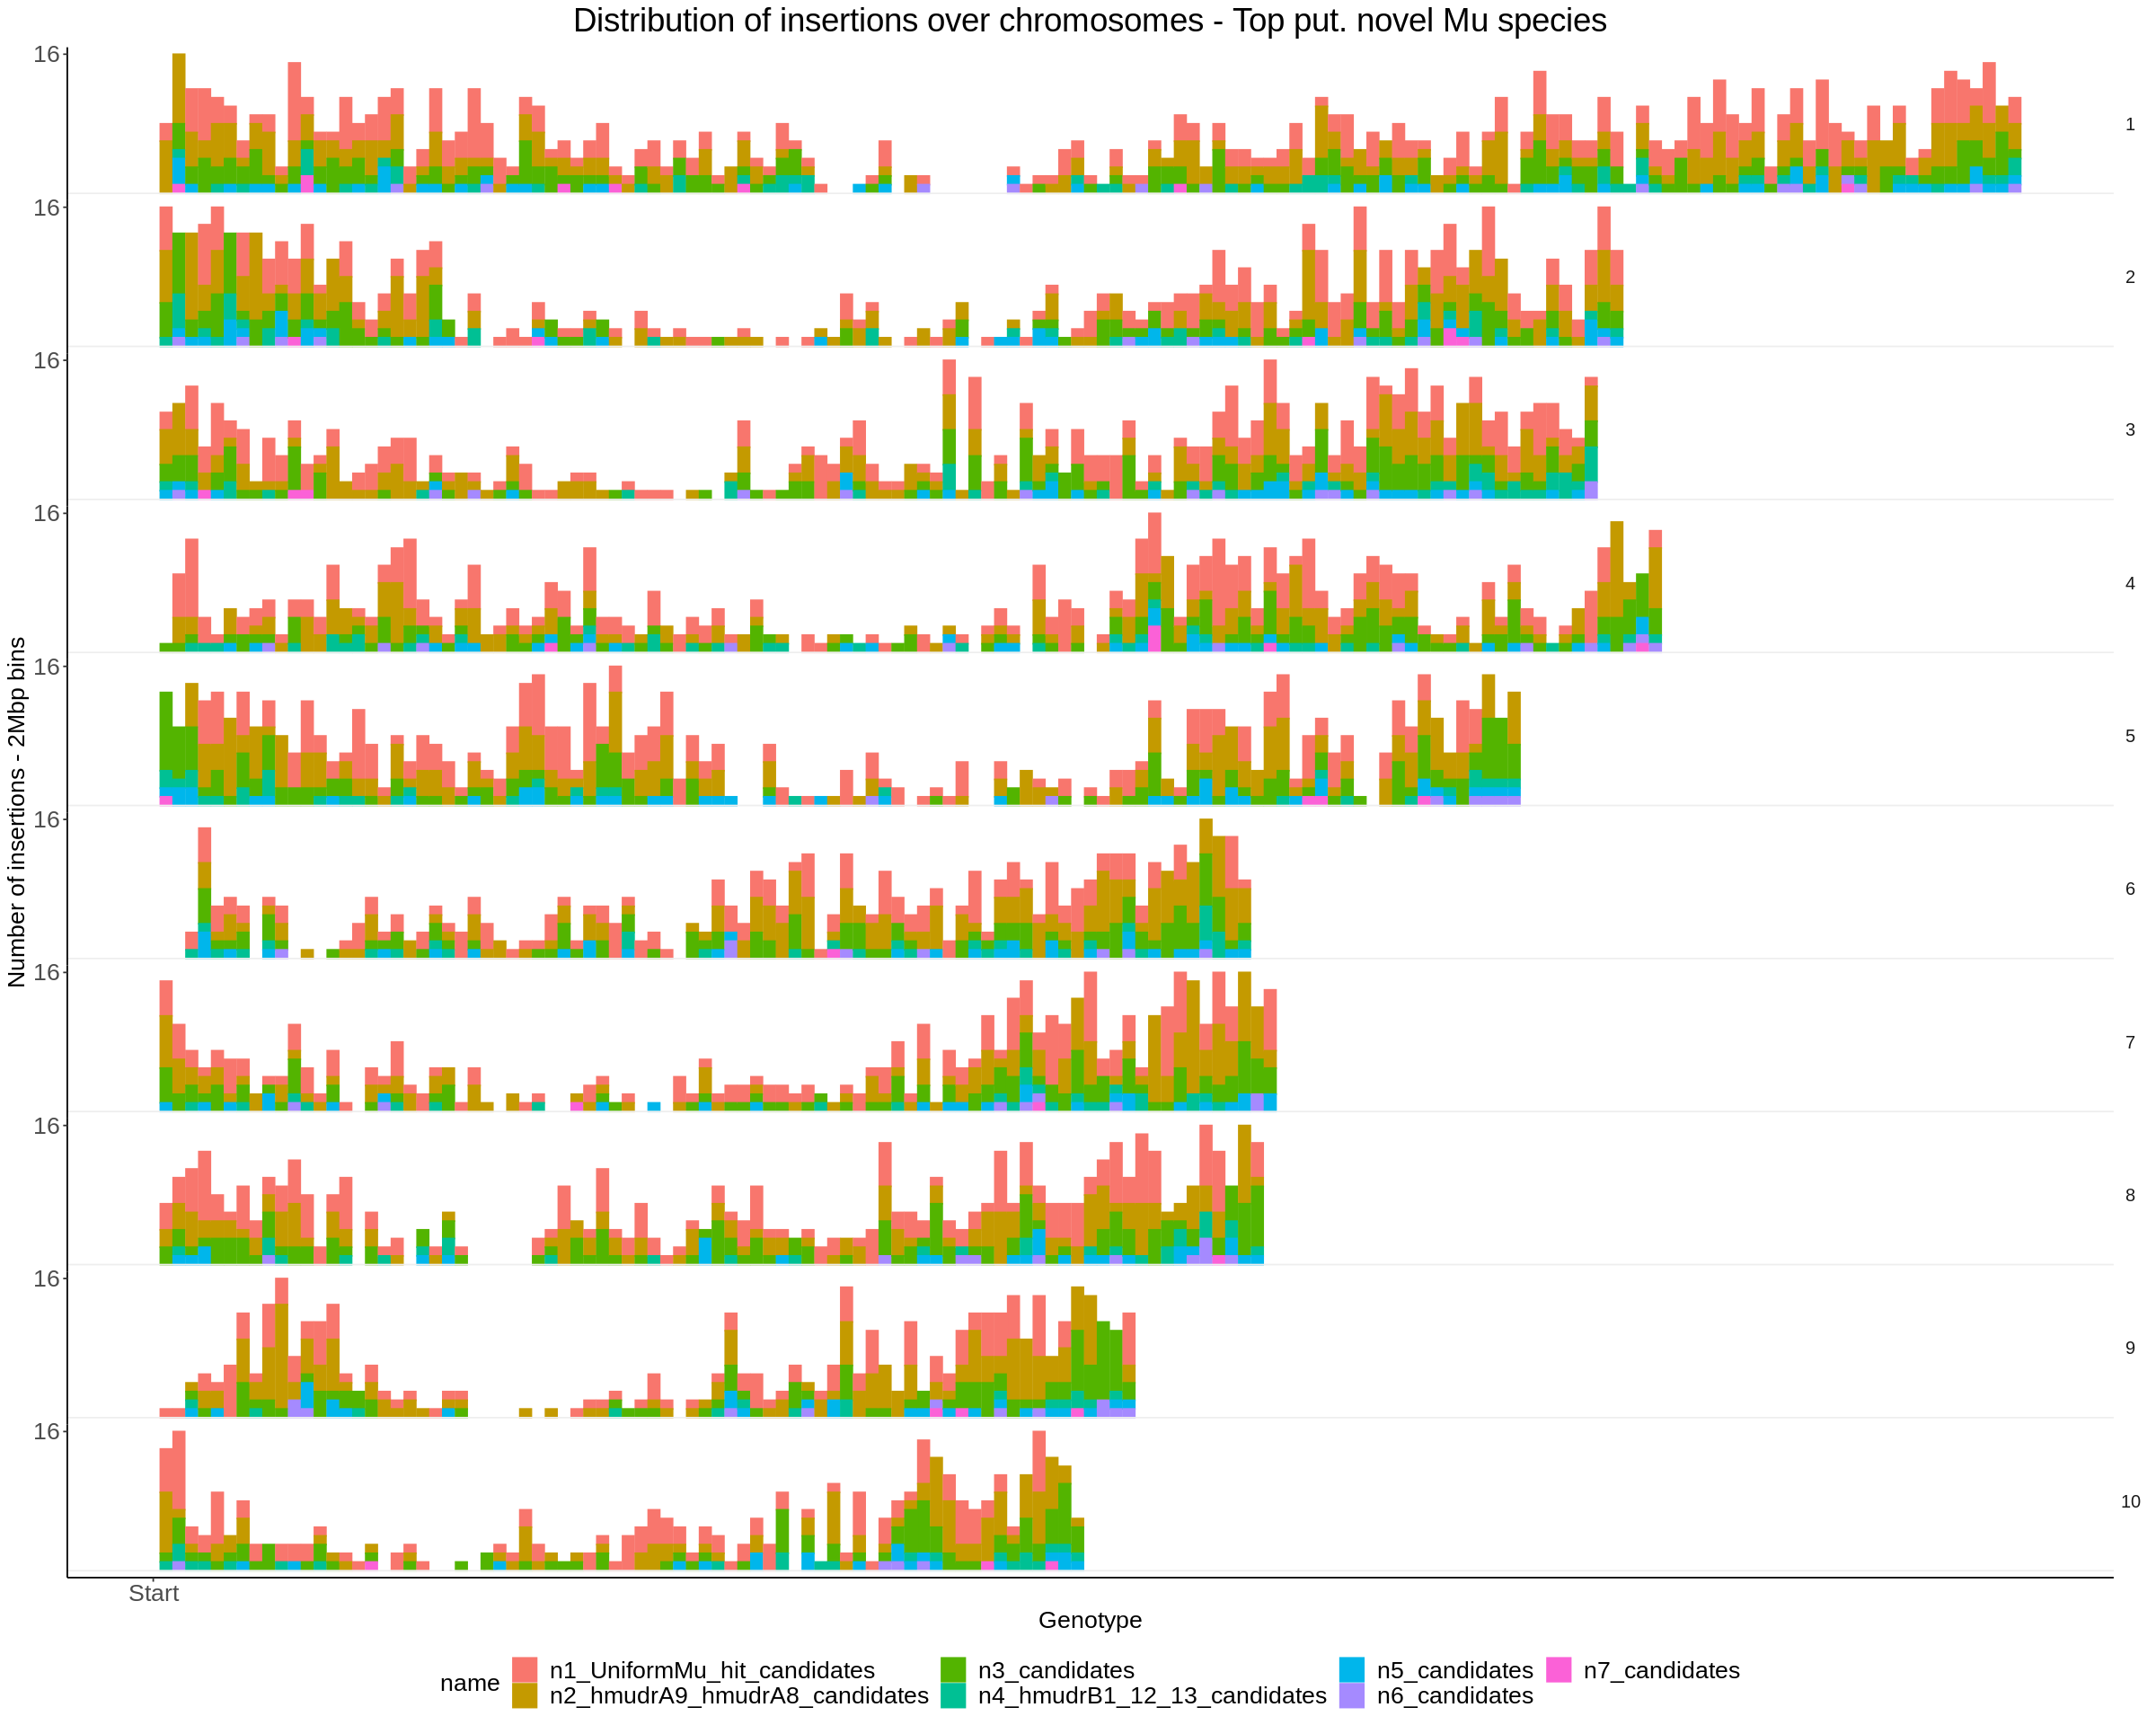

In [20]:
bins  = getGenomeBins(zea_mays_ChromSizes, binCount = 1000)

#we can remove all additional contiqs with this handy command
#?keepStandardChromosomes
bins = keepStandardChromosomes(bins, pruning.mode="coarse")


2182075994/1000

queryList = GRangesList(n1_UniformMu_hit_candidates_gr, n2_hmudrA9_hmudrA8_candidates_gr,
                        n3_candidates_gr, n4_hmudrB1_12_13_candidates_gr,
                        n5_candidates_gr, n6_candidates_gr, n7_candidates_gr)

names(queryList) <- c("n1_UniformMu_hit_candidates", "n2_hmudrA9_hmudrA8_candidates", 
                      "n3_candidates", "n4_hmudrB1_12_13_candidates",
                      "n5_candidates", "n6_candidates", "n7_candidates")

#queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr)
#names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates")

x = calcChromBins(queryList, bins)
plotChromBins(x) +
  labs(x = "Genotype", 
       y = "Number of insertions - 2Mbp bins", 
       title = "Distribution of insertions over chromosomes - Top put. novel Mu species") +
  theme(plot.title = element_text(size=22), 
        legend.title = element_text(size=16),
        legend.text = element_text(size=16),
        axis.text.x = element_text(size=16),
        axis.text.y = element_text(size=16),
        text = element_text(size=16)
       )

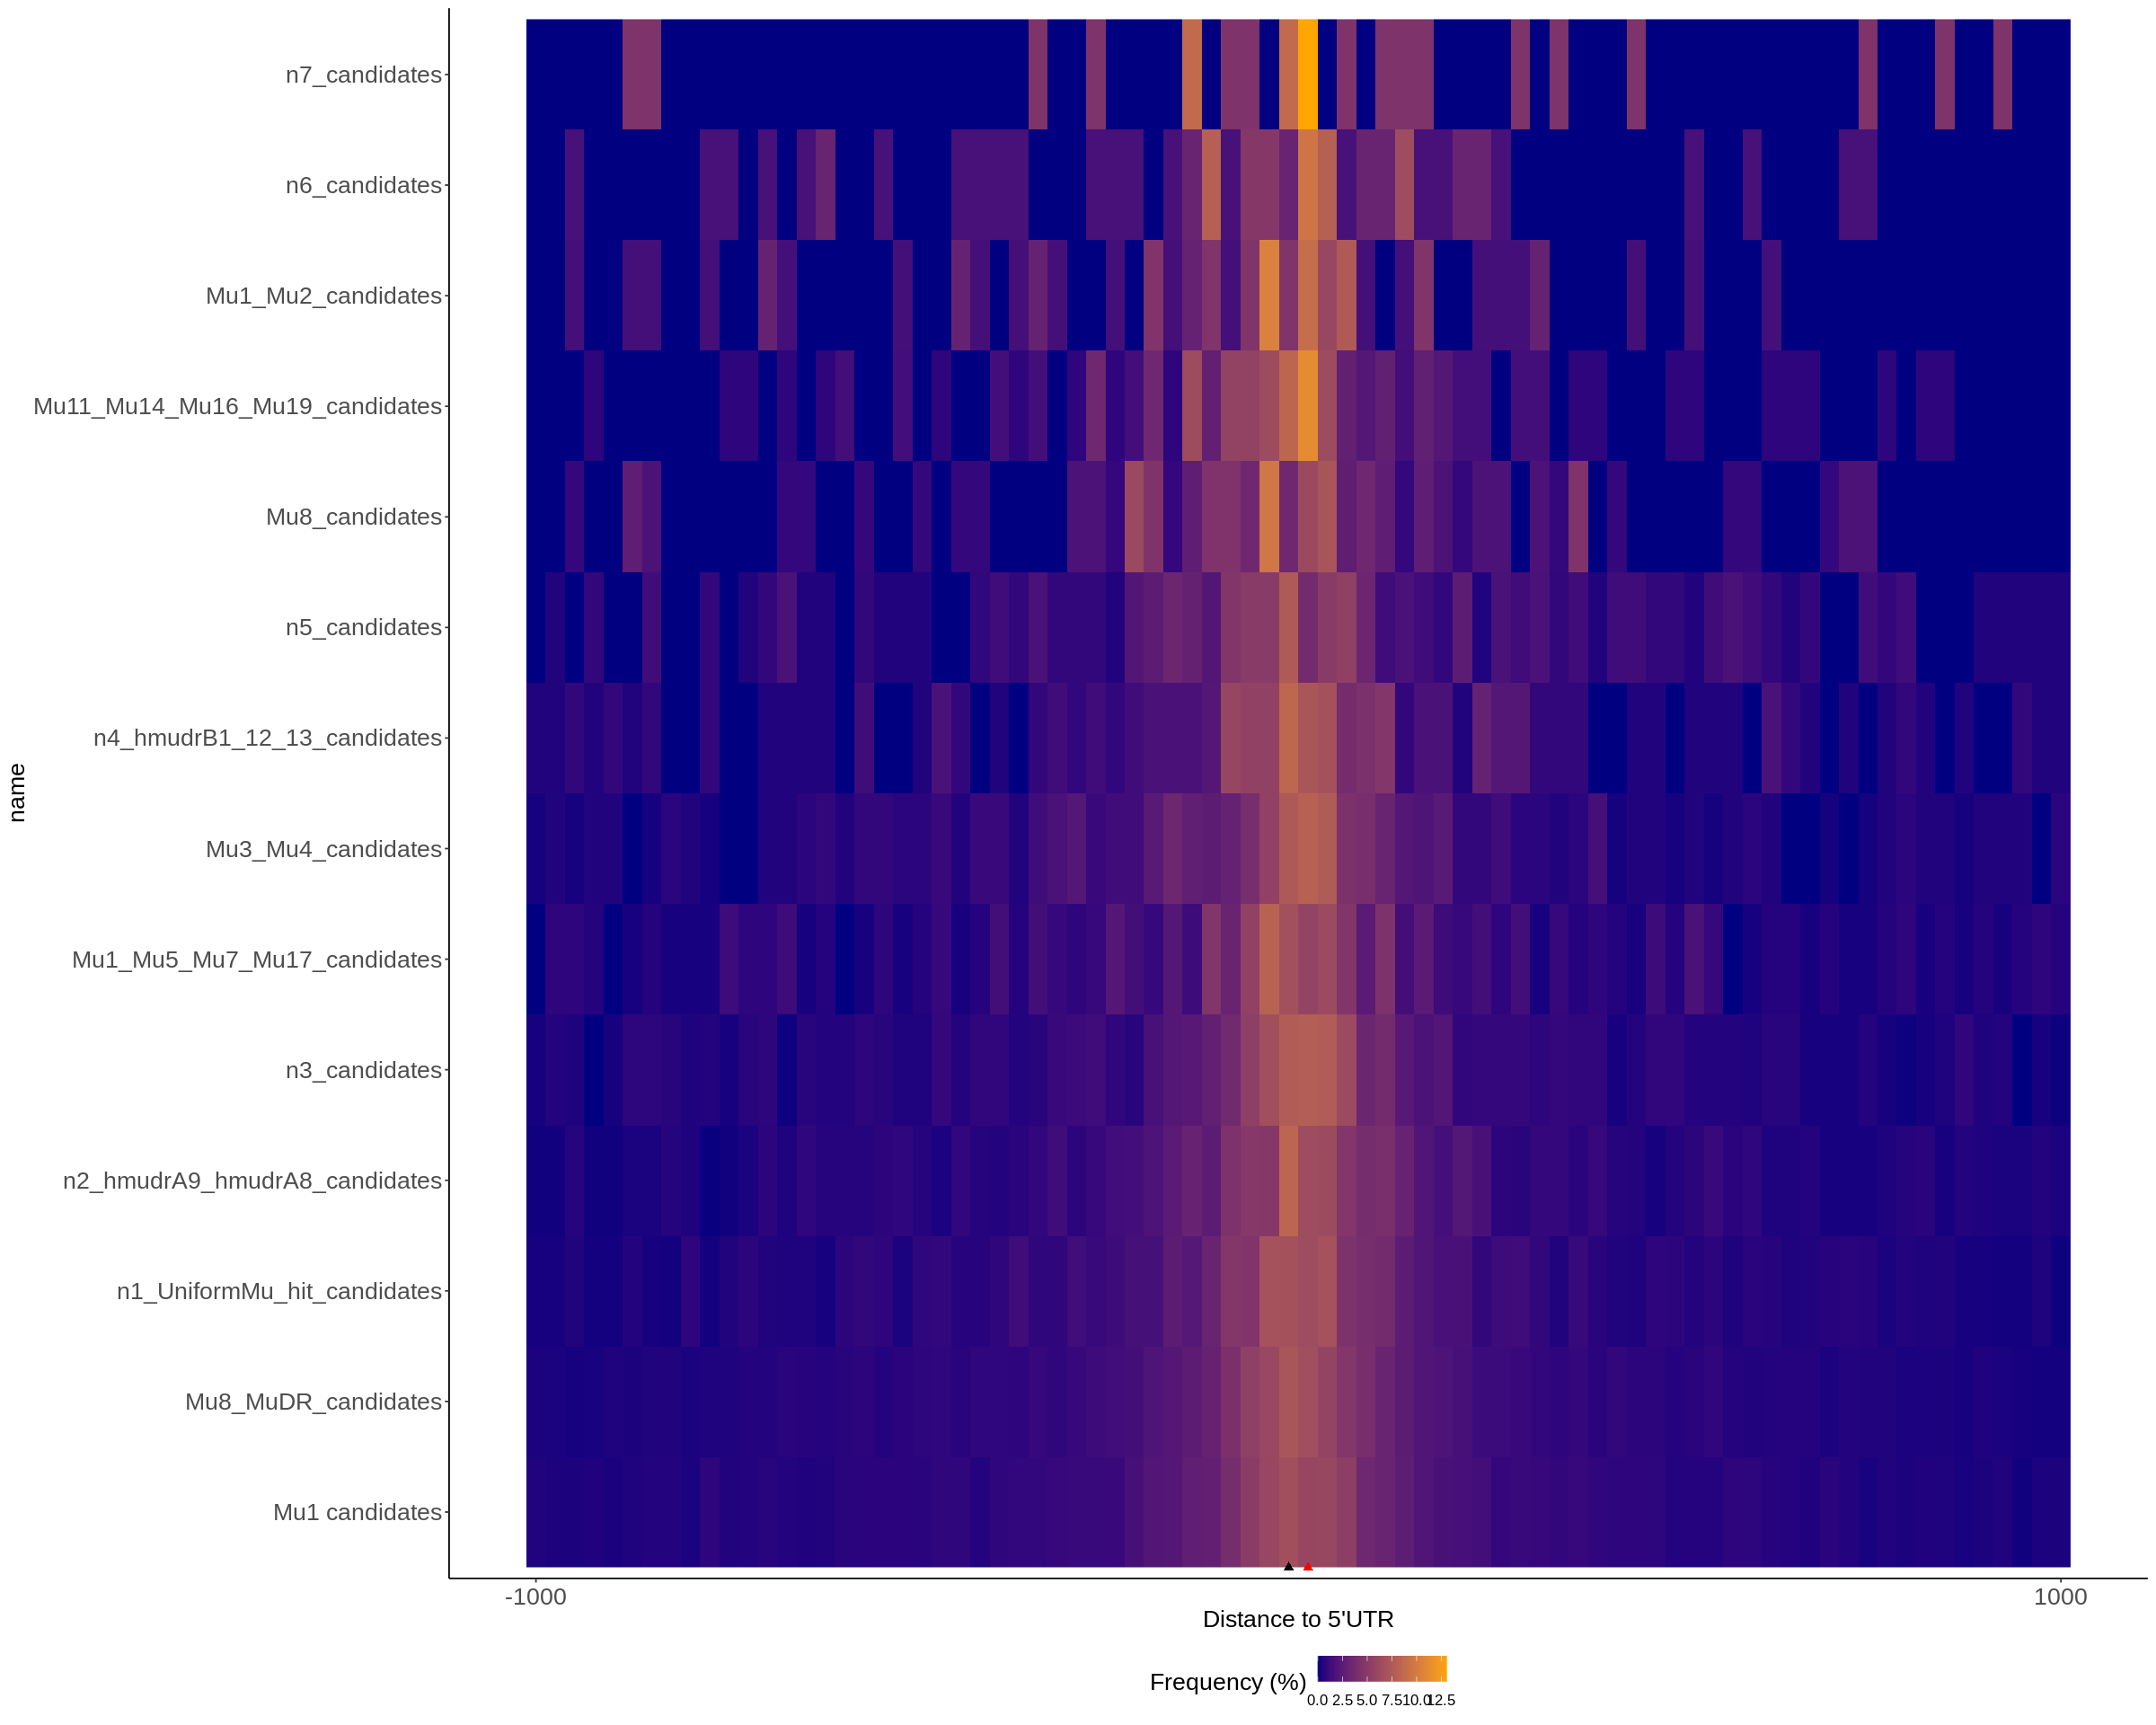

In [23]:
#run helper function (bottom of notebook) for inversion first!

queryList = GRangesList(Mu1_candidates_gr, Mu8_MuDR_candidates_gr, n1_UniformMu_hit_candidates_gr, n2_hmudrA9_hmudrA8_candidates_gr,
                        n3_candidates_gr, Mu1_Mu5_Mu7_Mu17_candidates_gr, Mu3_Mu4_candidates_gr, n4_hmudrB1_12_13_candidates_gr,
                        n5_candidates_gr, Mu8_candidates_gr, Mu11_Mu14_Mu16_Mu19_candidates_gr, Mu1_Mu2_candidates_gr, 
                        n6_candidates_gr, n7_candidates_gr)

names(queryList) <- c("Mu1 candidates", "Mu8_MuDR_candidates", "n1_UniformMu_hit_candidates", "n2_hmudrA9_hmudrA8_candidates", 
                      "n3_candidates", "Mu1_Mu5_Mu7_Mu17_candidates", "Mu3_Mu4_candidates", "n4_hmudrB1_12_13_candidates",
                      "n5_candidates", "Mu8_candidates", "Mu11_Mu14_Mu16_Mu19_candidates", "Mu1_Mu2_candidates", 
                      "n6_candidates", "n7_candidates")

#featureDist
nbins=40

GeneDist = calcFeatureDist(query = queryList, features = partitionList$fiveUTR)
GeneDist <- lapply(GeneDist, FUN = quick_invert)
# Then plot the result:
plotFeatureDist(GeneDist, featureName="5'UTR", size = 1e3, nbins = nbins, tile = TRUE, labelOrder = "default") +
  geom_point(aes(x=nbins+1, y=0.5), color="red", 
                   size=2, shape=17, alpha=0.8) +
  theme(plot.title = element_text(size=22), 
        legend.title = element_text(size=16),
        legend.text = element_text(size=10),
        axis.text.x = element_text(size=16),
        axis.text.y = element_text(size=16),
        text = element_text(size=16)
       )

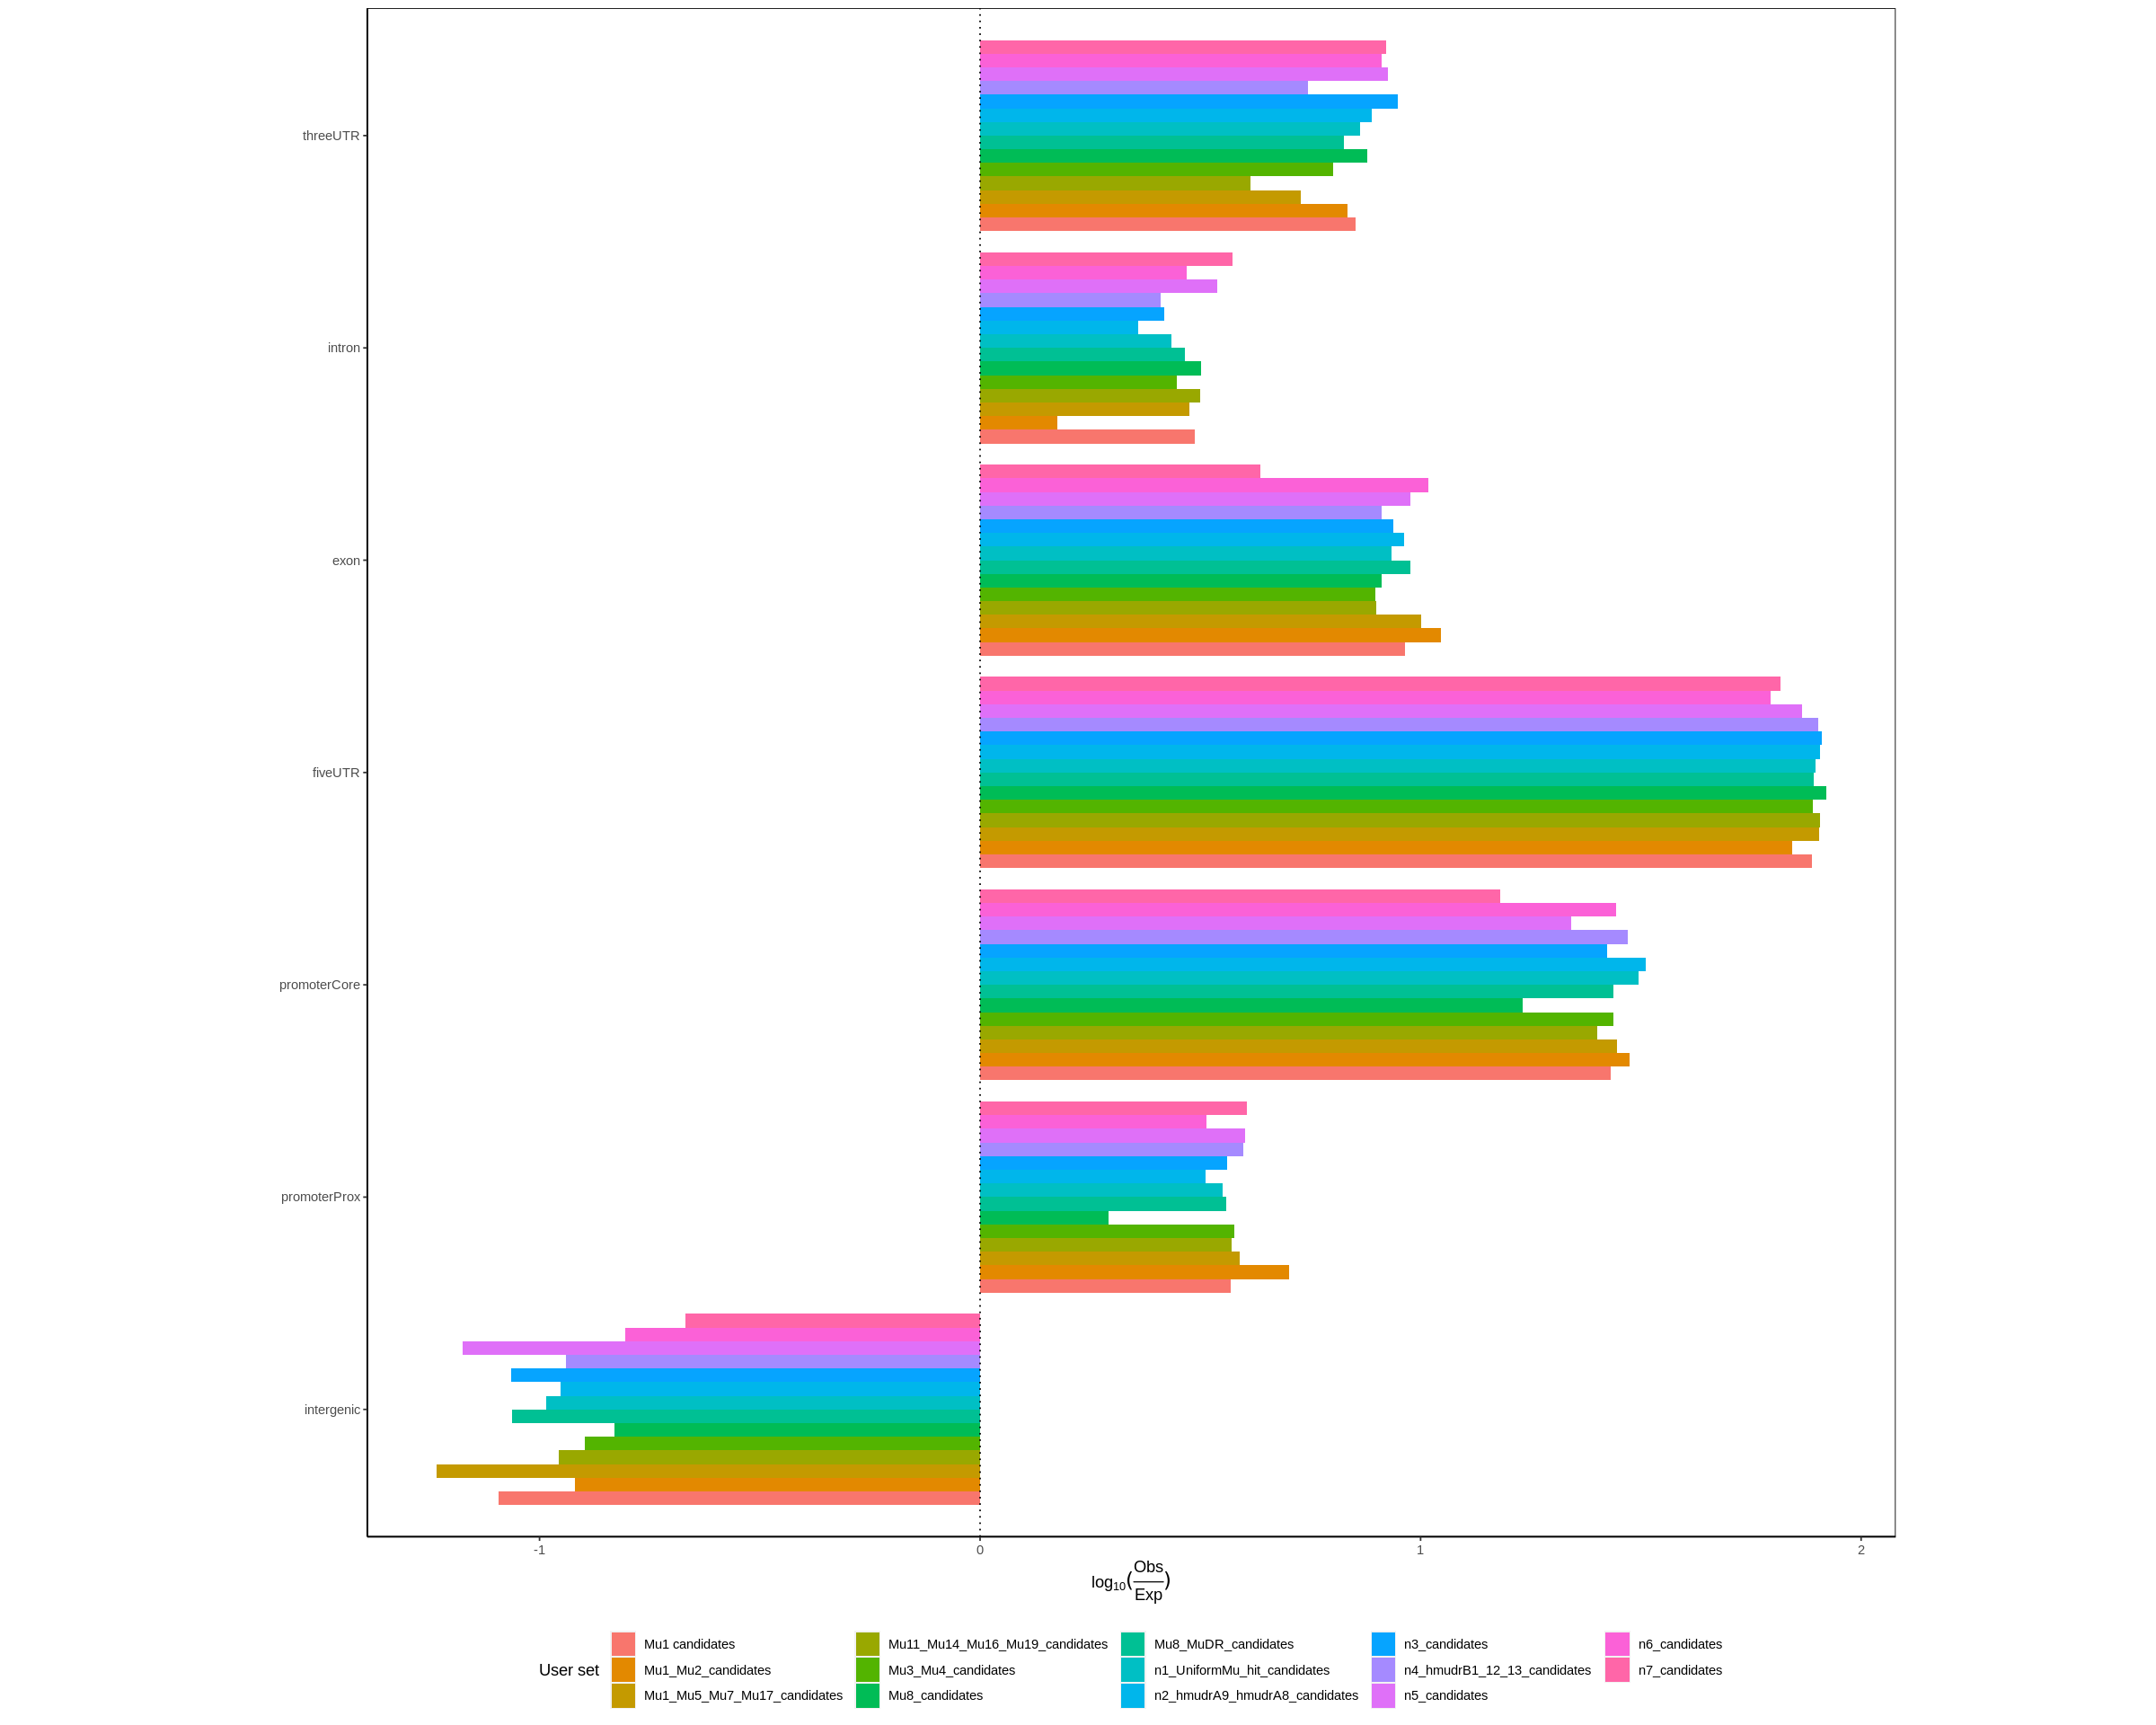

In [30]:
#make a queryList with all somatic vs. all germinal

gp = calcPartitions(queryList, partitionList)
#plotPartitions(gp, stacked = TRUE)

gp = calcExpectedPartitions(queryList, partitionList, genomeSize = 2182075994, remainder = TRUE, bpProportion = TRUE)

gp <- gp %>%
  mutate(partition = str_replace(partition, "TRUE", "intergenic"))

my_order <- c("intergenic", "promoterProx", "promoterCore", "fiveUTR", "exon", "intron", "threeUTR")
gp$partition <- factor(gp$partition, levels = my_order)

plotExpectedPartitions(gp)

In [279]:
gp %>%
  filter(name == "n7_candidates")

partition,observed,expected,log10OE,name
<fct>,<dbl>,<dbl>,<dbl>,<chr>
promoterCore,9,0.5930459,1.1811542,n7_candidates
promoterProx,45,11.1324999,0.6066198,n7_candidates
threeUTR,18,2.1577099,0.9212794,n7_candidates
fiveUTR,108,1.6438197,1.8175696,n7_candidates
exon,27,6.2287260,0.6369645,n7_candidates
intron,63,16.8247605,0.5733917,n7_candidates
NA,63,294.4194381,-0.6696259,n7_candidates


In [235]:
queryList

GRangesList object of length 14:
$`Mu1 candidates`
GRanges object with 7038 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]        1 169896445-169896453      *
     [2]        6 175308412-175308420      *
     [3]        6 172219092-172219100      *
     [4]       10     6826379-6826387      *
     [5]        3   66472682-66472690      *
     ...      ...                 ...    ...
  [7034]        4 175093230-175093238      *
  [7035]       10 138435388-138435396      *
  [7036]        1 205874844-205874852      *
  [7037]        5 204155201-204155209      *
  [7038]        6   12095583-12095591      *
  -------
  seqinfo: 30 sequences from an unspecified genome; no seqlengths

...
<13 more elements>

### Playing around with the clustering results

In [31]:
#B73
final_clstr_Museq_B73_1 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_1/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_2 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_2/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_3 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_3/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_4 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_4/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_5 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_5/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_6 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_6/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_7 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_7/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_B73_8 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_8/MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
#F7 (B73 mapped
final_clstr_Museq_F7_1 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-1//MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_F7_2 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-2//MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_F7_3 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-3//MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")
final_clstr_Museq_F7_4 <- read.delim("/data/home/stoecker/fdi_genofam_mount/stoecker/TE_typing_Mu/Museq_B73_F7-4//MuWU/only_known_Mu_results/te_typing/uncategorized_clustered/final_clstr_file_germinal_identified_insertions.tsv", sep="\t")



final_cluster_list <- list(
 "final_clstr_Museq_B73_1" = final_clstr_Museq_B73_1,
 "final_clstr_Museq_B73_2" = final_clstr_Museq_B73_2,
 "final_clstr_Museq_B73_3" = final_clstr_Museq_B73_3,
 "final_clstr_Museq_B73_4" = final_clstr_Museq_B73_4,
 "final_clstr_Museq_B73_5" = final_clstr_Museq_B73_5,
 "final_clstr_Museq_B73_6" = final_clstr_Museq_B73_6,
 "final_clstr_Museq_B73_7" = final_clstr_Museq_B73_7,
 "final_clstr_Museq_B73_8" = final_clstr_Museq_B73_8,
 "final_clstr_Museq_F7_1" = final_clstr_Museq_F7_1,
 "final_clstr_Museq_F7_2" = final_clstr_Museq_F7_2,
 "final_clstr_Museq_F7_3" = final_clstr_Museq_F7_3,
 "final_clstr_Museq_F7_4" = final_clstr_Museq_F7_4
)


final_clusters_reheadering <- function(my_list) {
  names(my_list) <- c("rep_read", "freq", "motif")
  my_list
}

#invisible(
final_cluster_list <- lapply(final_cluster_list, FUN = final_clusters_reheadering)
#)

In [32]:
#B73
all_B73_final_clstrs <- bind_rows(
  final_cluster_list[[1]][, c("freq", "motif")],
  final_cluster_list[[2]][, c("freq", "motif")],
  #no [[3]] 
  final_cluster_list[[4]][, c("freq", "motif")],
  final_cluster_list[[5]][, c("freq", "motif")],
  final_cluster_list[[6]][, c("freq", "motif")],
  final_cluster_list[[7]][, c("freq", "motif")],
  final_cluster_list[[8]][, c("freq", "motif")]
) %>%
  group_by(motif) %>%
  summarize(freq=sum(freq)) %>%
  arrange(desc(freq))

head(all_B73_final_clstrs, n=10)

#F7
all_F7_final_clstrs <- bind_rows(
  final_cluster_list[[9]][, c("freq", "motif")],
  final_cluster_list[[10]][, c("freq", "motif")],
  final_cluster_list[[11]][, c("freq", "motif")],
  final_cluster_list[[12]][, c("freq", "motif")]
) %>%
  group_by(motif) %>%
  summarize(freq=sum(freq)) %>%
  arrange(desc(freq))

head(all_F7_final_clstrs, n=10)

motif,freq
<chr>,<int>
CTCTCTTCGTCTATAATGGCAATTATCTC,17169
CGCTCTTCTTCTATAATGGCAATTATCTC,16847
CCCTCTTCGTCTATAATGGCAATTATCTC,15730
CGCTCTTCTTCCATAATGGCAATTATCTC,14826
CCCTCTTCTTCTATAATGGCAATTATCTC,9750
CGCTCTTCGTCCATAATGGCAATTATCTC,9409
CCCTCTTCTTCCATAATGGCAATTATCTC,7850
CGCTCTTCGTCTATAATGGCAATTGTCTC,363
CTCTCTTCGTCTATAATGGCAATTGTCTC,335


motif,freq
<chr>,<int>
CGCTCTTCTTCTATAATGGCAATTATCTC,14914
CGCTCTTCGTCCATAATGGCAATTATCTC,12482
CCCTCTTCGTCTATAATGGCAATTATCTC,11168
CGCTCTTCTTCCATAATGGCAATTATCTC,10529
CCCTCTTCTTCTATAATGGCAATTATCTC,8587
CCCTCTTCTTCCATAATGGCAATTATCTC,5990
CTCTCTTCGTCTATAATGGCAATTATCTC,2585
CGCTCTTCGTCTATAATGGCAATTATCTT,563
CGCTCTTCGTCTATAATGGCAATTATCTG,511


In [33]:
#B73
total_uncategorized_reads <- sum(all_B73_final_clstrs$freq)
#total_uncategorized_reads
#mil_perc <- total_uncategorized_reads/100

set <- all_B73_final_clstrs %>%
  filter(freq > 100)

total_uncategorized_reads <- sum(set$freq)

top_7_motifs <- sum(set$freq[1:7])

total_uncategorized_reads
top_7_motifs

round(
  (top_7_motifs/total_uncategorized_reads)*100,
  digits = 2
)

[1] 97520

[1] 91581

[1] 93.91

In [34]:
#F7
total_uncategorized_reads <- sum(all_F7_final_clstrs$freq)
#total_uncategorized_reads
#mil_perc <- total_uncategorized_reads/1000

set <- all_F7_final_clstrs %>%
  filter(freq > 100)

total_uncategorized_reads <- sum(set$freq)

top_7_motifs <- sum(all_F7_final_clstrs$freq[1:7])

total_uncategorized_reads
top_7_motifs

round(
  (top_7_motifs/total_uncategorized_reads)*100,
  digits = 2  
)

[1] 79563

[1] 66255

[1] 83.27

In [35]:
all_B73_final_clstrs <- all_B73_final_clstrs %>% mutate(lib = "B73")
all_F7_final_clstrs <- all_F7_final_clstrs %>% mutate(lib = "F7")


#manual ordering of factors so we can have the plot be ordered by B73 freqs only 
merged_final_clstrs <- bind_rows(all_B73_final_clstrs, all_F7_final_clstrs)
merged_final_clstrs$lib <- as.factor(merged_final_clstrs$lib)
merged_final_clstrs$motif <- factor(merged_final_clstrs$motif, levels = rev(all_B73_final_clstrs$motif))

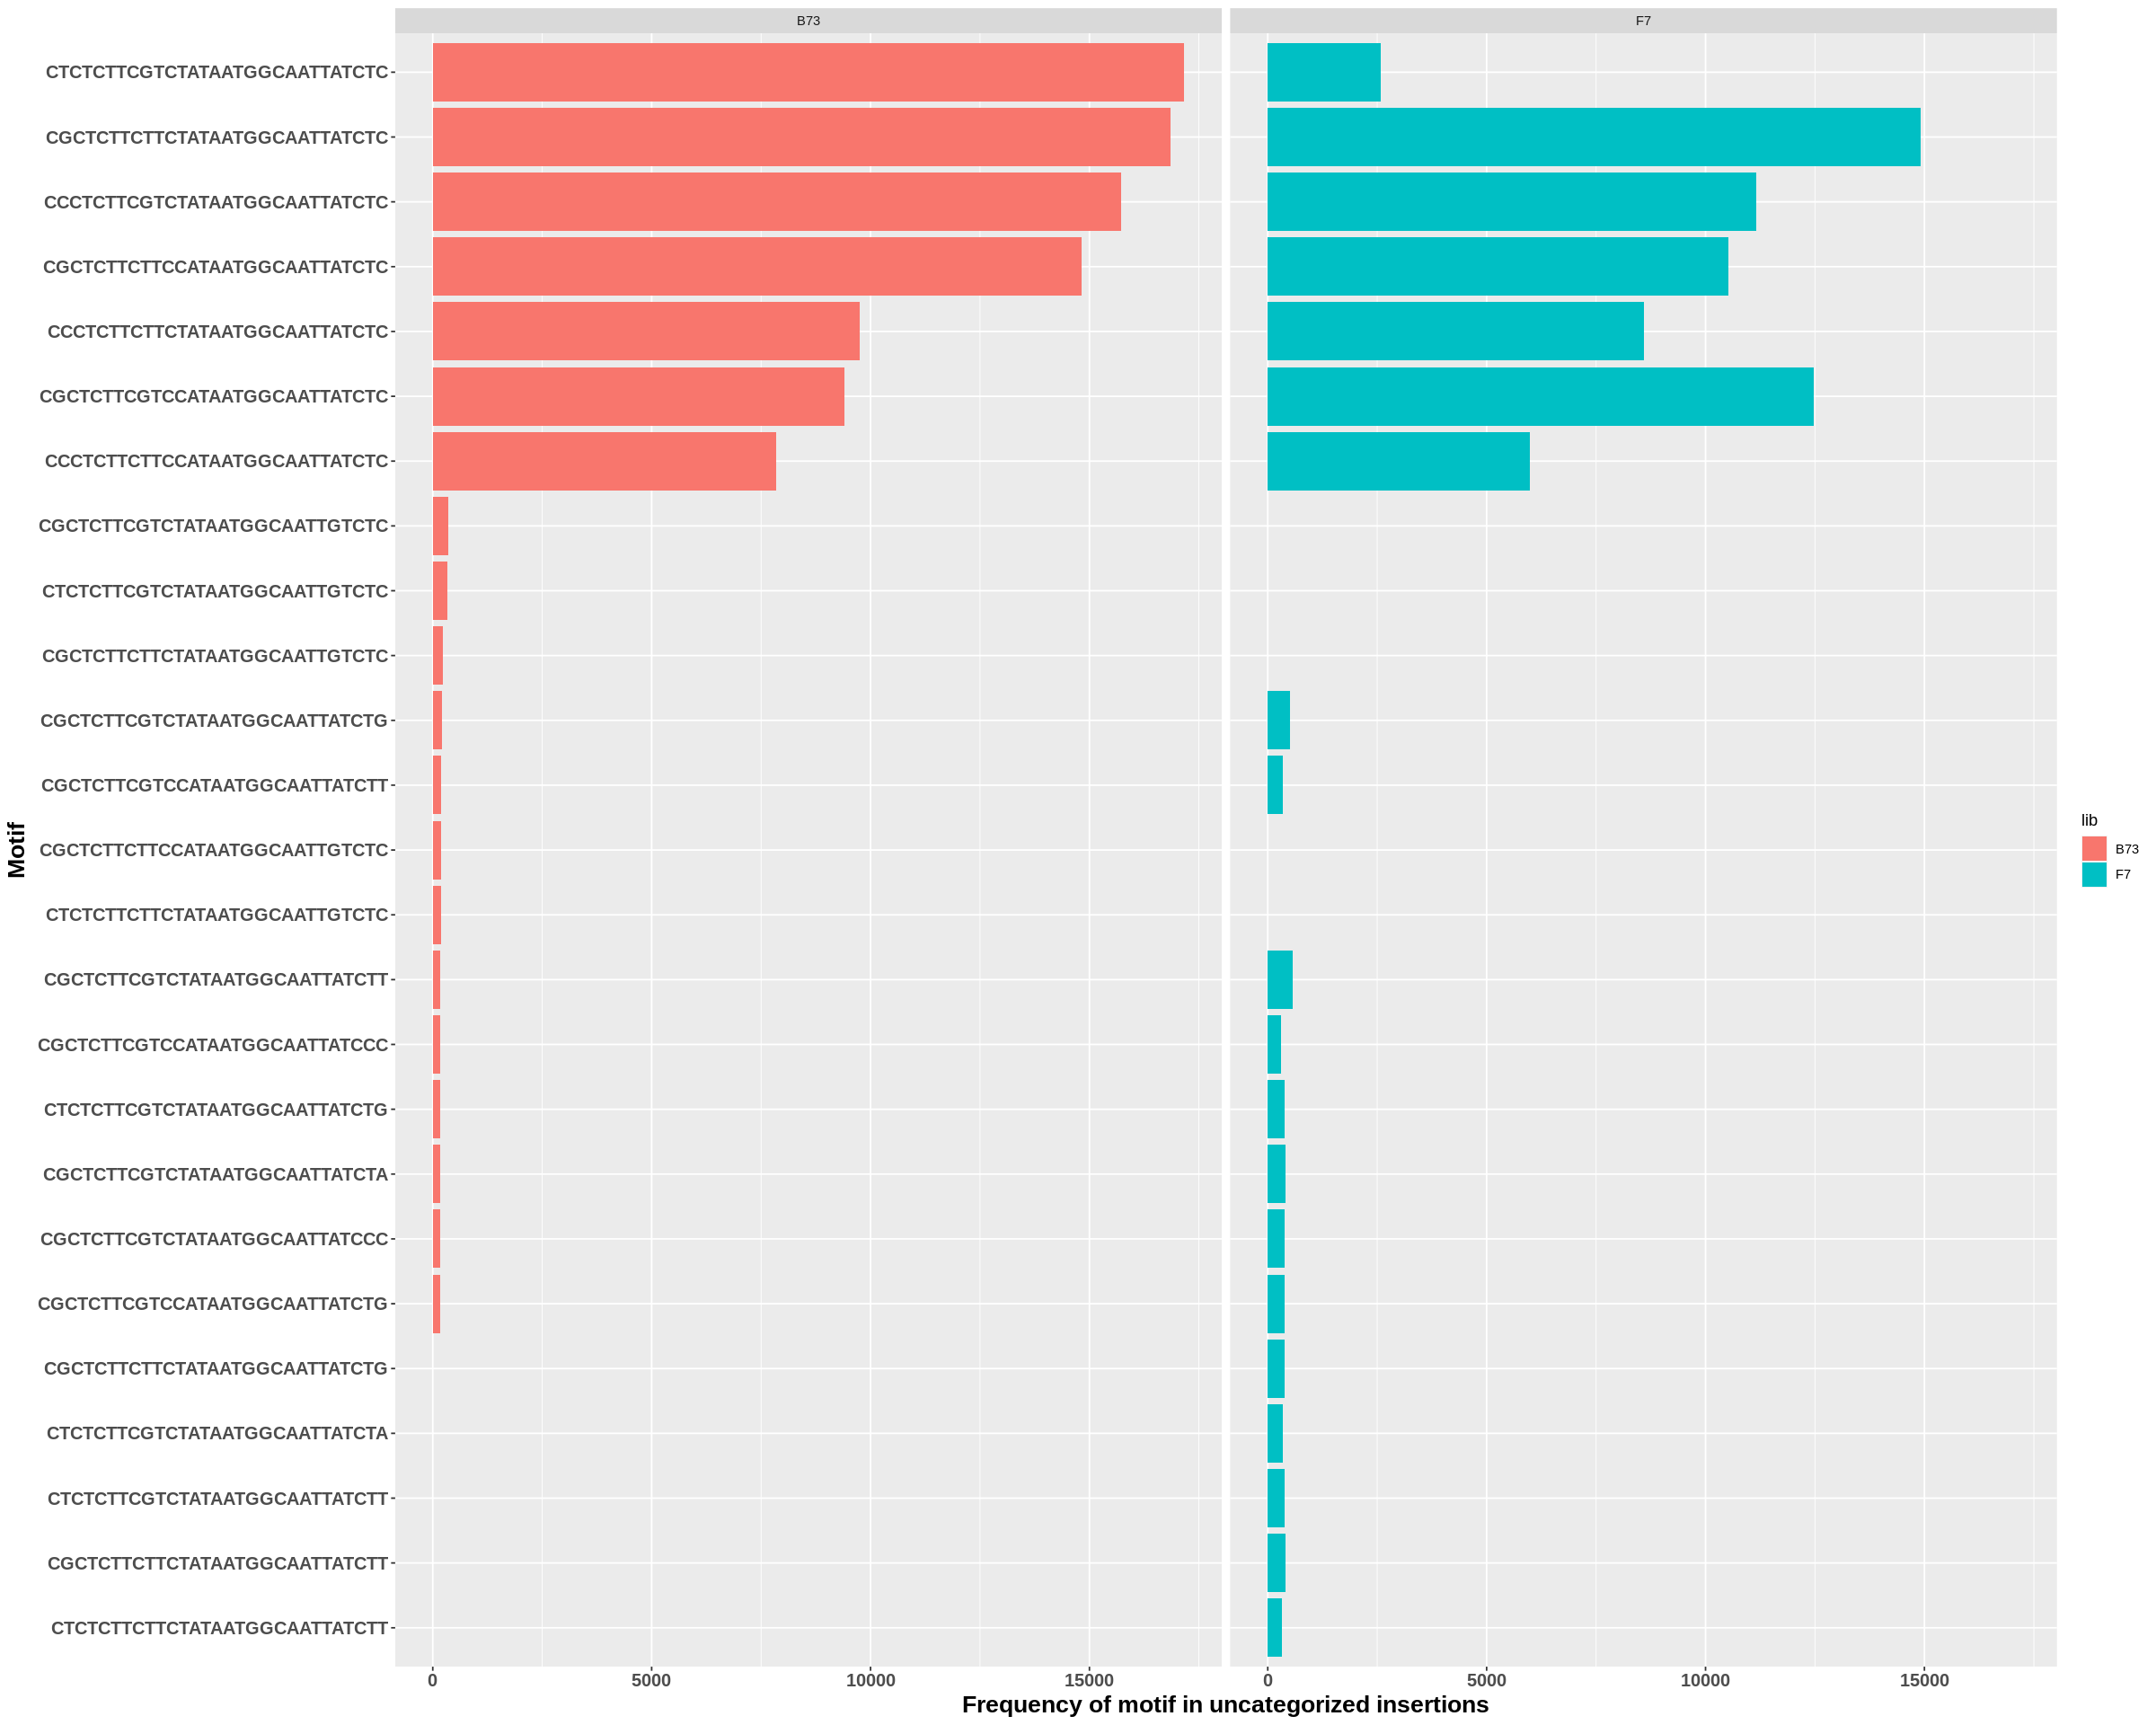

In [36]:
merged_final_clstrs %>%
  group_by(lib) %>%
  dplyr::slice(1:20) %>%
#  head(n=20) %>%
#  ungroup() %>%
#  arrange(desc(freq)) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
#  ggplot(., aes(y= reorder(motif, freq), x=freq, fill = lib)) +
  ggplot(., aes(y= motif, x=freq, fill = lib)) +
#    geom_col(fill = "darkblue") +
    geom_col() +
    xlab("Frequency of motif in uncategorized insertions") +
    ylab("Motif") +
    theme(axis.text=element_text(size=12, face="bold"),
          axis.title=element_text(size=16,face="bold")) +
    facet_wrap(~lib)

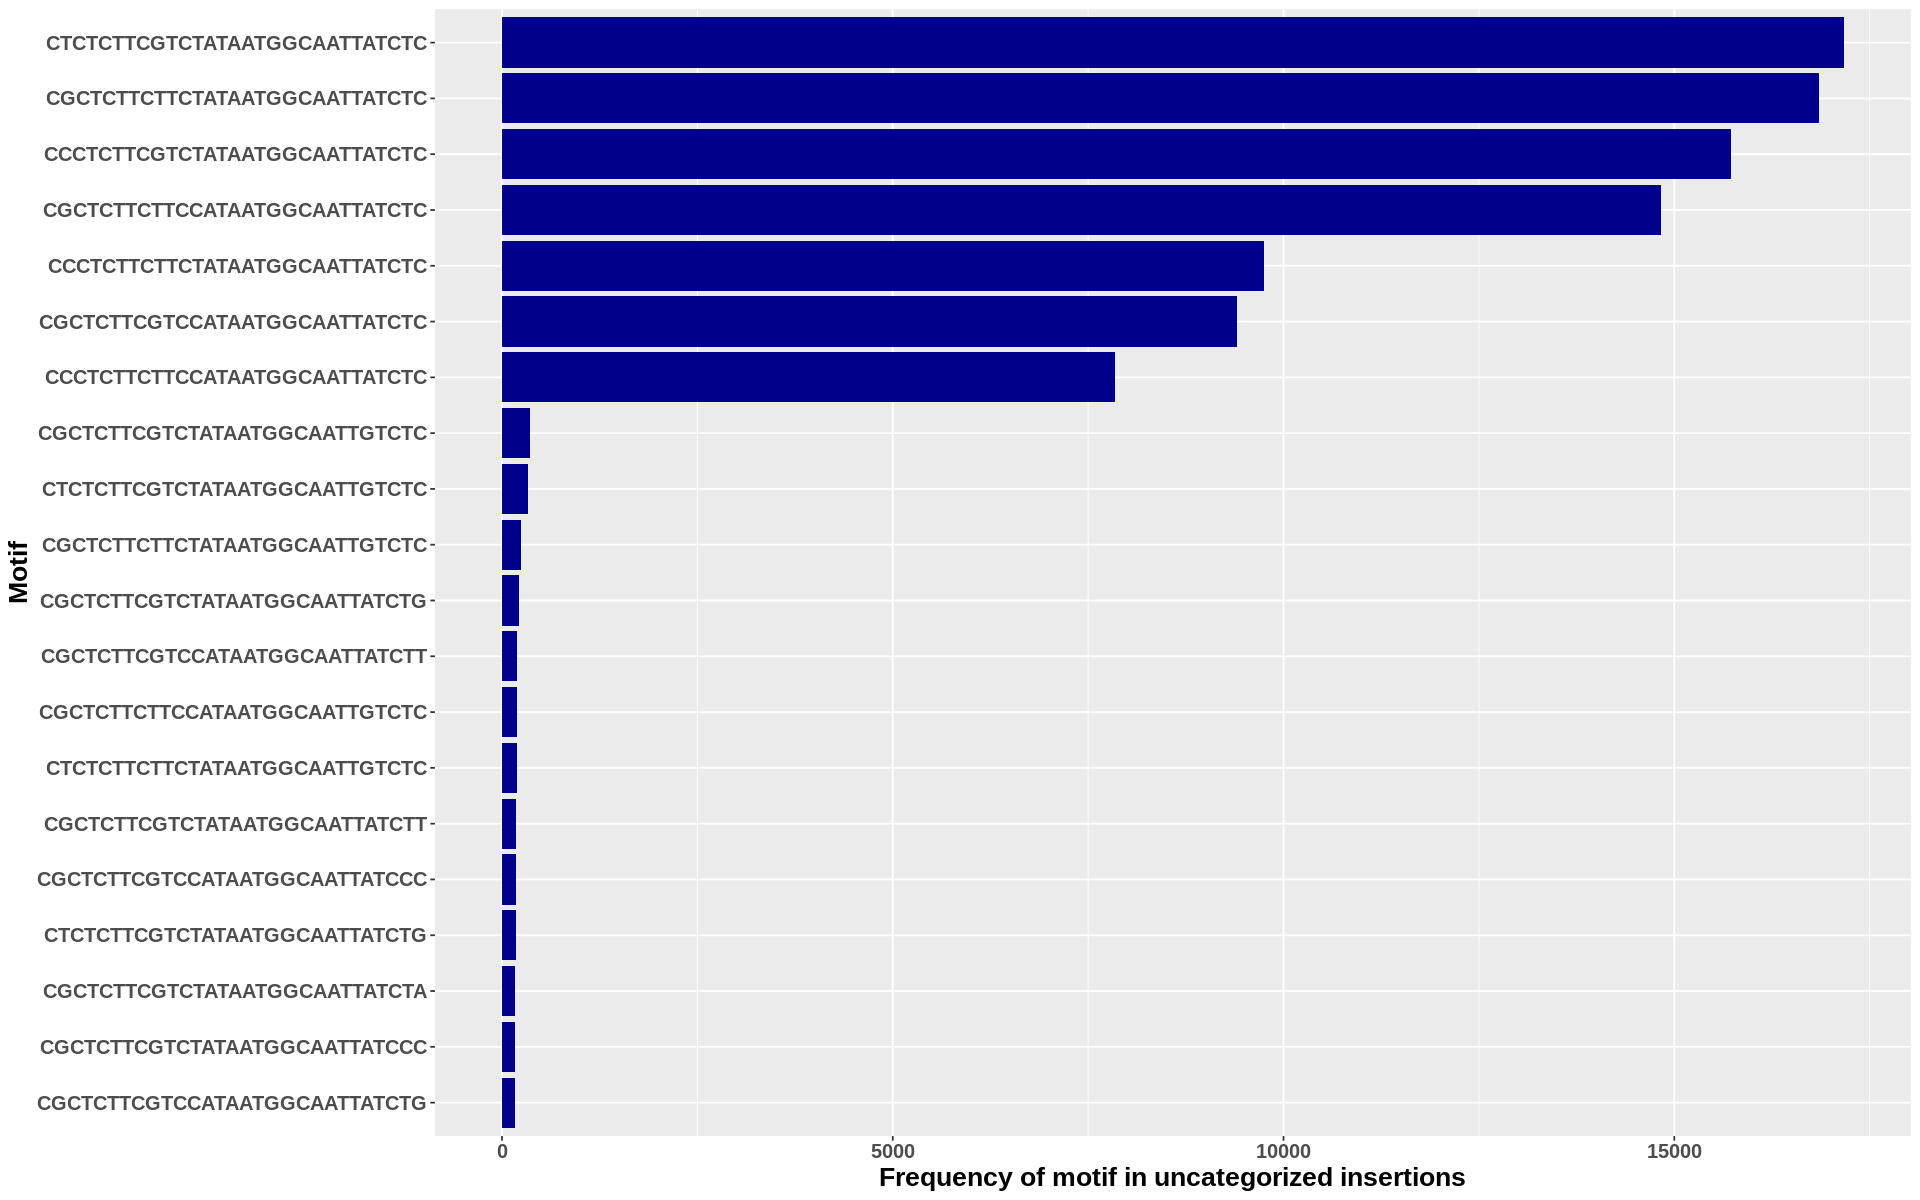

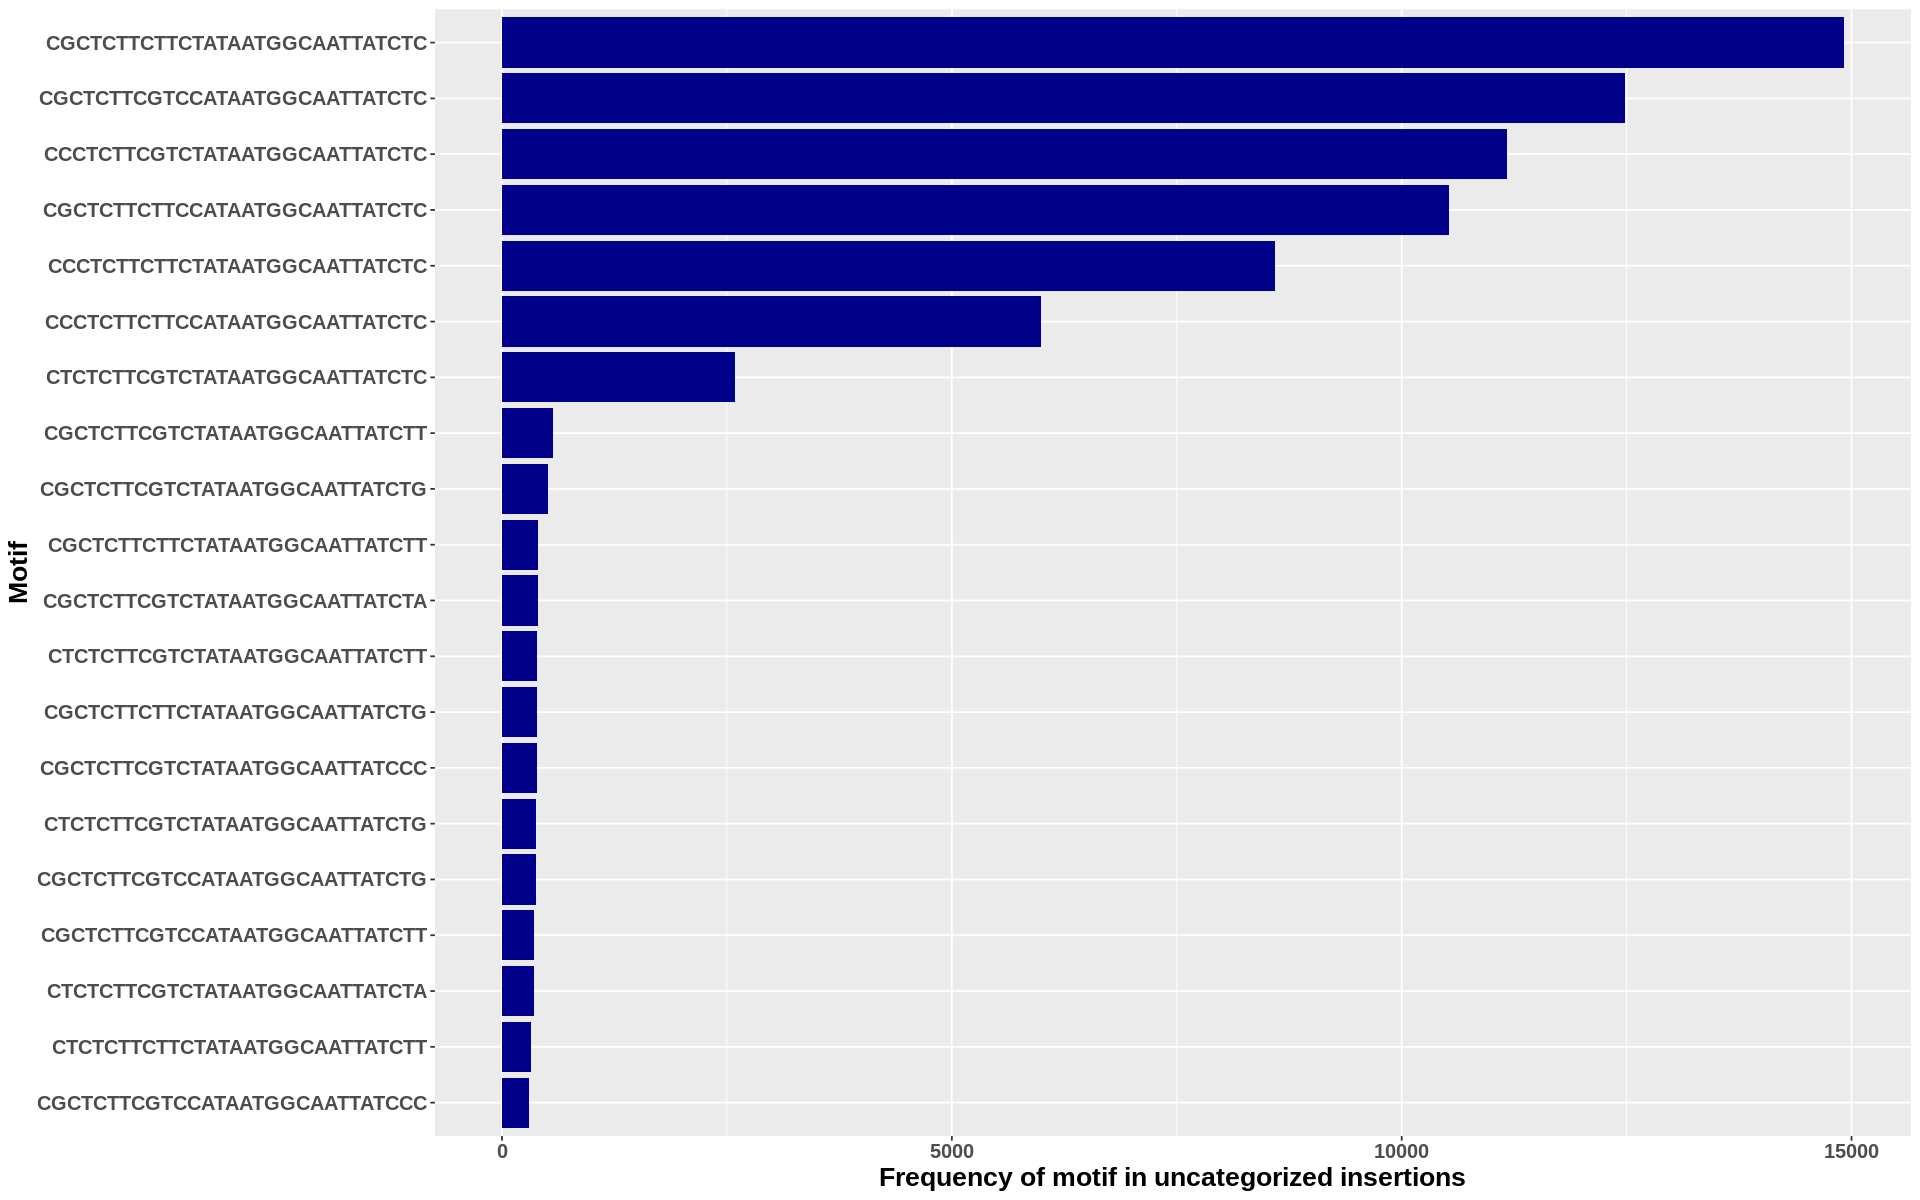

In [285]:
#or plotting seperately
options(repr.plot.width=16, repr.plot.height=10)

all_B73_final_clstrs %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(y= reorder(motif, freq), x=freq)) +
    geom_col(fill = "darkblue") +
    xlab("Frequency of motif in uncategorized insertions") +
    ylab("Motif") +
    theme(axis.text=element_text(size=12, face="bold"),
          axis.title=element_text(size=16,face="bold"))

all_F7_final_clstrs %>%
  head(n = 20) %>%
  #plotting
  #quick tips on reordering bars; https://sebastiansauer.github.io/ordering-bars/
  ggplot(., aes(y= reorder(motif, freq), x=freq)) +
    geom_col(fill = "darkblue") +
    xlab("Frequency of motif in uncategorized insertions") +
    ylab("Motif") +
    theme(axis.text=element_text(size=12, face="bold"),
          axis.title=element_text(size=16,face="bold"))

#### Plotting with ggtree

In [ ]:
# need to change tile sides for tile plot! - code in original Mu distribution notebook

### Tables for ordering scientists... primer help
#### Just do this for a master set of libraries and have lib in first column
#### Note this is the only step where we limit it to just the germinal annotated datasets

In [58]:
all_Mu_merged %>%
  head()

,lib,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,⋯,all_n_max_value,type_n_max_value,all_TIES,type_TIES,all_max_name,type_max_name,perc_uncategorized,perc_best_type_of_types,all_candidates,type_candidates
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,Museq_1,Zm00001eb000010,1,32517,42304,Row_21,39964,39972,7,3,⋯,2,3,WINNER,TIED,uncategorized,TIED,0.40,0.200,Mu8|MuDR|uncategorized,Mu8|MuDR
2,Museq_1,Zm00001eb000010,1,32517,42304,Col_14,39964,39972,3,5,⋯,3,3,TIED,TIED,TIED,TIED,0.25,0.375,Mu3|Mu4,Mu3|Mu4
3,Museq_1,Zm00001eb000020,1,39114,48862,Row_21,39964,39972,7,3,⋯,2,3,WINNER,TIED,uncategorized,TIED,0.40,0.200,Mu8|MuDR|uncategorized,Mu8|MuDR
4,Museq_1,Zm00001eb000020,1,39114,48862,Col_14,39964,39972,3,5,⋯,3,3,TIED,TIED,TIED,TIED,0.25,0.375,Mu3|Mu4,Mu3|Mu4
5,Museq_1,Zm00001eb000020,1,39114,48862,Row_16,45823,45831,7,9,⋯,2,2,WINNER,WINNER,n4_hmudrB1_12_13,n4_hmudrB1_12_13,0.00,0.250,n4_hmudrB1_12_13,n4_hmudrB1_12_13
6,Museq_1,Zm00001eb000020,1,39114,48862,Col_05,45823,45831,4,4,⋯,4,4,TIED,TIED,TIED,TIED,0.00,0.250,n2_hmudrA9_hmudrA8|n3|n6,n2_hmudrA9_hmudrA8|n3|n6


In [59]:
master_all_Mu_merged <- all_Mu_merged %>%
  select(-ends_with("_L")) %>%
  select(-ends_with("_R")) %>%
  select(-ends_with("_total")) %>%
  select(-uncategorized, -all_max_value, -type_max_value, -type_n_max_value, -all_TIES, -type_TIES, -all_max_name, 
         -type_max_name, -all_n_max_value, -perc_uncategorized, -all_candidates) %>%
  relocate(lib, .before = GeneID)

In [60]:
tail(master_all_Mu_merged)

,lib,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,stock,TotalReads,perc_best_type_of_types,type_candidates
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<chr>
1061125,Museq_F7_4,Zm00001eb443030,scaf_695,236,6326,Row_08,4754,4762,2,6,1891,F-1906,8,0.2500000,Mu1|Mu3|Mu4|Mu5|Mu7|Mu17|n5|n6
1061126,Museq_F7_4,Zm00001eb443030,scaf_695,236,6326,Col_10,4754,4762,13,10,1891,F-1906,23,0.2608696,n5
1061127,Museq_F7_4,Zm00001eb436490,scaf_72,101075,106434,Row_07,106396,106404,2,4,1160,F-1894,6,0.6666667,Mu8|MuDR
1061128,Museq_F7_4,Zm00001eb436490,scaf_72,101075,106434,Col_22,106396,106404,5,2,1160,F-1894,7,0.2857143,Mu11|Mu14|Mu16|Mu19|n4_hmudrB1_12_13
1061129,Museq_F7_4,Zm00001eb436730,scaf_82,108778,116739,Row_13,114418,114426,2,2,3762,F-2017,4,0.7500000,n2_hmudrA9_hmudrA8
1061130,Museq_F7_4,Zm00001eb436730,scaf_82,108778,116739,Col_01,114418,114426,2,2,3762,F-2017,4,0.5000000,n1_UniformMu_hit|n6


##### handling the gtf file

In [61]:
#should download manually before - getting timeout problems when letting this be done inside "getChromSizesFromFasta()"
#gtfSource = "http://ftp.ensemblgenomes.org/pub/plants/release-51/gtf/zea_mays/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.51.gtf.gz"
gtfSource = "/data/home/stoecker/fdi_genofam_mount/stoecker/general_data/Zea_mays.Zm-B73-REFERENCE-NAM-5.0.52.gtf"

##Gene models
#What about gene models for partition plots?
#features = c("gene", "exon", "three_prime_utr", "five_prime_utr")
#zea_mays_GeneModels = getGeneModelsFromGTF(source=gtfSource, features=features, convertEnsemblUCSC=FALSE)

#You can now pass the CEelegansGeneModels object to genomePartitionList function, which created list of genomic partitions that are then passed to calcPartitions function as partitionList argument.
#partitionList = genomePartitionList(zea_mays_GeneModels$gene,
#                                    zea_mays_GeneModels$exon,
#                                    zea_mays_GeneModels$three_prime_utr, 
#                                    zea_mays_GeneModels$five_prime_utr)

my_obj <- rtracklayer::import(gtfSource)

### Code to add distance of insertion to ATG start site to tables

In [62]:
#alternatively
ATG_position <- as.data.frame(my_obj) %>%
  filter(str_detect(transcript_id, "_T001")) %>%
  filter(type=="start_codon") %>%
  select(seqnames, start, end, strand, gene_id) %>%
  arrange(gene_id) %>%
  mutate(ATG_pos = case_when(
                     strand == "-" ~ end,
                     strand == "+" ~ start
                   )
         )

master_all_Mu_merged_simple_ATG <- dplyr::left_join(master_all_Mu_merged, 
                                             ATG_position, 
                                             by = c("GeneID" = "gene_id"), 
                                             keep = FALSE) %>%
                                    select(-seqnames, -start, -end)

head(master_all_Mu_merged_simple_ATG)
nrow(master_all_Mu_merged)
nrow(master_all_Mu_merged_simple_ATG)

,lib,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,stock,TotalReads,perc_best_type_of_types,type_candidates,strand,ATG_pos
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>,<chr>,<fct>,<int>
1,Museq_1,Zm00001eb000010,1,32517,42304,Row_21,39964,39972,7,3,5588,A-0494,10,0.200,Mu8|MuDR,+,34722
2,Museq_1,Zm00001eb000010,1,32517,42304,Col_14,39964,39972,3,5,5588,A-0494,8,0.375,Mu3|Mu4,+,34722
3,Museq_1,Zm00001eb000020,1,39114,48862,Row_21,39964,39972,7,3,5549,A-0494,10,0.200,Mu8|MuDR,-,45913
4,Museq_1,Zm00001eb000020,1,39114,48862,Col_14,39964,39972,3,5,5549,A-0494,8,0.375,Mu3|Mu4,-,45913
5,Museq_1,Zm00001eb000020,1,39114,48862,Row_16,45823,45831,7,9,5549,A-0365,16,0.250,n4_hmudrB1_12_13,-,45913
6,Museq_1,Zm00001eb000020,1,39114,48862,Col_05,45823,45831,4,4,5549,A-0365,8,0.250,n2_hmudrA9_hmudrA8|n3|n6,-,45913


[1] 1061130

[1] 1062288

In [63]:
master_all_Mu_merged_dist_ATG <- master_all_Mu_merged_simple_ATG %>%
  mutate(InsertionStart_dist = abs(InsertionStart - ATG_pos)) %>%
  mutate(InsertionEnd_dist = abs(InsertionEnd - ATG_pos)) %>%
  #determine side of insertion - "left or right" in a sense
  mutate(InsertionSide = case_when(
                           InsertionStart_dist > InsertionEnd_dist ~ "left",
                           InsertionStart_dist < InsertionEnd_dist ~ "right",
                         )
  ) %>%
  mutate(ATG_distance = case_when(
                           strand == "+" & InsertionSide == "right" ~ paste0(InsertionStart_dist, " bp downstream of A from ATG"),
                           strand == "+" & InsertionSide == "left" ~ paste0(InsertionEnd_dist, " bp upstream of A from ATG"),
                           strand == "-" & InsertionSide == "right" ~ paste0(InsertionStart_dist, " bp upstream of A from ATG"),
                           strand == "-" & InsertionSide == "left" ~ paste0(InsertionEnd_dist, " bp downstream of A from ATG"),
#                           InsertionStart_dist < InsertionEnd_dist ~ "right",
                           TRUE ~ as.character("unclear CDS; e.g. non coding gene")
                         )
  )

head(master_all_Mu_merged_dist_ATG, n=2)

#calc %>% arrange(InsertionStart_dist) %>% head(n=5)
#calc %>% filter(ATG_distance == "unclear CDS; e.g. non coding gene") %>% nrow()
master_all_Mu_merged_dist_ATG %>% filter(str_detect(ATG_distance, "upstream")) %>% arrange(desc(ATG_distance)) %>% head()

,lib,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,⋯,stock,TotalReads,perc_best_type_of_types,type_candidates,strand,ATG_pos,InsertionStart_dist,InsertionEnd_dist,InsertionSide,ATG_distance
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<chr>,<int>,<dbl>,<chr>,<fct>,<int>,<int>,<int>,<chr>,<chr>
1,Museq_1,Zm00001eb000010,1,32517,42304,Row_21,39964,39972,7,3,⋯,A-0494,10,0.200,Mu8|MuDR,+,34722,5242,5250,right,5242 bp downstream of A from ATG
2,Museq_1,Zm00001eb000010,1,32517,42304,Col_14,39964,39972,3,5,⋯,A-0494,8,0.375,Mu3|Mu4,+,34722,5242,5250,right,5242 bp downstream of A from ATG


,lib,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,⋯,stock,TotalReads,perc_best_type_of_types,type_candidates,strand,ATG_pos,InsertionStart_dist,InsertionEnd_dist,InsertionSide,ATG_distance
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<chr>,<int>,<dbl>,<chr>,<fct>,<int>,<int>,<int>,<chr>,<chr>
1,Museq_7,Zm00001eb011860,1,38561025,38577032,Row_15,38574656,38574664,9,9,⋯,C-659,18,0.2777778,Mu1,-,38564659,9997,10005,right,9997 bp upstream of A from ATG
2,Museq_7,Zm00001eb011860,1,38561025,38577032,Col_19,38574656,38574664,3,7,⋯,C-659,10,0.3000000,Mu1|n2_hmudrA9_hmudrA8,-,38564659,9997,10005,right,9997 bp upstream of A from ATG
3,Museq_6,Zm00001eb091620,2,139323784,139344555,Row_20,139325962,139325970,7,9,⋯,C-201,16,0.1875000,Mu1|Mu2|n4_hmudrB1_12_13,+,139335966,10004,9996,left,9996 bp upstream of A from ATG
4,Museq_6,Zm00001eb091620,2,139323784,139344555,Col_17,139325962,139325970,4,2,⋯,C-201,6,0.5000000,Mu1,+,139335966,10004,9996,left,9996 bp upstream of A from ATG
5,Museq_4,Zm00001eb091620,2,139323784,139344555,Row_16,139325963,139325971,7,4,⋯,A-1526,11,0.3636364,Mu8|MuDR|n1_UniformMu_hit,+,139335966,10003,9995,left,9995 bp upstream of A from ATG
6,Museq_4,Zm00001eb091620,2,139323784,139344555,Col_14,139325963,139325971,2,2,⋯,A-1526,4,0.5000000,n3|n4_hmudrB1_12_13,+,139335966,10003,9995,left,9995 bp upstream of A from ATG


#### adding info of genomic partition to insertion 

In [72]:
#my_obj_df <- as.data.frame(my_obj) %>%
#  select(seqnames, start, end, strand, type, gene_id, transcript_id) %>%
#  distinct() %>%
#  mutate(partition = as.character(type)) %>%
#  select(-type) %>%
#  filter(!partition %in% c("exon", "start_codon", "stop_codon"))
#
#
#my_obj_df %>%
#  filter(partition == "gene") %>%
#  arrange(seqnames, start) %>%
#  #we need to differentiate between the two strand scenarios
#  mutate(START = case_when(
#                           strand == "+" ~ start-100,
#                           strand == "-" ~ end+1,
#                         ) 
#  )%>%
#  mutate(END = case_when(
#                           strand == "+" ~ start-1,
#                           strand == "-" ~ end+100,
#                         ) 
#  ) %>%
#  select(-start, -end) %>%
#  dplyr::rename(start=START, end=END) %>%
#  mutate(partition = "promoterCore") %>%
#  dplyr::rename(Chr=seqnames, GeneID=gene_id) %>%
##  select(Chr, start, end, partition, GeneID) %>%
#  head()

In [79]:
my_obj_df <- as.data.frame(my_obj) %>%
  select(seqnames, start, end, strand, type, gene_id, transcript_id) %>%
  distinct() %>%
  mutate(partition = as.character(type)) %>%
  select(-type) %>%
  filter(!partition %in% c("exon", "start_codon", "stop_codon"))

final_promCore_df <- my_obj_df %>%
  filter(partition == "gene") %>%
  arrange(seqnames, start) %>%
  #we need to differentiate between the two strand scenarios
  mutate(START = case_when(
                           strand == "+" ~ start-100,
                           strand == "-" ~ end+1,
                         ) 
  )%>%
  mutate(END = case_when(
                           strand == "+" ~ start-1,
                           strand == "-" ~ end+100,
                         ) 
  ) %>%
  select(-start, -end) %>%
  dplyr::rename(start=START, end=END) %>%
  mutate(partition = "promoterCore") %>%
  dplyr::rename(Chr=seqnames, GeneID=gene_id) %>%
  select(Chr, start, end, partition, GeneID) 

final_promProx_df <- my_obj_df %>%
  filter(partition == "gene") %>%
  arrange(seqnames, start) %>%
  #we need to differentiate between the two strand scenarios
  mutate(START = case_when(
                           strand == "+" ~ start-2100,
                           strand == "-" ~ end+101,
                         ) 
  )%>%
  mutate(END = case_when(
                           strand == "+" ~ start-101,
                           strand == "-" ~ end+2100,
                         ) 
  ) %>%
  select(-start, -end) %>%
  dplyr::rename(start=START, end=END) %>%
  mutate(partition = "promoterProx") %>%
  dplyr::rename(Chr=seqnames, GeneID=gene_id) %>%
  select(Chr, start, end, partition, GeneID)


my_obj_df <- my_obj_df %>%
  select(-strand) %>%
  dplyr::rename(Chr=seqnames, GeneID=gene_id) %>%
  filter(!partition %in% c("gene")) %>%
  filter(str_detect(transcript_id, "_T001")) %>%
  filter(!partition %in% c("transcript"))


#head(my_obj_df)

my_obj_df <- my_obj_df %>%
  select(-transcript_id) %>%
  #also remove any NA gene IDs
  filter(!is.na(GeneID)) %>%
  #we can also rename CDS to exon for more common naming
  mutate(partition = str_replace(partition, "CDS", "exon"))  

table(my_obj_df$partition)
head(my_obj_df)
nrow(my_obj_df)


#finally, create introns by what is left inside of genes if everything else is removed
genes_gr <- as.data.frame(my_obj) %>%
  mutate(partition = as.character(type)) %>%
  select(-type) %>%
  filter(partition == "gene") %>%
  select(gene_id, start, end) %>%
  dplyr::rename(seqnames = gene_id) %>%
  GenomicRanges::makeGRangesFromDataFrame()

#genes_gr

rest_gr <- my_obj_df %>%
  select(GeneID, start, end) %>%
  dplyr::rename(seqnames = GeneID) %>%
  GenomicRanges::makeGRangesFromDataFrame()

#rest_gr


#find setdiff
introns <- setdiff(genes_gr, rest_gr, ignore.strand=TRUE) 
#introns


intron_df <- as.data.frame(introns) %>%
  mutate(partition = "intron")

chr_gene_df <- my_obj_df %>%
  select(Chr, GeneID) %>%
  distinct()

final_intron_df <- dplyr::left_join(intron_df, chr_gene_df, by=c("seqnames"="GeneID")) %>%
  dplyr::rename(GeneID=seqnames) %>%
  select(Chr, start, end, partition, GeneID)


#final merge
my_obj_df <- dplyr::bind_rows(my_obj_df, final_intron_df)

table(my_obj_df$partition)

my_obj_df <- dplyr::bind_rows(my_obj_df, final_promCore_df)
my_obj_df <- dplyr::bind_rows(my_obj_df, final_promProx_df)

table(my_obj_df$partition)
head(my_obj_df)


           exon  five_prime_utr three_prime_utr 
         177066           43185           38553 

,Chr,start,end,GeneID,partition
,<fct>,<int>,<int>,<chr>,<chr>
1,1,121468868,121469646,Zm00001eb026490,exon
2,1,121467726,121468191,Zm00001eb026490,exon
3,1,121466240,121466626,Zm00001eb026490,exon
4,1,121469647,121469876,Zm00001eb026490,five_prime_utr
5,1,121465669,121466236,Zm00001eb026490,three_prime_utr
6,1,278983025,278983095,Zm00001eb056070,exon


[1] 258804


           exon  five_prime_utr          intron three_prime_utr 
         177066           43185          199250           38553 


           exon  five_prime_utr          intron    promoterCore    promoterProx 
         177066           43185          199250           44303           44303 
three_prime_utr 
          38553 

,Chr,start,end,GeneID,partition
,<fct>,<dbl>,<dbl>,<chr>,<chr>
1,1,121468868,121469646,Zm00001eb026490,exon
2,1,121467726,121468191,Zm00001eb026490,exon
3,1,121466240,121466626,Zm00001eb026490,exon
4,1,121469647,121469876,Zm00001eb026490,five_prime_utr
5,1,121465669,121466236,Zm00001eb026490,three_prime_utr
6,1,278983025,278983095,Zm00001eb056070,exon


In [80]:
#nrow(master_all_Mu_merged_dist_ATG)
BonnMu_Species_Typed_master <- fuzzyjoin::genome_left_join(master_all_Mu_merged_dist_ATG, my_obj_df,
                            by = c("GeneID"="GeneID", "InsertionStart"="start", "InsertionEnd"="end"),
                            minoverlap=5
                           ) 

BonnMu_Species_Typed_master <- BonnMu_Species_Typed_master %>%
  mutate(partition = replace_na(partition, "unassigned")) %>%
  select(-GeneID.y, -Chr.y, -start, -end, -InsertionStart_dist,	-InsertionEnd_dist, -InsertionSide) %>%
  dplyr::rename(GeneID=GeneID.x, Chr=Chr.x) %>%
  dplyr::relocate(strand, .before = stock)

In [81]:
BonnMu_Species_Typed_master <- BonnMu_Species_Typed_master %>%
#only necessary since input datasets have extension to gene models not removed
#has since been fixed with a commit to MuWU pipeline
  mutate(GeneStart = GeneStart+2100) %>%
  mutate(GeneEnd = GeneEnd-2100)

In [82]:
table(BonnMu_Species_Typed_master$partition)
table(is.na(BonnMu_Species_Typed_master$partition))


           exon  five_prime_utr          intron    promoterCore    promoterProx 
         168172          335120          180858           51188          136526 
three_prime_utr      unassigned 
          32434          157990 


  FALSE 
1062288 

In [91]:
#final checks
BonnMu_Species_Typed_master %>%
  filter(partition=="promoterProx") %>%
  head()
#  filter(GeneID=="Zm00001eb000680")

,lib,GeneID,Chr,GeneStart,GeneEnd,Sample,InsertionStart,InsertionEnd,StartReads,EndReads,Gene_length,strand,stock,TotalReads,perc_best_type_of_types,type_candidates,ATG_pos,ATG_distance,partition
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<int>,<fct>,<chr>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>
1,Museq_1,Zm00001eb000080,1,200262,203393,Row_22,205038,205046,37,16,3132,-,A-0524,53,0.1698113,Mu8|MuDR,202121,2917 bp upstream of A from ATG,promoterProx
2,Museq_1,Zm00001eb000080,1,200262,203393,Col_20,205038,205046,15,9,3132,-,A-0524,24,0.2500000,n5,202121,2917 bp upstream of A from ATG,promoterProx
3,Museq_1,Zm00001eb000080,1,200262,203393,Row_09,205449,205457,2,3,3132,-,A-0197,5,0.2000000,Mu8|MuDR,202121,3328 bp upstream of A from ATG,promoterProx
4,Museq_1,Zm00001eb000080,1,200262,203393,Col_05,205449,205457,2,2,3132,-,A-0197,4,0.2500000,n1_UniformMu_hit,202121,3328 bp upstream of A from ATG,promoterProx
5,Museq_1,Zm00001eb000080,1,200262,203393,Row_09,205474,205482,2,2,3132,-,A-0201,4,0.5000000,Mu8|MuDR,202121,3353 bp upstream of A from ATG,promoterProx
6,Museq_1,Zm00001eb000080,1,200262,203393,Col_09,205474,205482,2,2,3132,-,A-0201,4,0.5000000,Mu1|Mu5|Mu7|Mu17,202121,3353 bp upstream of A from ATG,promoterProx


In [54]:
write.xlsx(x = BonnMu_Species_Typed_master %>%
                 filter(lib == "Museq_1"), 
           file = "Museq_1_Species_Typed_master.xlsx", 
           overwrite = TRUE)

write.xlsx(x = BonnMu_Species_Typed_master %>%
                 filter(lib == "Museq_7"), 
           file = "Museq_7_Species_Typed_master.xlsx", 
           overwrite = TRUE)

### Helper Functions

GRanges object with 10 ranges and 0 metadata columns:
       seqnames    ranges strand
          <Rle> <IRanges>  <Rle>
   [1]        1 2000-5000      *
   [2]        1 2000-5000      *
   [3]        1 2000-5000      *
   [4]        1 2000-5000      *
   [5]        1 2000-5000      *
   [6]        1 2000-5000      *
   [7]        1 2000-5000      *
   [8]        1 2000-5000      *
   [9]        1 2000-5000      *
  [10]        1 2000-5000      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

GRanges object with 8 ranges and 0 metadata columns:
      seqnames    ranges strand
         <Rle> <IRanges>  <Rle>
  [1]        1 2200-4400      *
  [2]        1 2200-4400      *
  [3]        1 2200-3800      *
  [4]        1 2200-3800      *
  [5]        1 2200-3200      *
  [6]        1 2200-3200      *
  [7]        1 2200-2600      *
  [8]        1 2200-2600      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

$d
[1]  1425  1425 -5499 -5499

$b
 [1] 1995 1995 1995 1995 1995 1995 1995 1995 1995 1995

$c
[1] 1100 1100  800  800  500  500  200  200

$g
    [1] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [15] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [29] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [43] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [57] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [71] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [85] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
   [99] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [113] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [127] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [141] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [155] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [169] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [183] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [197] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [211] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [225] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [239] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [253] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [267] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [281] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [295] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [309] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [323] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [337] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [351] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [365] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [379] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [393] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [407] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [421] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [435] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [449] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [463] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [477] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [491] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [505] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [519] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [533] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [547] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [561] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [575] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [589] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [603] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [617] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [631] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [645] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [659] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [673] 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525 1525
  [687] 1525 1525 1525 1525 1525 152

List of 4
 $ d: num [1:4] 1425 1425 -5499 -5499
 $ b: num [1:10] 1995 1995 1995 1995 1995 ...
 $ c: num [1:8] 1100 1100 800 800 500 500 200 200
 $ g: num [1:10000] 1525 1525 1525 1525 1525 ...
List of 4
 $ d: num [1:4] -1425 -1425 5499 5499
 $ b: num [1:10] -1995 -1995 -1995 -1995 -1995 ...
 $ c: num [1:8] -1100 -1100 -800 -800 -500 -500 -200 -200
 $ g: num [1:10000] -1525 -1525 -1525 -1525 -1525 ...


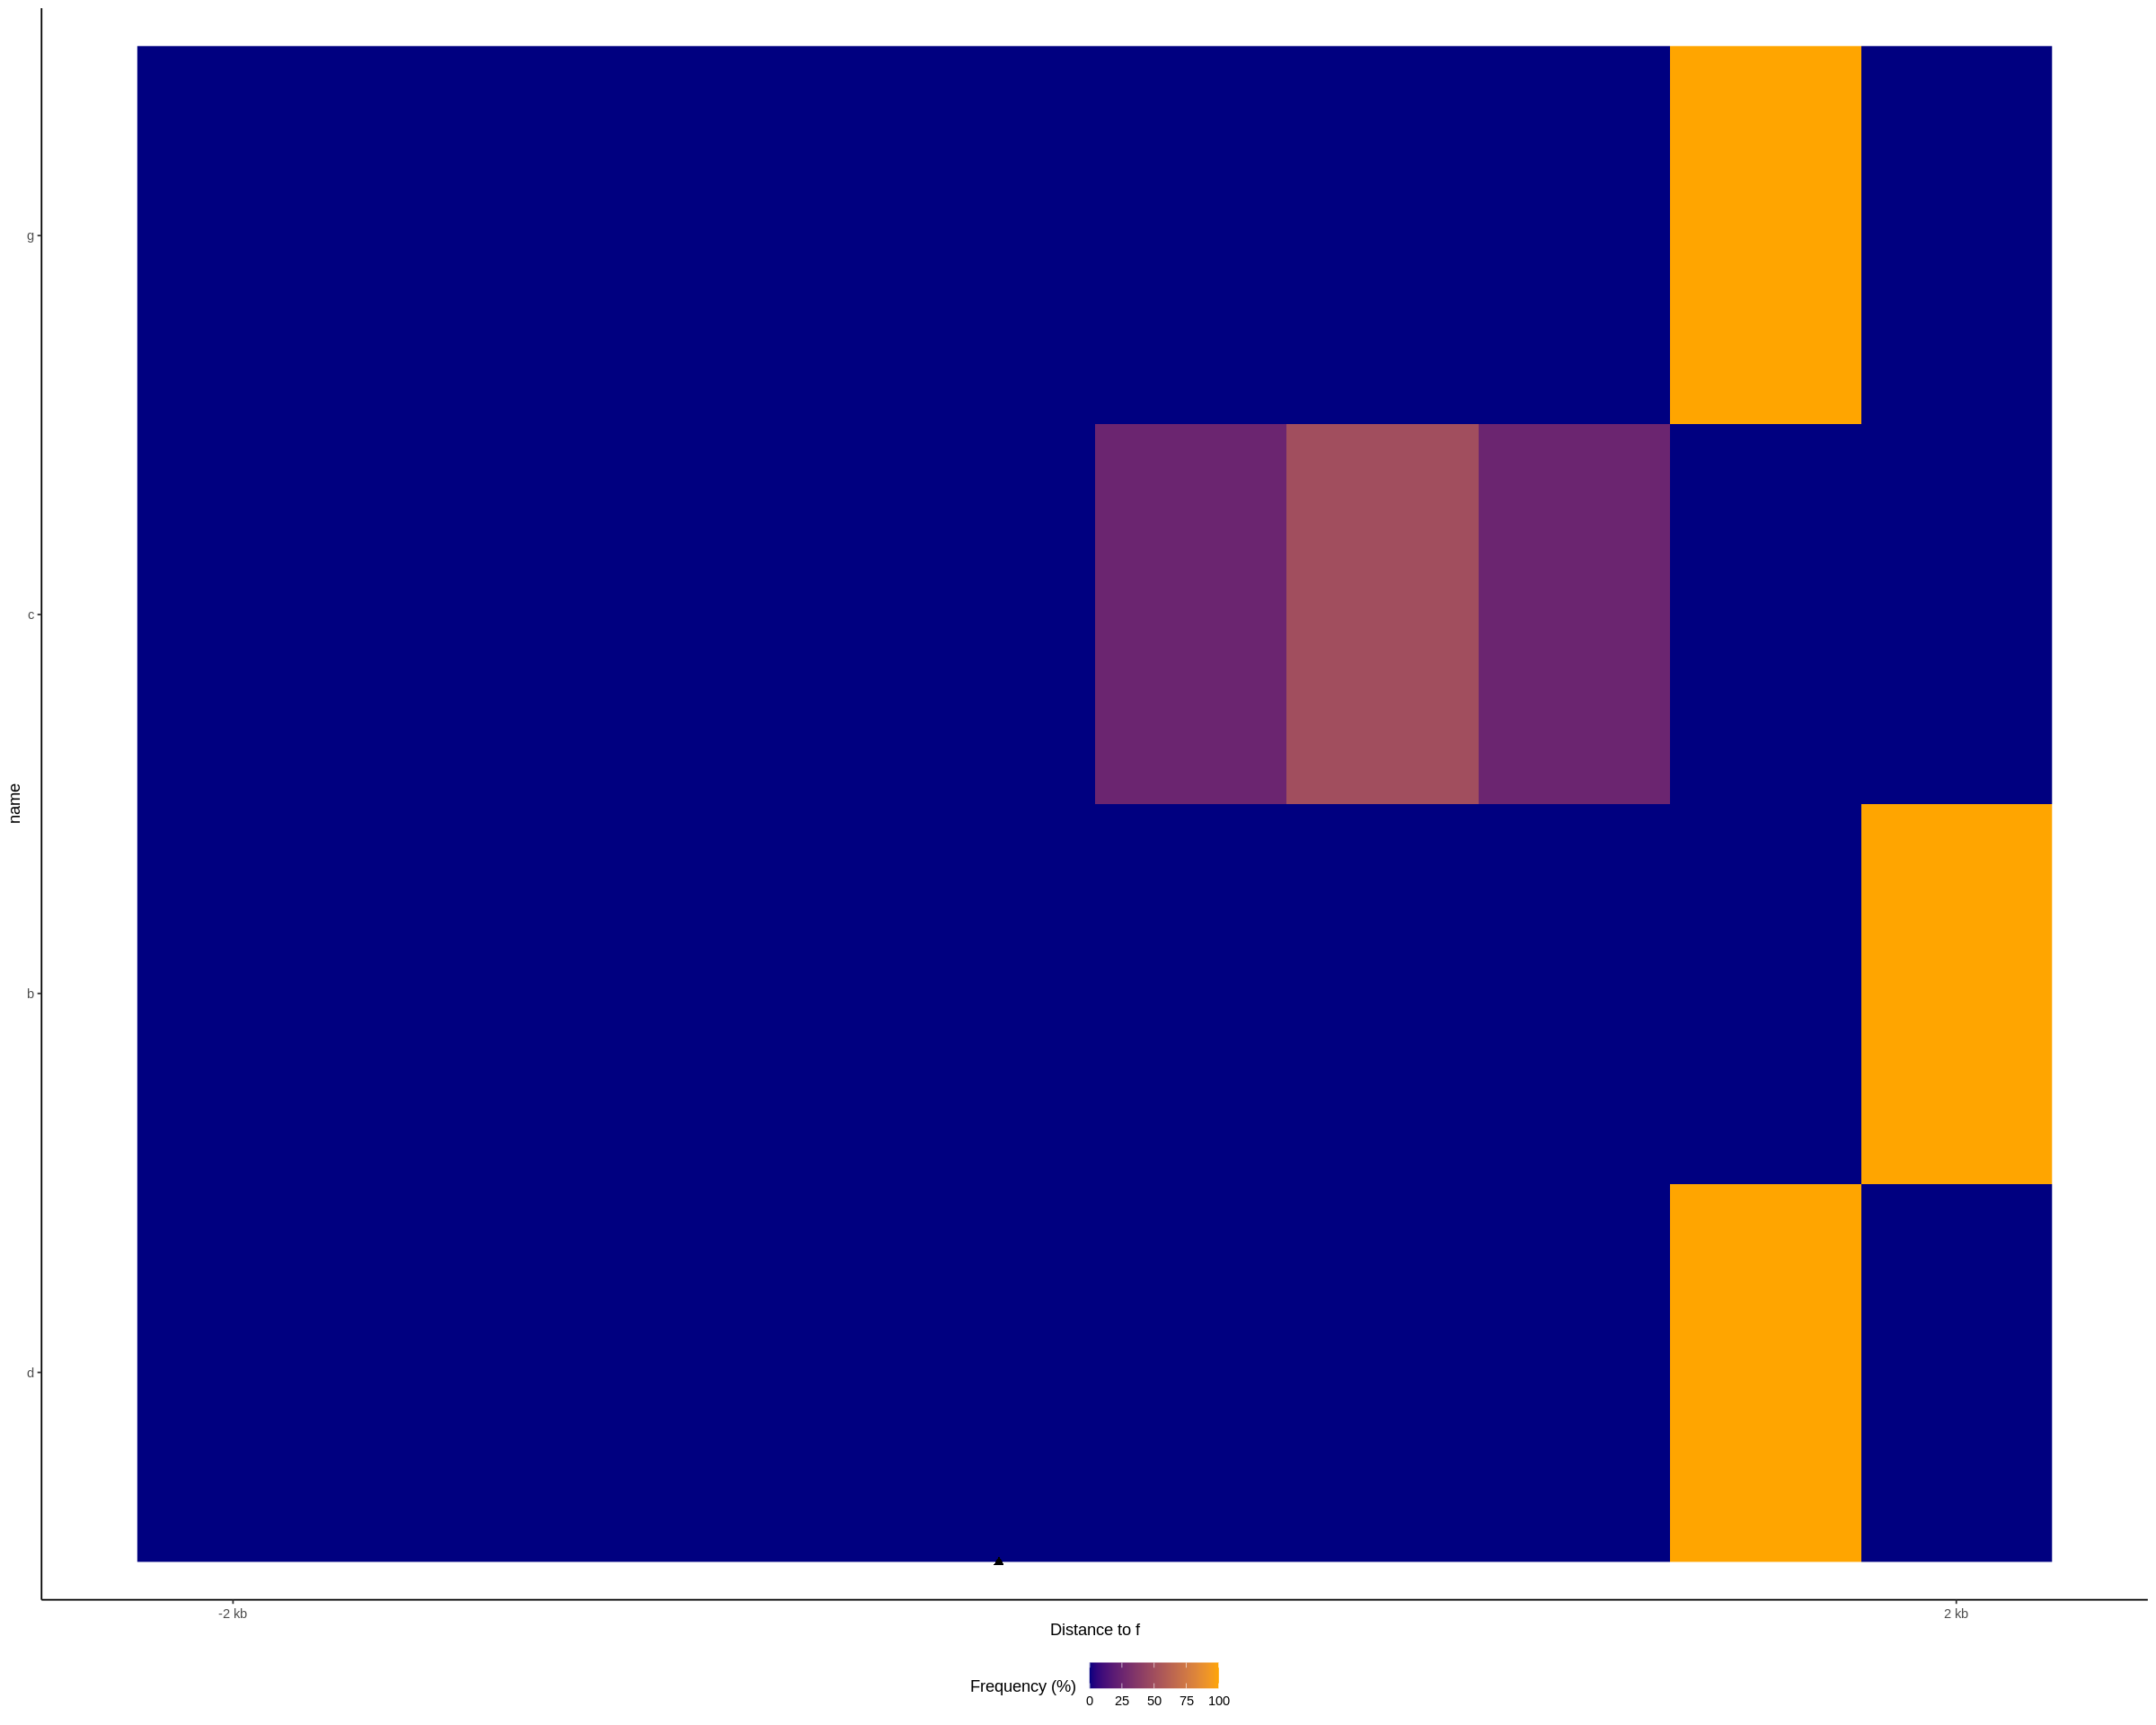

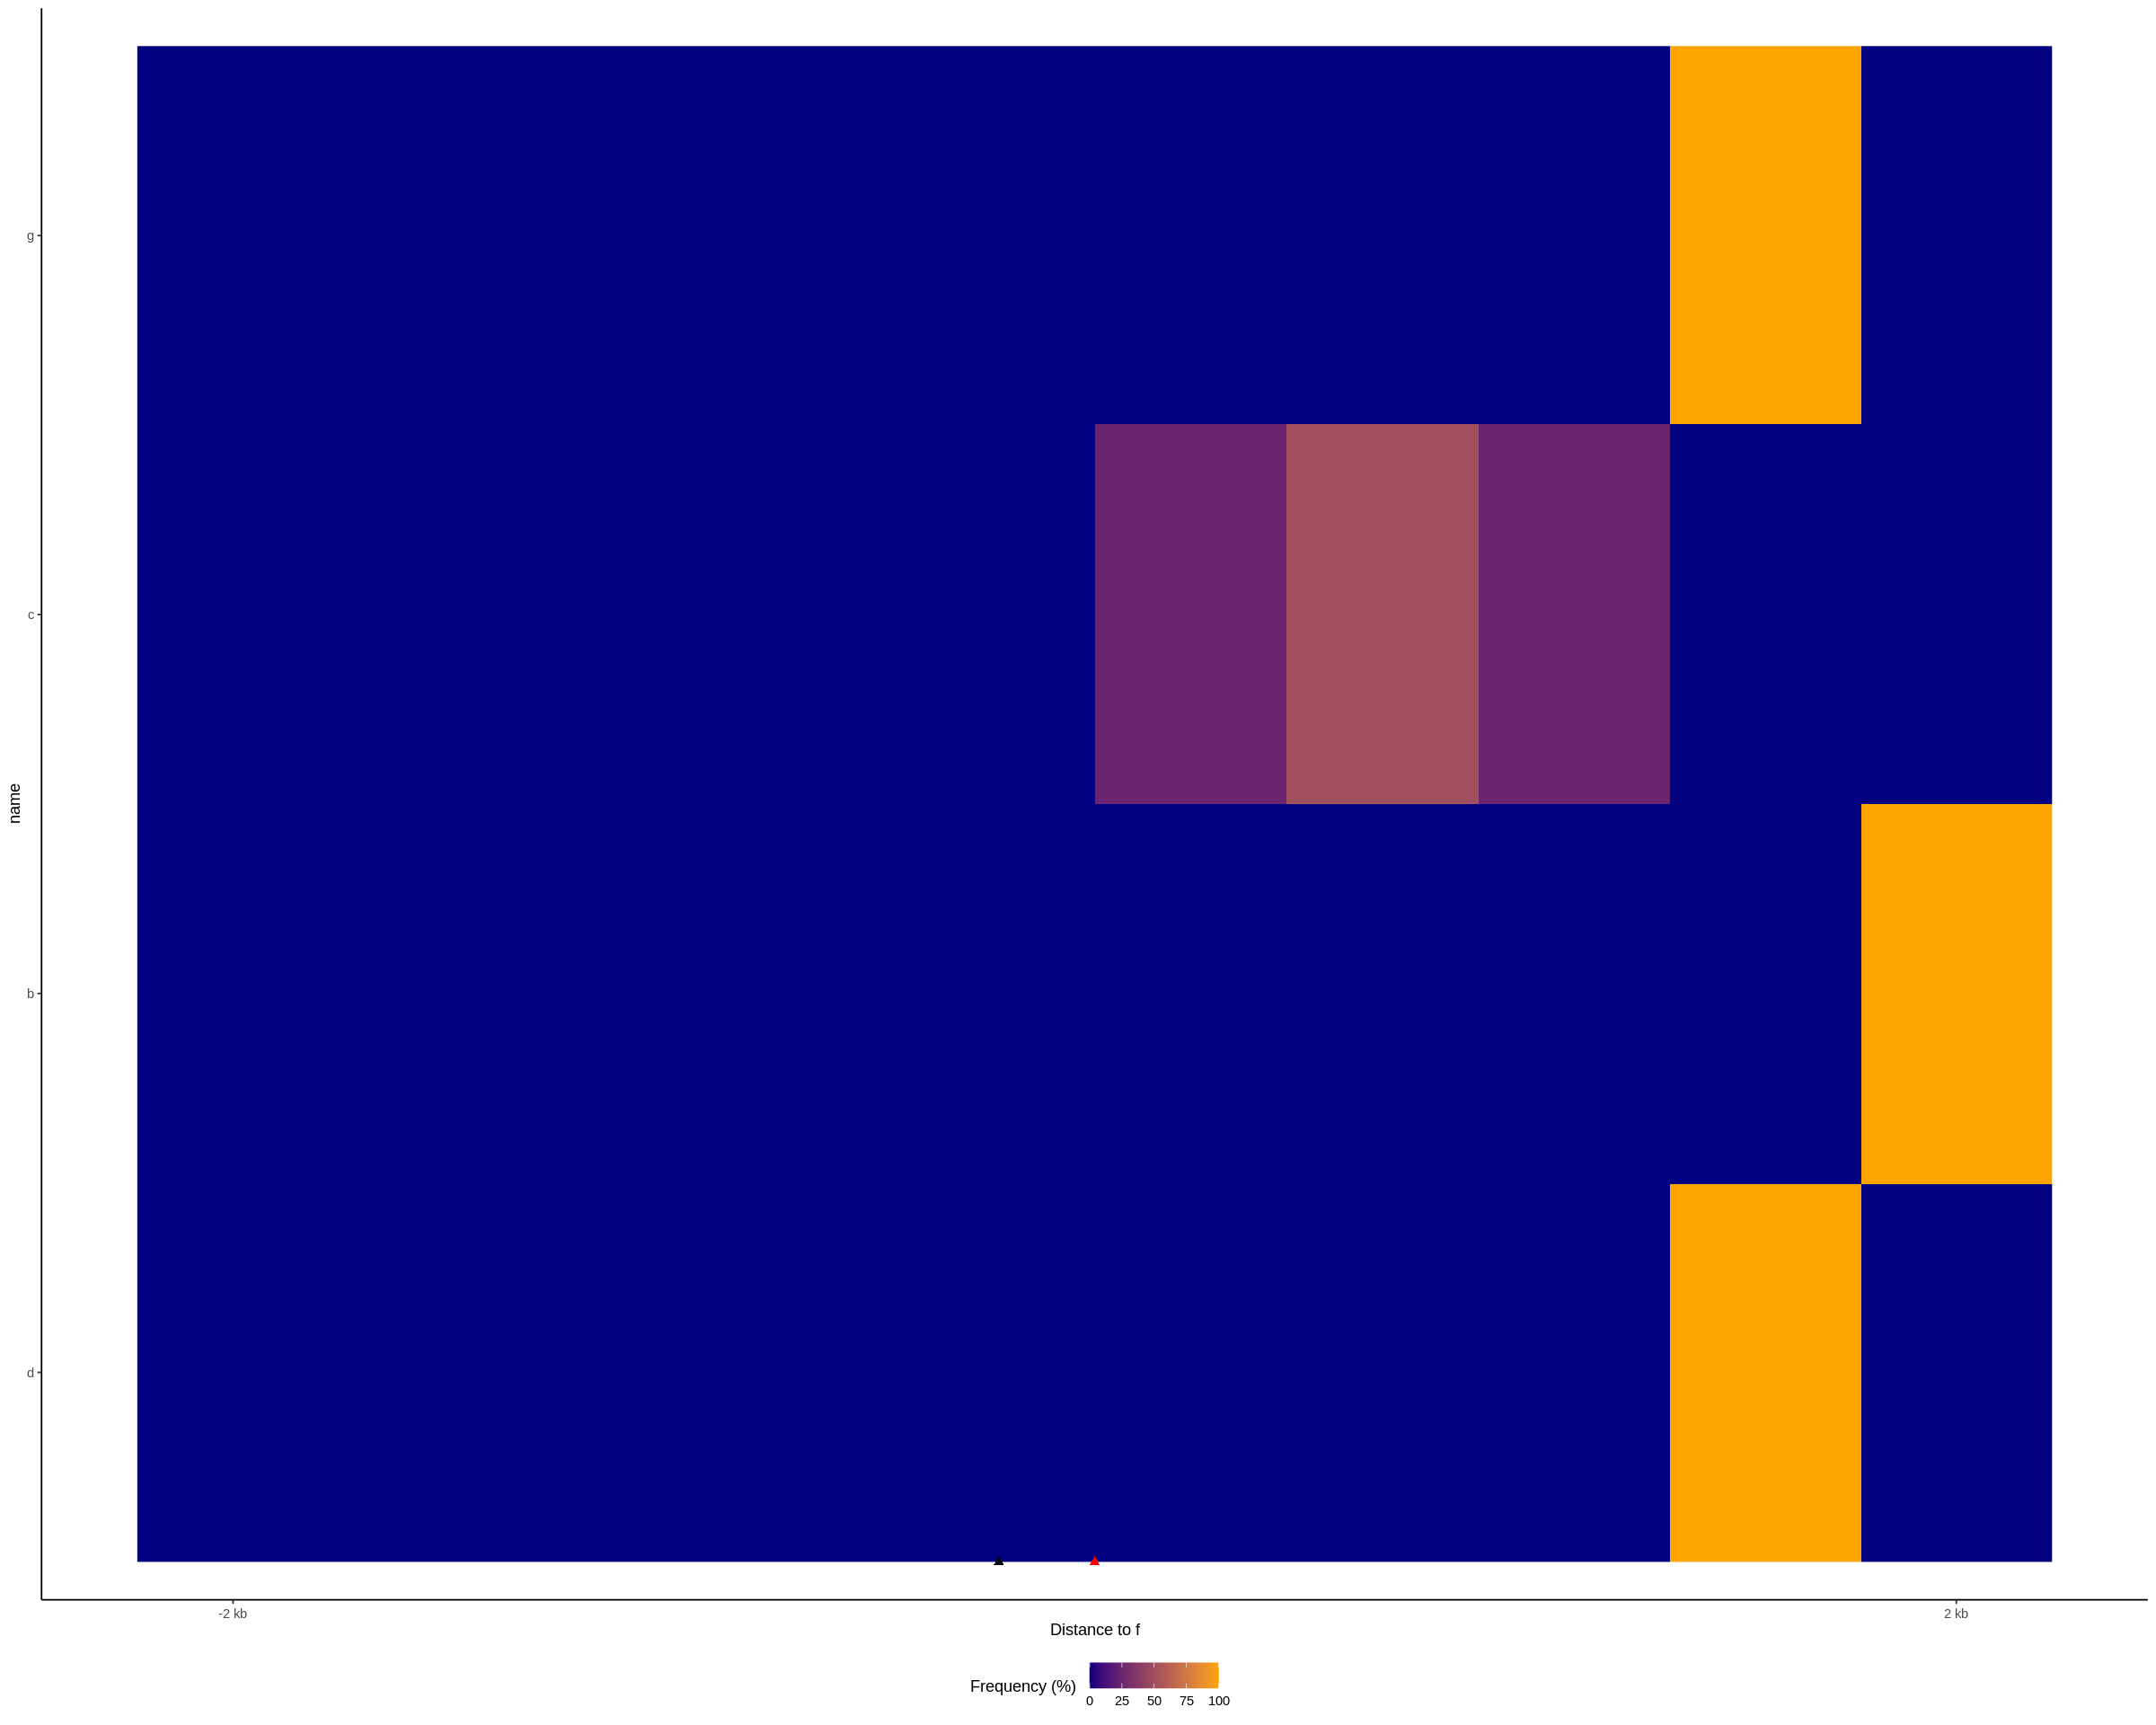

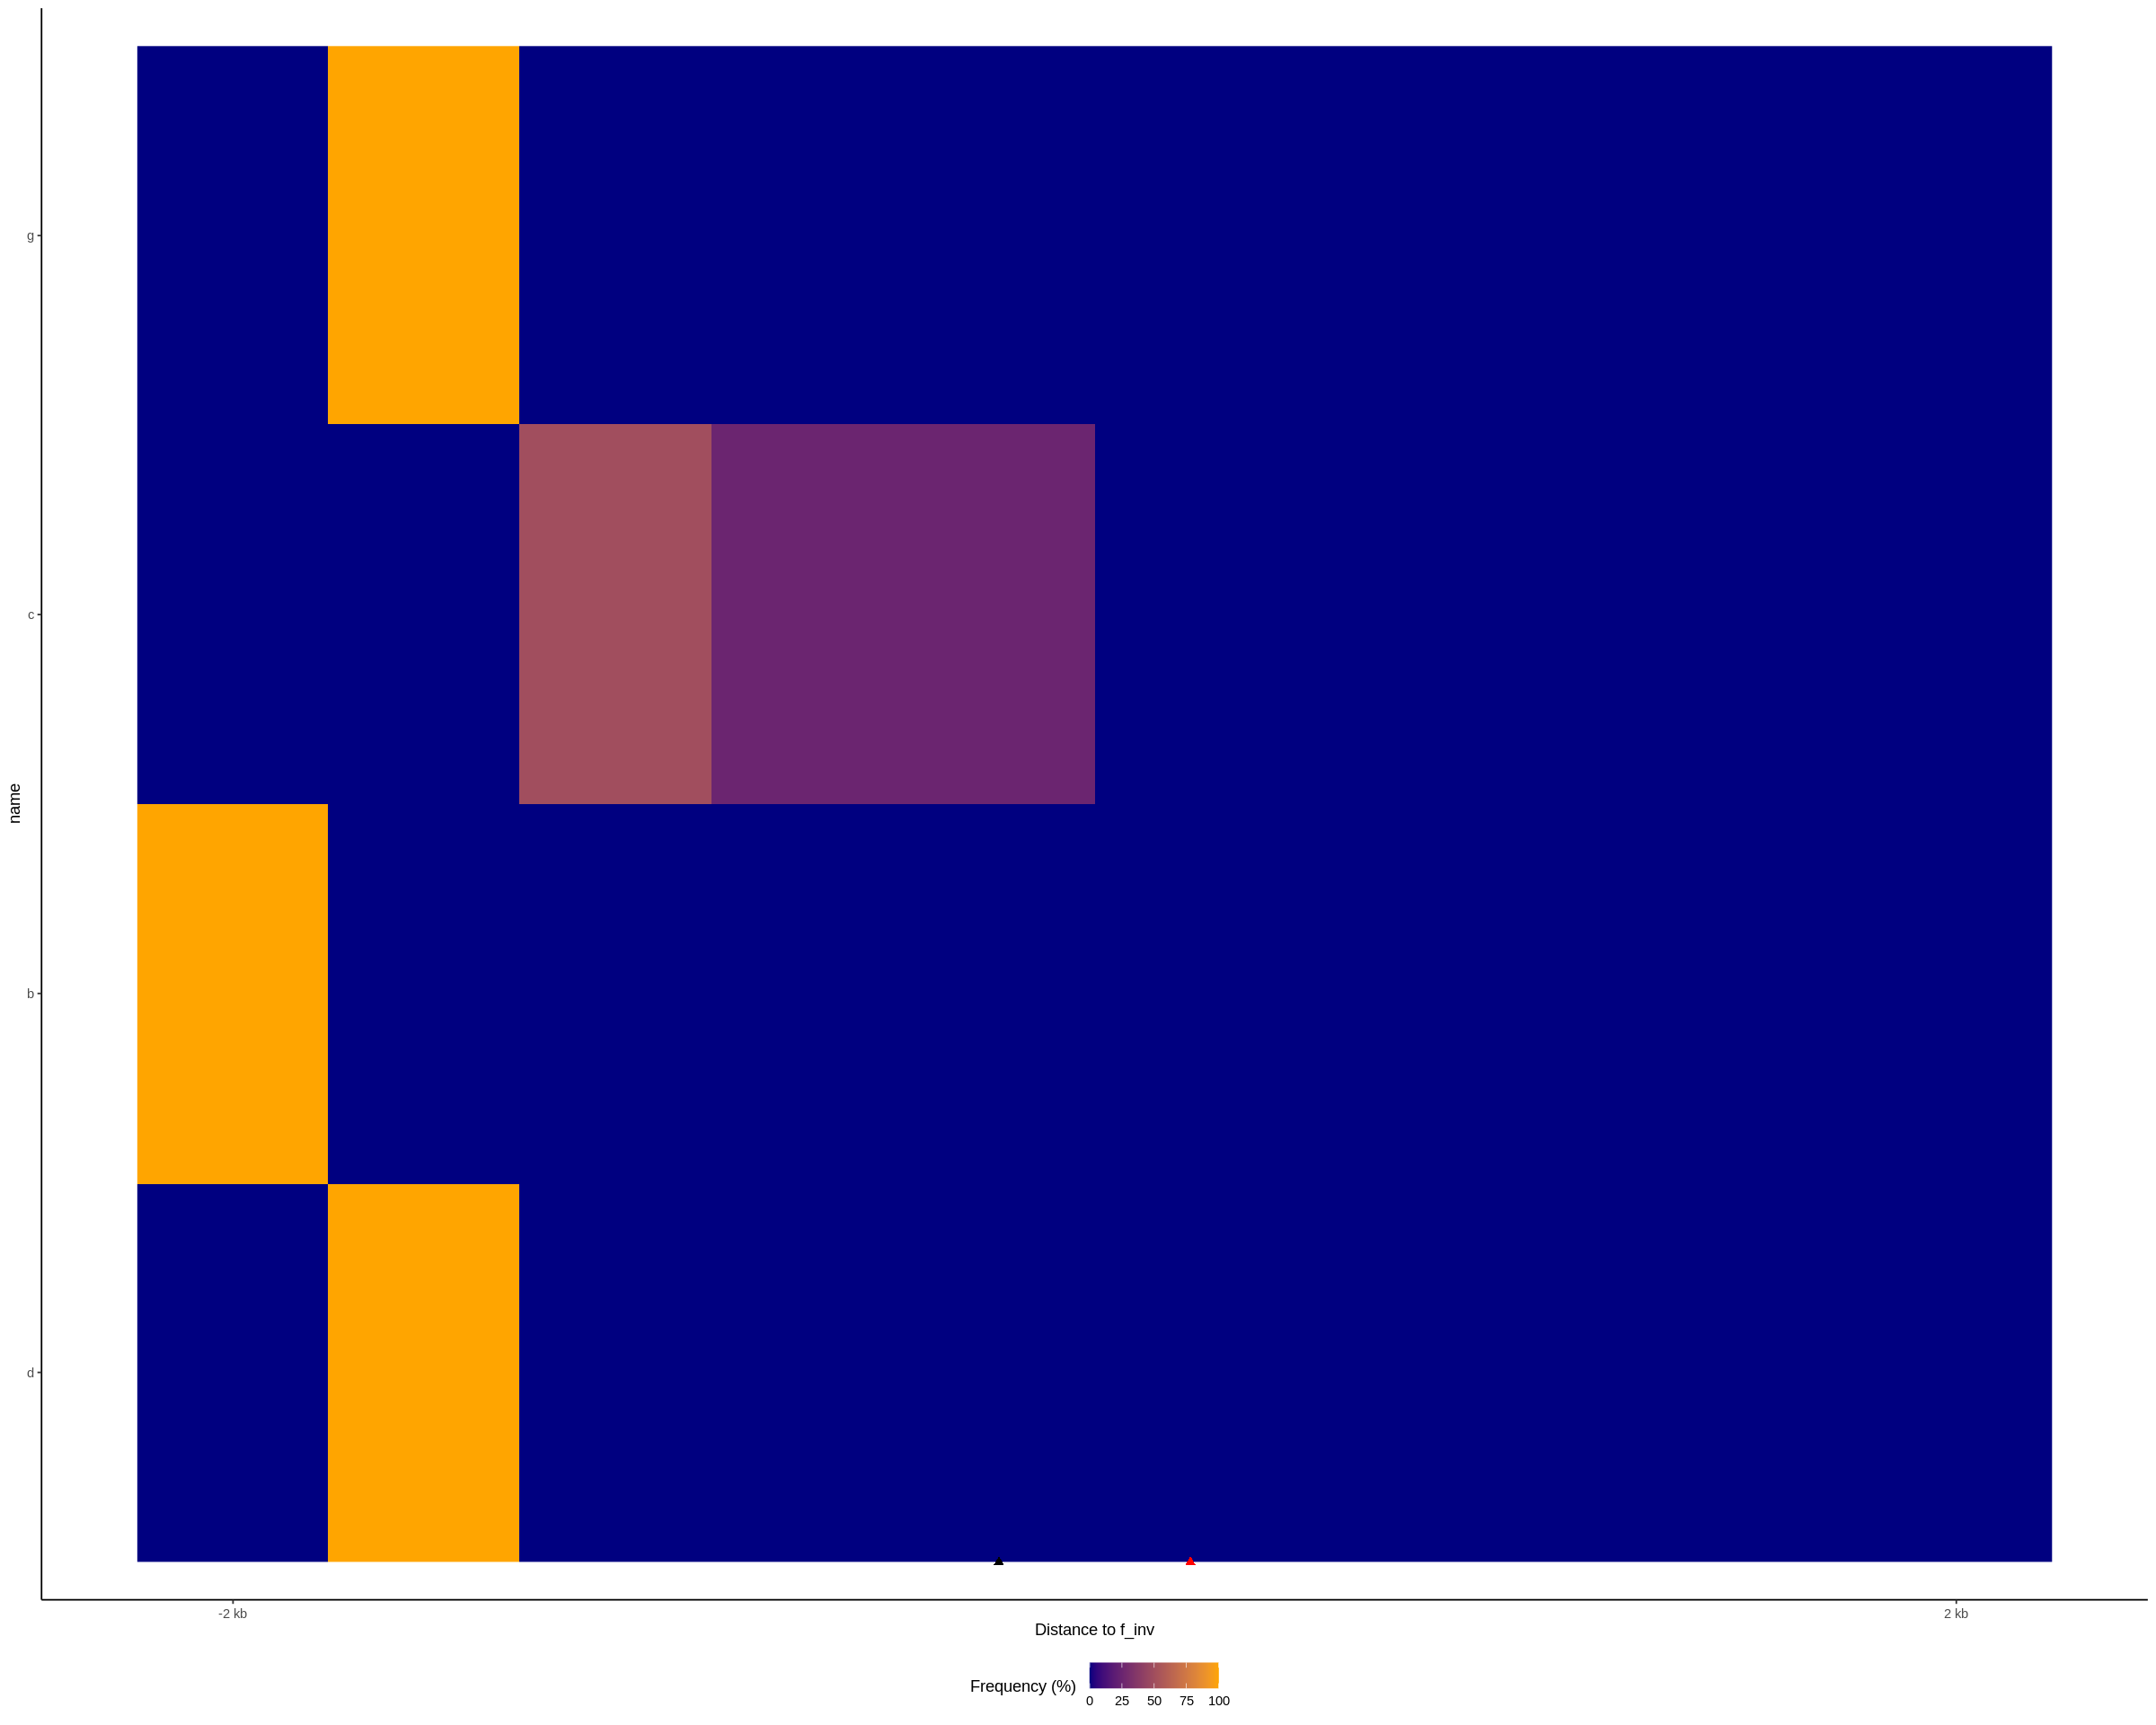

In [22]:
# important observation:
# calcFeatureDist returns the distance as positive or negative, depending on whether the feature is upstream or downstream
# this is rather unintuitive if you think about the region sets as in a genome browser <- upstream & -> downstream
# therefore I want to reverse the output simply by multiplying with -1
a <- GRanges(seqnames = rep("1", 10), 
             ranges = IRanges(start = rep(2000, 10), 
                              end = rep(5000, 10)))

b <- GRanges(seqnames = rep("1", 10), 
             ranges = IRanges(start = rep(1500, 10), 
                              end = rep(1510, 10)))

c <- GRanges(seqnames = c("1", "1", "1", "1", "1", "1", "1", "1"), 
             ranges = IRanges(start = c(2200, 2200, 2200, 2200, 2200, 2200, 2200, 2200), 
                              end = c(4400, 4400, 3800, 3800, 3200, 3200, 2600, 2600)))

d <- GRanges(seqnames = c("1", "1", "1", "1"), 
             ranges = IRanges(start = c(2050, 2050, 8999, 8999), 
                              end = c(2100, 2100, 9000, 9000)))

g <- GRanges(seqnames = rep("1", 10000), 
             ranges = IRanges(start = rep(1900, 10000), 
                              end = rep(2050, 10000)))

e <- GRangesList(d, b, c, g)
names(e) <- c("d", "b", "c", "g")

f <- calcFeatureDist(query = e, features = a)

a
c
f

quick_invert <- function(input){
  input *(-1)
}

str(f)
f_inv <- lapply(f, FUN = quick_invert)
str(f_inv)

#1.)by setting nbins as a variable we can add it to a secondary custom (+1) geom_point call
#   with this, we mark the first downstream bin with a red triangle
#2.) using the inverted vector we now are able to display it in a more logical left to right bp ordering:
#    upstream ... element ... downstream; making interpretation more straightforward
nbins=5

plotFeatureDist(f, featureName="f", size = 2000, nbins = nbins, tile = TRUE, labelOrder = "default")

plotFeatureDist(f, featureName="f", size = 2000, nbins = nbins, tile = TRUE, labelOrder = "default") + 
  geom_point(aes(x=nbins+1/2, y=0.5), color="red", 
                   size=2, shape=17, alpha=0.8)

plotFeatureDist(f_inv, featureName="f_inv", size = 2000, nbins = nbins, tile = TRUE, labelOrder = "default", infBins = FALSE) +
  geom_point(aes(x=nbins+1, y=0.5), color="red", 
                   size=2, shape=17, alpha=0.8)